# 🚚 Delhivery - Feature Engineering 📊

### **About Delhivery 🚚**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

### **Delhivery - Data Overview** 📦  

##### 📦 **Dataset Description 📑 :**

This dataset is designed to support monitoring and analysis of logistics operations, especially transportation trips within a supply chain. It contains detailed data on trip creation, routes, timestamps, distances, and timings—both actual and estimated. These insights are crucial for optimizing operations and strategic logistics planning.

##### 🔧 **Features of the Dataset :**

- **data**: Specifies whether the entry is for training or testing, useful for ML model development and validation.
- **trip_creation_time**: Timestamp when the trip was created/logged in the system.
- **route_schedule_uuid**: Unique identifier for a specific route schedule to enable long-term tracking.
- **route_type**: Describes the transportation mode:
  - **FTL (Full Truck Load)**: Direct routes with no intermediate stops.
  - **Carting**: Smaller vehicles for short-range or low-volume deliveries.

- **trip_uuid**: Unique ID for each trip, used for identification and tracking.
- **source_center / destination_center**: Unique IDs for the trip's origin and destination.
- **source_name / destination_name**: Readable names of the origin and destination for easy reporting.

- **od_start_time / od_end_time**: Start and end timestamps of the trip; key for calculating trip duration.
- **start_scan_to_end_scan**: Duration from initial to final scanning, helpful for delivery performance evaluation.

- **is_cutoff / cutoff_factor / cutoff_timestamp**: Possibly related to delivery deadlines or quality thresholds (requires more context).

- **actual_distance_to_destination**: Real-world travel distance in km.
- **actual_time**: Total time taken for trip completion.

- **osrm_time / osrm_distance**: Estimated time and distance from Open Source Routing Machine (OSRM), factoring in road and traffic conditions.

- **factor**: An undefined metric, possibly a scaling or adjustment factor in analysis.

- **segment_actual_time / segment_osrm_time / segment_osrm_distance**: Segment-level metrics providing granular route efficiency analysis.
- **segment_factor**: Like `factor`, but at a per-segment level.


This comprehensive dataset is ideal for transportation analysis, delivery optimization, and predictive modeling within logistics operations.

## **1. Define Problem Statement and perform Exploratory Data Analysis**

### **1.1 Definition of problem**

Delhivery aims to drive operational efficiency and gain a strategic advantage by harnessing the power of data analytics. By processing and analyzing large volumes of raw logistics data, the goal is to extract meaningful insights and develop accurate forecasting models to support smarter decision-making.

#### **Objective :-**

- **Primary Goal:**  
  - Improve operational efficiency and forecasting precision using advanced analytics techniques.

- **Specific Goals:**  
  - Clean, preprocess, and transform raw logistics data into a structured format.  
  - Generate actionable insights to support the creation of robust, high-performance forecasting models.


#### **Focus Areas :-**

- **Data Integrity:**  
  - Ensure high data quality through meticulous cleaning and validation processes.

- **Feature Engineering:**  
  - Derive meaningful and predictive features from raw data to enhance model input.

- **Model Enablement:**  
  - Provide the data science team with high-quality, enriched datasets to build reliable and scalable predictive models.


#### **Expected Outcomes :-**

- **Informed Decision-Making:**  
  - Enable business teams to make better decisions with accurate, clean, and structured data.

- **Improved Forecast Accuracy:**  
  - Deliver reliable forecasting models that enhance logistics planning and resource utilization.

- **Competitive Advantage:**  
  - Empower Delhivery with data-driven strategies that reinforce market leadership and operational excellence.



This initiative plays a critical role in supporting Delhivery’s mission to stay ahead in the competitive logistics sector through data-driven innovation.


In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import itertools
import matplotlib.cm as cm
from scipy.stats import ttest_rel
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import ttest_1samp
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
!gdown 1dGK9xrnngvLZTbhcM9bXbUWN83Hd3ou_

Downloading...
From: https://drive.google.com/uc?id=1dGK9xrnngvLZTbhcM9bXbUWN83Hd3ou_
To: /content/delhivery_data.csv
100% 55.6M/55.6M [00:00<00:00, 126MB/s]


In [3]:
data = pd.read_csv('delhivery_data.csv', on_bad_lines='warn')

In [4]:
print("First 5 rows of the dataset:\n")
data.head()

First 5 rows of the dataset:



data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time                 od_end_time  \
0  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
1  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
2  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
3  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
4  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  is_cutoff  cutoff_factor  \
0                    86.0       True              9   
1                    86.0       True             18   
2                    86.0       True             27   
3                    86.0       True             36   
4                    86.0      False             39   

             cutoff_timestamp  actual_distance_to_destination  actual_time  \
0         2018-09-20 04:27:55                       10.435660         14.0   
1         2018-09-20 04:17:55                       18.936842         24.0   
2  2018-09-20 04:01:19.505586                       27.637279         40.0   
3         2018-09-20 03:39:57                       36.118028         62.0   
4         2018-09-20 03:33:55                       39.386040         68.0   

   osrm_time  osrm_distance    factor  segment_actual_time  segment_osrm_time  \
0       11.0        11.9653  1.272727                 14.0               11.0   
1       20.0        21.7243  1.200000                 10.0                9.0   
2       28.0        32.5395  1.428571                 16.0                7.0   
3       40.0        45.5620  1.550000                 21.0               12.0   
4       44.0        54.2181  1.545455                  6.0                5.0   

   segment_osrm_distance  segment_factor  
0                11.9653        1.272727  
1                 9.7590        1.111111  
2                10.8152        2.285714  
3                13.0224        1.750000  
4                 3.9153        1.200000

#### **Basic metrics**

Basic metrics include:

- **Number of records and attributes** in the dataset.
- **Data types** of columns.
- **Count of unique values**.
- **Presence of missing values**.

In [5]:
# Basic information about the dataset

In [6]:
print("Basic Information about the dataset:\n")
data.info()

Basic Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 n

In [7]:
# Shape of the dataset

In [8]:
print("Shape of the dataset:")
print(f"Number of rows: {data.shape[0]}, Number of columns: {data.shape[1]}")

Shape of the dataset:
Number of rows: 144867, Number of columns: 24


In [9]:
# Checking for missing values

In [10]:
print("Missing Values Count:\n")
print(data.isnull().sum())

Missing Values Count:

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64


In [11]:
# Count of unique values in each column

In [12]:
print("Unique Value Count in Each Column:\n")
for col in data.columns:
    print(f"{col:<35}: {data[col].nunique():>12} unique values")

Unique Value Count in Each Column:

data                               :            2 unique values
trip_creation_time                 :        14817 unique values
route_schedule_uuid                :         1504 unique values
route_type                         :            2 unique values
trip_uuid                          :        14817 unique values
source_center                      :         1508 unique values
source_name                        :         1498 unique values
destination_center                 :         1481 unique values
destination_name                   :         1468 unique values
od_start_time                      :        26369 unique values
od_end_time                        :        26369 unique values
start_scan_to_end_scan             :         1915 unique values
is_cutoff                          :            2 unique values
cutoff_factor                      :          501 unique values
cutoff_timestamp                   :        93180 unique values
actu

#### **Insights from Basic Metrics**

###### **Shape & Size**

- **Total Rows (Entries):**  
  - 144,867 — Each row typically represents a unique trip or route event, providing a large volume for meaningful analysis.

- **Total Columns (Attributes):**  
  - 24 — Includes a variety of numerical and categorical features to support diverse analytical tasks such as route optimization and performance monitoring.


###### **Data Types**

- **Mixed Data Types:**
  - `Object (String)`: 12 columns  
    (e.g., `route_type`, `source_name`, `destination_name`, etc.)
  - `Float64`: 10 columns  
    (Numerical measures like distances, durations, estimated values)
  - `Int64`: 1 column  
    (`cutoff_factor`, representing discrete numerical value)
  - `Bool`: 1 column  
    (`is_cutoff`, binary True/False data)


###### **Missing Data**

- **Minor Missing Values:**
  - `source_name`: 293 missing values
  - `destination_name`: 261 missing values

  These are relatively small compared to the dataset size and may be handled through imputation or row removal depending on the use case.


###### **Unique Value Distribution**

- **Highly Unique Columns:**  
  - `actual_distance_to_destination`, `osrm_distance`, etc.  
    High uniqueness suggests detailed records suitable for granular analysis.

- **Low Variance Columns:**  
  - `data`, `route_type`: Only 2 unique values  
    Suitable for binary encoding when used in modeling.


###### **Key Observations**

- **Temporal Data:**
  - Fields like `trip_creation_time`, `od_start_time`, and `od_end_time` can be used for time series analysis, delay detection, or peak time identification.

- **Geographical Data:**
  - `source_name`, `destination_name`, and distance metrics can support spatial analysis or heatmap visualizations of trip frequency.

- **Operational Insights:**
  - Metrics like `actual_time`, `start_scan_to_end_scan`, `osrm_time` help compare planned vs. actual performance, revealing delays or inefficiencies.

- **Cutoff Analysis:**
  - Fields like `is_cutoff`, `cutoff_factor`, and `cutoff_timestamp` may relate to SLA (Service Level Agreement) monitoring, aiding in identifying missed targets or delays.

</br>

Given the nature of this data, possible analyses might focus on optimizing routes or analyzing time patterns. Addressing missing data and ensuring quality is essential before deeper analysis or model building.


### **1.2 Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.**

#### **1.2.1 Observations on the Shape of Data**

In [13]:
# Observing the shape of the dataset

In [14]:
print("Number of records (rows):", data.shape[0])
print("Number of attributes (columns):", data.shape[1])

Number of records (rows): 144867
Number of attributes (columns): 24


#### **1.2.2 Data Types of All Attributes**

In [15]:
# Displaying data types

In [16]:
print("Data types of each column before conversion:")
print(data.dtypes)

Data types of each column before conversion:
data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance          

In [17]:
# Count of unique data types

In [18]:
print("Unique Data Types Count: \n")
print(data.dtypes.value_counts())

Unique Data Types Count: 

object     12
float64    10
bool        1
int64       1
Name: count, dtype: int64


#### **1.2.3  Conversion of Categorical Attributes to 'Category'**

In [19]:
# List of columns to convert to categorical type
categorical_columns = [
    'data', 'route_schedule_uuid', 'route_type', 'trip_uuid',
    'source_center', 'source_name', 'destination_center', 'destination_name'
]

# Convert columns to 'category'
for column in categorical_columns:
    data[column] = data[column].astype('category')


print("Data types of each selected categorical column after conversion:\n")
print(data.dtypes[categorical_columns])

Data types of each selected categorical column after conversion:

data                   category
route_schedule_uuid    category
route_type             category
trip_uuid              category
source_center          category
source_name            category
destination_center     category
destination_name       category
dtype: object


In [20]:
print("Data types of all columns after conversion:\n")
print(data.dtypes)

Data types of all columns after conversion:

data                              category
trip_creation_time                  object
route_schedule_uuid               category
route_type                        category
trip_uuid                         category
source_center                     category
source_name                       category
destination_center                category
destination_name                  category
od_start_time                       object
od_end_time                         object
start_scan_to_end_scan             float64
is_cutoff                             bool
cutoff_factor                        int64
cutoff_timestamp                    object
actual_distance_to_destination     float64
actual_time                        float64
osrm_time                          float64
osrm_distance                      float64
factor                             float64
segment_actual_time                float64
segment_osrm_time                  float64
segment_o

#### **1.2.4  Missing Value Detection**

In [21]:
# Counting missing values
missing_values = data.isnull().sum()

In [22]:
# Percentage of missing values
missing_percentage = (missing_values / len(data)) * 100

In [23]:
# Displaying missing value statistics
print("Missing Values:\n", missing_values)
print("\nPercentage of Missing Values:\n", missing_percentage)

Missing Values:
 data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

Percentage of Missing Values:
 data                      

#### **1.2.5 Statistical Summary**

In [24]:
# For numeric columns
print("Statistical summary for numeric attributes:\n")
data.describe()

Statistical summary for numeric attributes:



start_scan_to_end_scan  cutoff_factor  actual_distance_to_destination  \
count           144867.000000  144867.000000                   144867.000000   
mean               961.262986     232.926567                      234.073372   
std               1037.012769     344.755577                      344.990009   
min                 20.000000       9.000000                        9.000045   
25%                161.000000      22.000000                       23.355874   
50%                449.000000      66.000000                       66.126571   
75%               1634.000000     286.000000                      286.708875   
max               7898.000000    1927.000000                     1927.447705   

         actual_time      osrm_time  osrm_distance         factor  \
count  144867.000000  144867.000000  144867.000000  144867.000000   
mean      416.927527     213.868272     284.771297       2.120107   
std       598.103621     308.011085     421.119294       1.715421   
min         9.000000       6.000000       9.008200       0.144000   
25%        51.000000      27.000000      29.914700       1.604264   
50%       132.000000      64.000000      78.525800       1.857143   
75%       513.000000     257.000000     343.193250       2.213483   
max      4532.000000    1686.000000    2326.199100      77.387097   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
count        144867.000000      144867.000000           144867.00000   
mean             36.196111          18.507548               22.82902   
std              53.571158          14.775960               17.86066   
min            -244.000000           0.000000                0.00000   
25%              20.000000          11.000000               12.07010   
50%              29.000000          17.000000               23.51300   
75%              40.000000          22.000000               27.81325   
max            3051.000000        1611.000000             2191.40370   

       segment_factor  
count   144867.000000  
mean         2.218368  
std          4.847530  
min        -23.444444  
25%          1.347826  
50%          1.684211  
75%          2.250000  
max        574.250000

In [25]:
# Generate summary statistics for categorical and object columns in the DataFrame
print("Statistical summary for categorical and object attributes:\n")
data.describe(include=['category', 'object'])

Statistical summary for categorical and object attributes:



data          trip_creation_time  \
count     144867                      144867   
unique         2                       14817   
top     training  2018-09-22 04:55:04.835022   
freq      104858                         101   

                                      route_schedule_uuid route_type  \
count                                              144867     144867   
unique                                               1504          2   
top     thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...        FTL   
freq                                                 1812      99660   

                      trip_uuid source_center                    source_name  \
count                    144867        144867                         144574   
unique                    14817          1508                           1498   
top     trip-153733005409156789  IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
freq                        101         23347                          23347   

       destination_center               destination_name  \
count              144867                         144606   
unique               1481                           1468   
top          IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
freq                15192                          15192   

                     od_start_time                 od_end_time  \
count                       144867                      144867   
unique                       26369                       26369   
top     2018-09-21 18:37:09.322207  2018-09-24 09:59:15.691618   
freq                            81                          81   

           cutoff_timestamp  
count                144867  
unique                93180  
top     2018-09-24 05:19:20  
freq                     40

#### **Insights**  

##### **Data Composition and Types :-**

- ###### **Before Conversion:**

  The dataset contains several columns classified under different data types. Notable columns include:

  - **Object:**  
    Used for text-based or mixed content columns like `data`, `trip_creation_time`, `route_schedule_uuid`, etc., reflecting the textual and timestamp nature of the data.

  - **Float64:**  
    Numeric columns like `start_scan_to_end_scan`, `actual_distance_to_destination`, which represent measurable quantities.

  - **Bool:**  
    The `is_cutoff` column, indicating a binary classification.

  - **Int64:**  
    The `cutoff_factor` column, representing integer-based values.

- ###### **After Conversion:**

  Post conversion, the dataset emphasizes efficiency:

  - **Category:**  
    Columns such as `data`, `route_schedule_uuid`, `route_type` are converted to `category` to optimize memory usage, as they contain a limited set of repeated values.

  - **Object:**  
    Time-related columns like `trip_creation_time`, `od_start_time` remain as object types, reflecting their non-numeric nature.


##### **Data Integrity :-**

- **Completeness:**  
  The dataset boasts a high level of completeness with **144,867 records across 24 columns**, ensuring a robust dataset for analysis.

- **Missing Values:**  
  Minimal missing data is observed:

  - `source_name`: 293 missing entries  
  - `destination_name`: 261 missing entries  
  
  These gaps, although minor, could affect analyses that depend on geographical data.


##### **Statistical Summary :-**

- ###### **Numeric Attributes:**

  Key statistics for numeric columns include:

  - `start_scan_to_end_scan`:  
    Ranges from a **minimum of 20** to a **maximum of 7898**, with a **mean of 961.26**, indicating variability in scanning durations.

  - `actual_time` and `actual_distance_to_destination`:  
    Show significant spread and variability, essential for analyzing travel times and distances.

  - Metrics such as `osrm_time` and `osrm_distance`:  
    Suggest data on **planned vs. actual** trip metrics, which are crucial for performance assessments.

- ###### **Categorical and Object Attributes:**

  Descriptive attributes provide insights into the dataset’s categorical nature:

  - **data:**  
    Primarily consists of two categories, with `'training'` being predominant.

  - **route_type:**  
    Contains only two unique types, potentially simplifying certain analyses but limiting the depth of route diversity exploration.


##### **Key Observations :-**

- **Variability:**  
  The dataset shows high variability in several key numeric metrics, which could indicate diverse operational conditions or the impact of external factors on travel metrics.

- **Data Optimization:**  
  Conversion of several columns to categorical data types post-import suggests a focus on optimizing computational efficiency.

- **Geographic Data Insight:**  
  The minimal but present missing geographic data (`source_name`, `destination_name`) points to potential areas for data quality improvement.


These insights provide a detailed and structured understanding of the dataset’s composition, integrity, and key statistical elements, setting a solid foundation for further analysis and exploration.


### **1.3 Preprocessing of the Delhivery Dataset & Non-Graphical Analysis**

#### **1.3.1 Preprocessing of the Delhivery Dataset for Enhanced Analysis**

In [26]:
# Save the original dataset
df = data.copy()  # For general use and data manipulation
df_raw = data.copy()  # For Missing Value and Outlier Detection

# Convert datetime columns with inferred format for automatic detection
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"], infer_datetime_format=True)
df["od_start_time"] = pd.to_datetime(df["od_start_time"], infer_datetime_format=True)
df["od_end_time"] = pd.to_datetime(df["od_end_time"], infer_datetime_format=True)

# Add 'Other' to categories in the categorical columns
df['source_name'] = df['source_name'].cat.add_categories(['Other'])
df['destination_name'] = df['destination_name'].cat.add_categories(['Other'])

# Replace missing values in 'source_name' and 'destination_name' with 'Other'
df['source_name'].fillna('Other', inplace=True)
df['destination_name'].fillna('Other', inplace=True)

# Dropping less relevant columns that are not required for current analysis
df.drop(columns=['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'], axis=1, inplace=True)

# Check for remaining missing values in the DataFrame
missing_values = df.isna().sum()
print(missing_values)

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64


In [27]:
# View processed dataframe
df.head()

data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

               od_start_time                od_end_time  \
0 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
1 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
2 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
3 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
4 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                    86.0                       10.435660         14.0   
1                    86.0                       18.936842         24.0   
2                    86.0                       27.637279         40.0   
3                    86.0                       36.118028         62.0   
4                    86.0                       39.386040         68.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0       11.0        11.9653                 14.0               11.0   
1       20.0        21.7243                 10.0                9.0   
2       28.0        32.5395                 16.0                7.0   
3       40.0        45.5620                 21.0               12.0   
4       44.0        54.2181                  6.0                5.0   

   segment_osrm_distance  
0                11.9653  
1                 9.7590  
2                10.8152  
3                13.0224  
4                 3.9153

#### **Insights**  

- After preprocessing, the output indicates that there are **zero missing values** across all columns in your dataset.  
- This demonstrates that your data is **complete** and does not require any immediate actions for handling missing data.


#### **1.3.2 Non-Graphical Analysis: Value counts and unique attributes**

#### **1.3.2.1 Value Counts**

#### Value counts provide the frequency of each unique entry in categorical columns. This can help understand the distribution of various categories in the dataset.

In [28]:
# Identifying categorical columns dynamically
categorical_columns = df.select_dtypes(include=['category']).columns

# Printing value counts for each categorical column with a separator after each, except not after the last
for i, col in enumerate(categorical_columns):
    print(f"Value Counts for {col}:\n{df[col].value_counts()}\n")
    # Print separator after every column output, except not after the last one
    if i != len(categorical_columns) - 1:
        print("--------\n")

Value Counts for data:
data
training    104858
test         40009
Name: count, dtype: int64

--------

Value Counts for route_schedule_uuid:
route_schedule_uuid
thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069fbcea9    1812
thanos::sroute:0456b740-1dad-4929-bbe0-87d8843f5a10    1608
thanos::sroute:dca6268f-741a-4d1a-b1b0-aab13095a366    1605
thanos::sroute:a1b25549-1e77-498f-8538-00292e5bd5a2    1285
thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e5720d    1280
                                                       ... 
thanos::sroute:c6403e98-1ffa-49ed-bc55-5adcdc4ad39d       1
thanos::sroute:404cbabf-d2a5-4e46-bf79-8b3c518f082b       1
thanos::sroute:629ad783-00c1-459b-ac3e-390dc3aa1a45       1
thanos::sroute:0a05c445-d943-4f05-82ed-fd90a6d31e87       1
thanos::sroute:b45dbffe-dd2c-4edb-a9e6-e35065d1b43e       1
Name: count, Length: 1504, dtype: int64

--------

Value Counts for route_type:
route_type
FTL        99660
Carting    45207
Name: count, dtype: int64

--------

Value Counts for 

#### **Insights From Value Counts**

###### **Data Distribution Across Categories**

- **Training vs Test Data:**  
  The dataset includes **104,858 training entries** and **40,009 test entries**. This typical **70:30-style split** suggests an emphasis on providing **sufficient data for model training and validation**.

- **Route Types:**  
  **Full Truck Load (FTL)** trips dominate with **99,660 records**, while **Carting** accounts for **45,207**. This indicates that **FTL is the primary mode of transportation** in Delhivery’s logistics operations.

- **Route Schedules and Trips:**  
  There are **1,504 unique route schedules** and **14,817 unique trip UUIDs**, with many schedules used frequently (up to **1,800+ times**) and others **only once**. This reflects a mix of **regular, high-volume routes** and **one-off or less frequent trips**.

- **Source and Destination Centers:**  
  Centers like **IND000000ACB** and **IND562132AAA** appear very frequently as both **source and destination points**, marking them as **major operational hubs** within the network.


###### **Geographical Insights**

- **High-Traffic Locations:**  
  Cities such as **Gurgaon_Bilaspur_HB (Haryana)**, **Bangalore_Nelmngla_H (Karnataka)**, and **Bhiwandi_Mankoli_HB (Maharashtra)** are prominent, appearing often as both **source and destination locations**. These are likely **central to Delhivery’s daily operations and demand planning**.

- **Low-Frequency Locations:**  
  Several locations like **Badkulla_Central_DPP_1 (West Bengal)** or **Chennai_Mylapore (Tamil Nadu)** appear **only once**, suggesting either **new, experimental, or low-demand routes**. These may represent areas for **potential growth or optimization**.

These insights can help in understanding operational focuses, identifying key logistics hubs, and assessing the diversity and range of logistics operations within the dataset. Such information is crucial for strategic planning, improving operational efficiency, and potentially expanding to underserved areas.


#### **1.3.2.2 Unique Attributes**

#### Now, let's explore the number of unique values in each column. This helps us understand the diversity of values in the dataset.

In [29]:
# Count of unique values in each column using nunique()
print("Count of unique values in each column:")
print(df.nunique())

Count of unique values in each column:
data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1499
destination_center                  1481
destination_name                    1469
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
dtype: int64


In [30]:
# Actual unique values for each categorical column using unique()
for i, col in enumerate(categorical_columns):
    print(f"Unique values in '{col}':\n")
    print(df[col].unique())
    # Print separator after every column output, except not after the last one
    if i != len(categorical_columns) - 1:
        print("-"*200)
        print("\n")

Unique values in 'data':

['training', 'test']
Categories (2, object): ['test', 'training']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Unique values in 'route_schedule_uuid':

['thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c..., 'thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc2117..., 'thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7..., 'thanos::sroute:76951383-1608-44e4-a284-46d92e..., 'thanos::sroute:0904e75c-b3ac-4278-96cf-802835..., ..., 'thanos::sroute:4a59da37-95e1-45a3-9bbc-3ee4d6..., 'thanos::sroute:629ad783-00c1-459b-ac3e-390dc3..., 'thanos::sroute:72cf9feb-f4e3-4a55-b92a-0b686e..., 'thanos::sroute:5e08be79-8a4c-4a91-a514-535040..., 'thanos::sroute:a3c30562-87e5-471c-9646-0ed49c...]
Length: 1504
Categories (1504, object): ['thanos::sroute:0007affd-fd01-4cf0-8a4f-90419d..., 'thanos::sroute:00435307-de7f-4439-bd6a-5a2a9a...,
     

#### **Insights from Unique Attributes**  

###### **Dataset Composition**

- **Data Split:**  
  The dataset contains two types of entries: **'training' and 'test'**, reflecting a typical data science pipeline that prioritizes **model development and validation using well-separated datasets**.

- **Logistics Types:**  
  Two route types — **'Carting' and 'FTL' (Full Truck Load)** — are observed, indicating a **mix of bulk and flexible shipment services** supported by Delhivery.


###### **Route and Trip Diversity**

- **Extensive Routes:**  
  With **1,504 unique route_schedule_uuid** and **14,817 unique trip_uuid**, the data reflects a **highly diverse and complex routing network** across multiple regions.

- **Route Usage Patterns:**  
  Some routes are used **heavily** while others appear **only once**, indicating a combination of **core routes and less frequent or experimental routes** in the system.


###### **Geographic Distribution**

- **Wide Network Coverage:**  
  The presence of **1,508 unique source centers** and **1,481 destination centers** underscores a **nationwide presence**, covering a **broad logistics footprint**.

- **Key Operational Hubs:**  
  Frequent locations like **Gurgaon_Bilaspur_HB (Haryana)**, **Bangalore_Nelmngla_H (Karnataka)**, and **Bhiwandi_Mankoli_HB (Maharashtra)** emerge as **key hubs**, likely handling a **significant share of shipment volume**.

###### **Operational Insights**

- **Route Optimization Potential:**  
  The disparity in frequency across **routes and centers** suggests **opportunities to improve efficiency** by rebalancing or consolidating underused paths.

- **Strategic Logistics Planning:**  
  Identifying **highly active corridors and low-traffic locations** can guide **resource allocation, route planning**, and **service expansion** to enhance overall logistics performance.

This structured insight approach allows for a clear understanding of the dataset’s operational dynamics, aiding in strategic planning and optimization efforts within the logistics sector.

### **1.4 Visual Analysis**

#### **1.4.1 Distribution Plots of Continuous Variables**

#### **1.4.1.1 Plot the distribution of the variable start_scan_to_end_scan**

Mean: 961.26
Median: 449.00
Standard Deviation: 1037.01


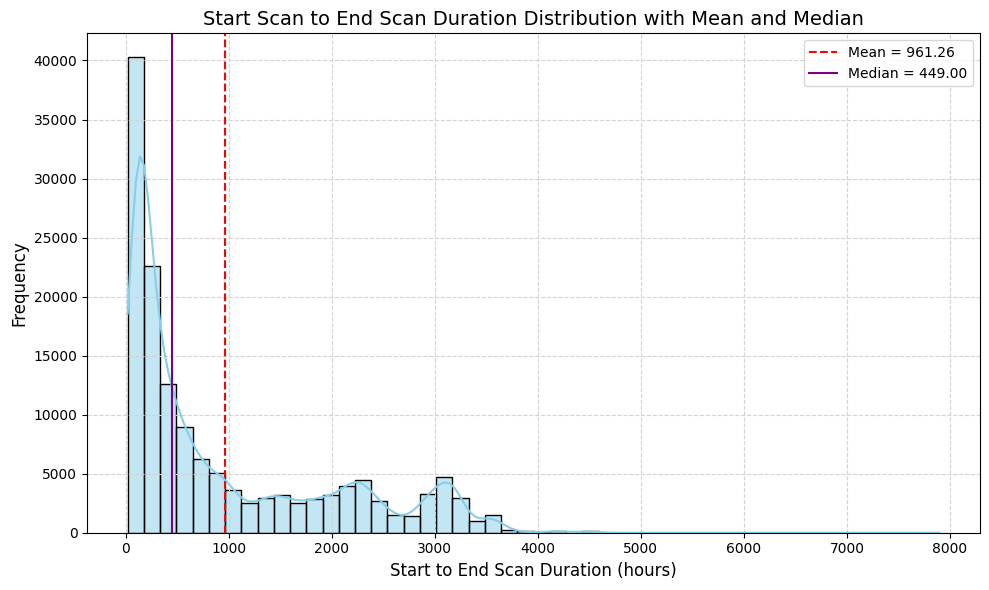

In [31]:
# Calculate central tendency and spread
mean_val = df['start_scan_to_end_scan'].mean()  # Mean
median_val = df['start_scan_to_end_scan'].median()  # Median
std_val = df['start_scan_to_end_scan'].std()  # Standard Deviation

# Print summary statistics
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")

# Plot distribution with mean and median lines
plt.figure(figsize=(10, 6))
sns.histplot(df['start_scan_to_end_scan'], kde=True, bins=50, color='skyblue')  # Histogram with KDE
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.2f}')  # Vertical line for mean
plt.axvline(median_val, color='purple', linestyle='-', label=f'Median = {median_val:.2f}')  # Vertical line for median

# Plot aesthetics
plt.title('Start Scan to End Scan Duration Distribution with Mean and Median', fontsize=14)
plt.xlabel('Start to End Scan Duration (hours)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()  # Show legend
plt.grid(True, color='lightgrey', linestyle='--')
plt.tight_layout()
plt.show()

#### **Insights on Scan Duration Distribution (start_scan_to_end_scan)**

- **The distribution is right-skewed**  
  - Most scan durations are **concentrated on the left side** of the graph, meaning most scans are **completed quickly**.  
  - A **long tail extends to the right**, indicating that a **small number of scans take a very long time** to complete, causing **skewness**.

- **Mean is greater than the median**  
  - The **mean is 961.26 hours**, while the **median is 449 hours**, showing a **large gap between the two central values**.  
  - This suggests that a **few extremely high scan durations are pulling the average upward**, making the **mean less representative**.

- **High concentration of low scan durations**  
  - The **tallest bars in the histogram are within the 0–500 hour range**, showing that **most scans finish within a short time**.  
  - This concentration reflects **typical behavior** and indicates that **long scan durations are exceptions**, not the norm.

- **Presence of outliers (very high scan durations)**  
  - The graph extends up to **nearly 8000 hours**, though these high durations occur **very infrequently**.  
  - These values are **statistical outliers** that affect the **overall distribution shape and central tendency**.

- **Wide spread of scan times**  
  - The data spans from **very short scan durations close to 0** to **extremely long ones above 7000 hours**.  
  - This wide range implies **high variability in scan duration**, suggesting **inconsistent scan completion times**.

The **start_scan_to_end_scan** duration shows a **skewed and wide-spread distribution** with **several high-value outliers**. While the **mean is heavily influenced by outliers**, the **median gives a more accurate picture of typical scan duration**.


#### **1.4.1.2 Plot the distribution of the variable actual_distance_to_destination**

Mean: 234.07
Median: 66.13
Standard Deviation: 344.99


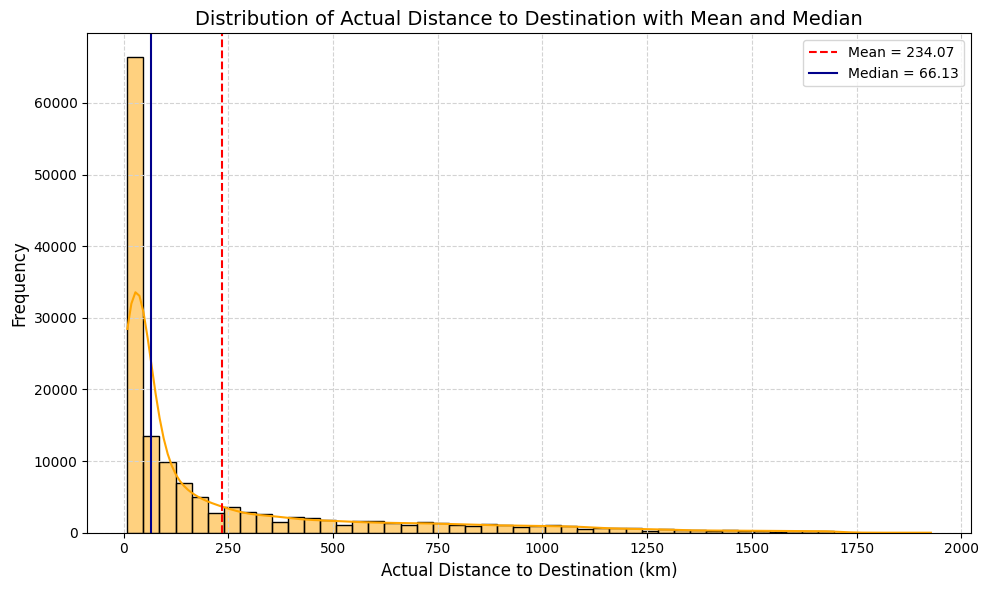

In [32]:
# Calculate central tendency and spread
mean_val = df['actual_distance_to_destination'].mean()  # Mean
median_val = df['actual_distance_to_destination'].median()  # Median
std_val = df['actual_distance_to_destination'].std()  # Standard Deviation

# Print summary stats
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")

# Plot histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['actual_distance_to_destination'], kde=True, bins=50, color='orange')  # Distribution plot

# Add vertical lines for mean and median
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.2f}')  # Mean line
plt.axvline(median_val, color='darkblue', linestyle='-', label=f'Median = {median_val:.2f}')  # Median line

# Plot aesthetics
plt.title('Distribution of Actual Distance to Destination with Mean and Median', fontsize=14)
plt.xlabel('Actual Distance to Destination (km)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()  # Show legend
plt.grid(True, color='lightgrey', linestyle='--')
plt.tight_layout()
plt.show()

#### **Insights on Actual Distance Distribution (actual_distance_to_destination)**

- **The distribution is right-skewed**  
  - The **majority of the actual distances fall on the lower end** of the x-axis, with a **high frequency of values close to 0 km**.  
  - A **long tail extends to the right** side of the graph, indicating that a **small number of observations represent very long-distance trips**.

- **Mean is greater than the median**  
  - The **mean distance is 234.07 km**, which is **significantly higher than the median** value of **66.13 km**.  
  - This difference shows that the **distribution is influenced by a few very large values**, making the **median a more reliable central measure**.

- **Most trips are short-distance**  
  - The **tallest bars are located between 0 and 100 km**, meaning that **short-distance trips are far more common** than long ones.  
  - This suggests that the **typical trip or delivery covers a small geographic area**, likely in **urban or regional settings**.

- **Presence of outliers**  
  - The graph includes **very large values beyond 1000 km** that occur **with very low frequency**, seen as **isolated bars toward the far right**.  
  - These are **statistical outliers** and may represent **unusual or special cases** that deviate from the normal trip pattern.

- **Wide spread in distance values**  
  - The x-axis shows distances ranging from **nearly 0 to about 2000 km**, indicating **high variability in trip lengths**.  
  - This means the dataset includes **local, inter-city, and inter-state trips**, which should be **considered in analysis or modeling**.

The **actual_distance_to_destination** distribution is **right-skewed** with a strong presence of **short-distance trips** and a few **extreme outliers**. The **wide spread** and **high mean compared to the median** reflect both **variability** and the **influence of long-distance data points**.

#### **1.4.1.3 Plot the distribution of the variable actual_time**

Mean: 416.93
Median: 132.00
Standard Deviation: 598.10


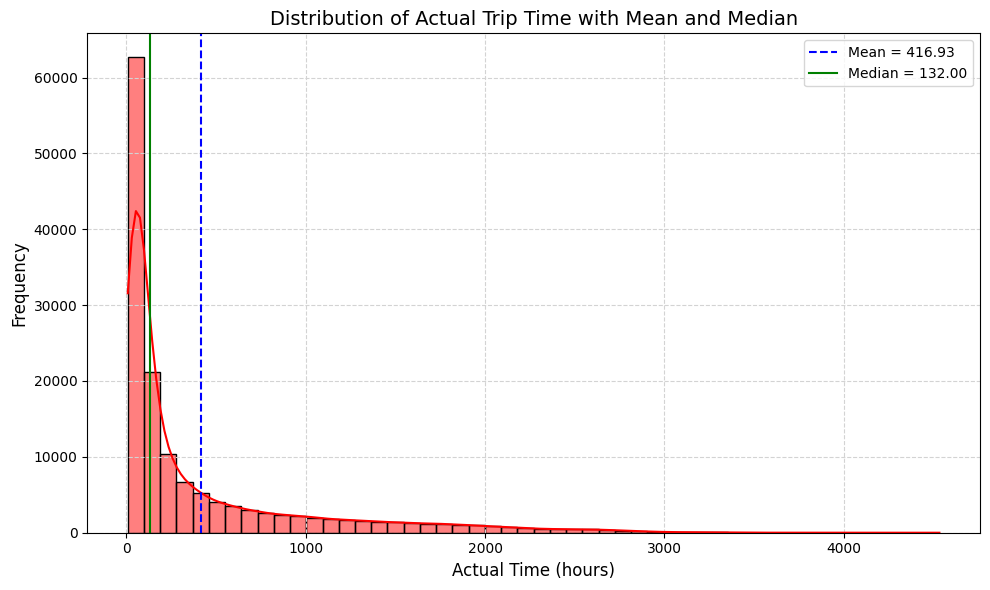

In [33]:
# Calculate central tendency and spread for actual_time
mean_val = df['actual_time'].mean()  # Mean
median_val = df['actual_time'].median()  # Median
std_val = df['actual_time'].std()  # Standard Deviation

# Print summary stats
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")

# Plot histogram with KDE for actual_time
plt.figure(figsize=(10, 6))
sns.histplot(df['actual_time'], kde=True, bins=50, color='red')  # Histogram with KDE

# Add lines for mean and median
plt.axvline(mean_val, color='blue', linestyle='--', label=f'Mean = {mean_val:.2f}')  # Mean line
plt.axvline(median_val, color='green', linestyle='-', label=f'Median = {median_val:.2f}')  # Median line

# Plot details
plt.title('Distribution of Actual Trip Time with Mean and Median', fontsize=14)
plt.xlabel('Actual Time (hours)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()  # Show mean/median legend
plt.grid(True, color='lightgrey', linestyle='--')
plt.tight_layout()
plt.show()

#### **Insights on Actual Trip Time Distribution (actual_time)**

- **The distribution is right-skewed**  
  - **Most trip times are clustered on the lower end** of the scale, with a **very high frequency of short durations**.  
  - The graph **stretches far to the right**, showing that there are some **very long trips**, but they happen **rarely**.

- **Mean is much greater than the median**  
  - The **mean trip time is 416.93 hours**, while the **median is only 132.00 hours**, indicating a **big gap between the two**.  
  - This large difference suggests that a **small number of extremely long trips are raising the average significantly**, making the **median a better measure of central tendency**.

- **Most trips are completed quickly**  
  - The **tallest bars are concentrated between 0 and 200 hours**, which shows that **most trips do not take very long**.  
  - This pattern is **typical in datasets** where the majority of cases are **standard or routine**, and **a few exceptions take much longer**.

- **Presence of outliers with very high trip times**  
  - Some values **extend beyond 4000 hours**, which are **far from the average range** and are considered **outliers**.  
  - These outliers are likely caused by **anomalies or exceptional situations** that are **not representative of typical trips**.

- **Wide spread in trip durations**  
  - The x-axis ranges from **close to 0 up to more than 4000 hours**, indicating a **large range of trip durations** in the dataset.  
  - This **wide spread shows high variability** in trip times, which could **impact statistical modeling** or require **normalization**.

The **actual_time** distribution is **right-skewed** with many **short-duration trips** and a few **extremely long ones acting as outliers**. The **wide range** and **significant gap between mean and median** highlight the **impact of those outliers** and suggest **median as a better central value**.

#### **1.4.1.4 Plot the distribution of the variable osrm_time**

Mean: 213.87
Median: 64.00
Standard Deviation: 308.01


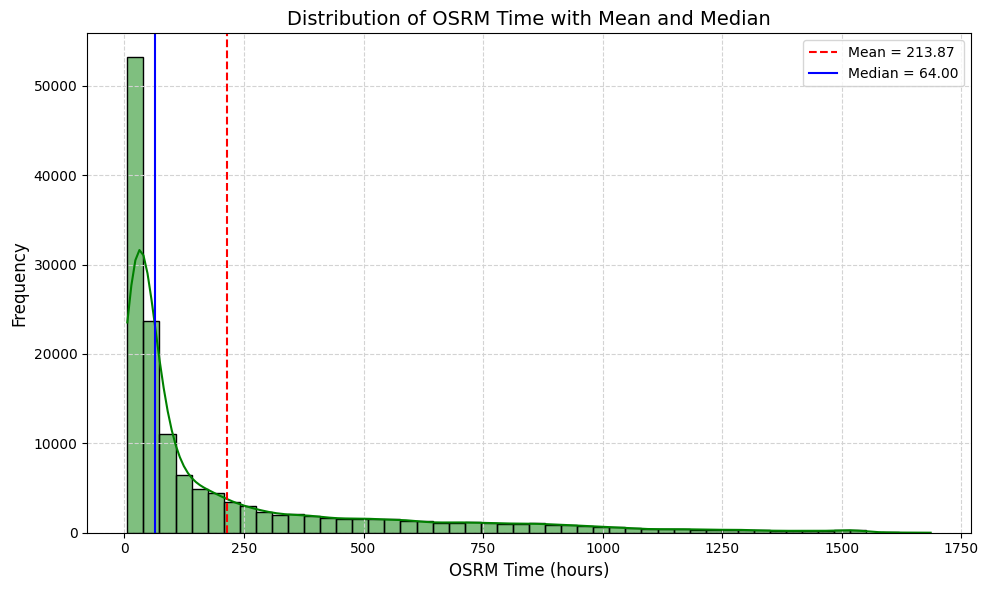

In [34]:
# Calculate mean, median, and standard deviation
mean_val = df['osrm_time'].mean()  # Mean
median_val = df['osrm_time'].median()  # Median
std_val = df['osrm_time'].std()  # Standard Deviation

# Print summary statistics
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")

# Plot histogram and KDE for osrm_time
plt.figure(figsize=(10, 6))
sns.histplot(df['osrm_time'], kde=True, bins=50, color='green')  # Histogram with KDE line

# Add lines for mean and median
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.2f}')  # Mean
plt.axvline(median_val, color='blue', linestyle='-', label=f'Median = {median_val:.2f}')  # Median

# Set labels and title
plt.title('Distribution of OSRM Time with Mean and Median', fontsize=14)
plt.xlabel('OSRM Time (hours)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()  # Show mean and median in the legend
plt.grid(True, color='lightgrey', linestyle='--')
plt.tight_layout()
plt.show()

#### **Insights on OSRM-Predicted Trip Time Distribution (osrm_time)**

- **The distribution is right-skewed**  
  - The **majority of OSRM time values are clustered near the lower end** of the axis, with a **peak frequency below 100 hours**.  
  - A **long tail to the right** suggests a **smaller number of cases with very high travel durations**, creating a **skewed pattern**.

- **Mean is significantly greater than the median**  
  - The **mean is 213.87 hours**, while the **median is only 64.00 hours**, showing a **large gap between the two**.  
  - This indicates that a **few extremely high values are pushing the mean upward**, which is a **typical feature of skewed data**.

- **Most routes are estimated to take short durations**  
  - The **tallest bars appear before 100 hours**, indicating that **most predicted travel times by OSRM are short**.  
  - This trend is likely in **real-world navigation systems** where **most routes are intra-city or short-distance**.

- **Presence of outliers with long travel times**  
  - The graph includes **OSRM times that go beyond 1000 hours**, which are **rare but highly influential values**.  
  - These extreme durations may be due to **exceptional routing paths, data errors**, or **specific long-distance routes**.

- **Wide spread in predicted durations**  
  - The x-axis extends from **close to 0 to over 1700 hours**, highlighting a **large variability in OSRM-predicted trip times**.  
  - Such a **wide range indicates diverse routing cases**, from **very short to potentially multi-day travel estimations**.

The **osrm_time** distribution is **heavily right-skewed**, with **most predicted travel times being short** and a **few extreme outliers stretching the mean**. The **significant difference between the mean and median**, along with the **wide spread**, suggests **high variability** and the presence of **long-duration exceptions**.

#### **1.4.1.5 Plot the distribution of the variable osrm_distance**

Mean: 284.77
Median: 78.53
Standard Deviation: 421.12


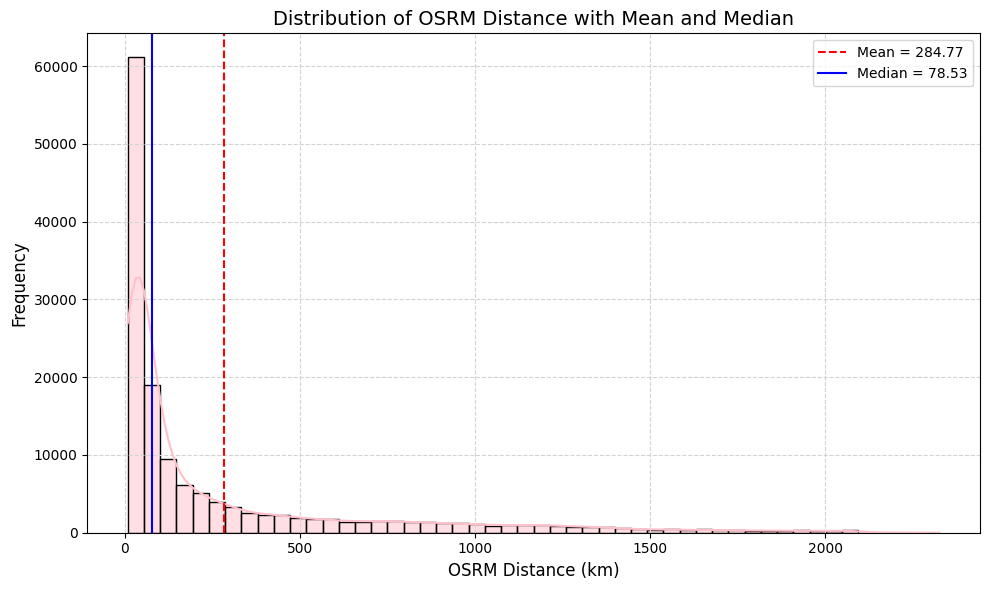

In [35]:
# Calculate central tendency and variability
mean_val = df['osrm_distance'].mean()  # Mean
median_val = df['osrm_distance'].median()  # Median
std_val = df['osrm_distance'].std()  # Standard Deviation

# Print summary statistics
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")

# Plot histogram and KDE for osrm_distance
plt.figure(figsize=(10, 6))
sns.histplot(df['osrm_distance'], kde=True, bins=50, color='pink')  # Distribution plot

# Add vertical lines for mean and median
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.2f}')  # Mean line
plt.axvline(median_val, color='blue', linestyle='-', label=f'Median = {median_val:.2f}')  # Median line

# Plot titles and labels
plt.title('Distribution of OSRM Distance with Mean and Median', fontsize=14)
plt.xlabel('OSRM Distance (km)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()  # Display legend
plt.grid(True, color='lightgrey', linestyle='--')
plt.tight_layout()
plt.show()

#### **Insights on OSRM-Predicted Distance Distribution (osrm_distance)**

- **The distribution is right-skewed**  
  - **Most OSRM distances are concentrated toward the left**, between **0 and 100 km**, where the **highest bars are located**.  
  - The **tail stretches far to the right**, showing that **long-distance predictions exist** but are **relatively rare**.

- **Mean is much higher than the median**  
  - The **mean OSRM distance is 284.77 km**, while the **median is just 78.53 km**, showing a **substantial gap**.  
  - This difference means a **few very high distances are inflating the mean**, making the **median a better measure of typical distance**.

- **Most predictions are for short routes**  
  - The **most frequent values lie within the 0–100 km range**, indicating that the **majority of routes are short**.  
  - This aligns with **real-world routing patterns** where most navigation needs are **local or regional**.

- **Presence of extreme values (outliers)**  
  - The graph shows that **some predicted distances extend beyond 2000 km**, though their **frequency is very low**.  
  - These **long-distance outliers** could represent **rare use cases** like **cross-country or long-haul routes**.

- **Wide spread in distance values**  
  - **OSRM-predicted distances range from less than 10 km to over 2000 km**, showing **great variation**.  
  - This **broad spread reflects the flexibility** of the routing engine to accommodate **both short and long journeys**.

The **osrm_distance** distribution is **right-skewed** with a **large number of short-distance predictions** and a **few very large values acting as outliers**. The **big gap between mean and median**, along with a **wide spread**, highlights both the **skewness** and **variability** in route lengths.

#### **1.4.1.6 Plot the distribution of the variable segment_actual_time**

Mean: 36.20
Median: 29.00
Standard Deviation: 53.57


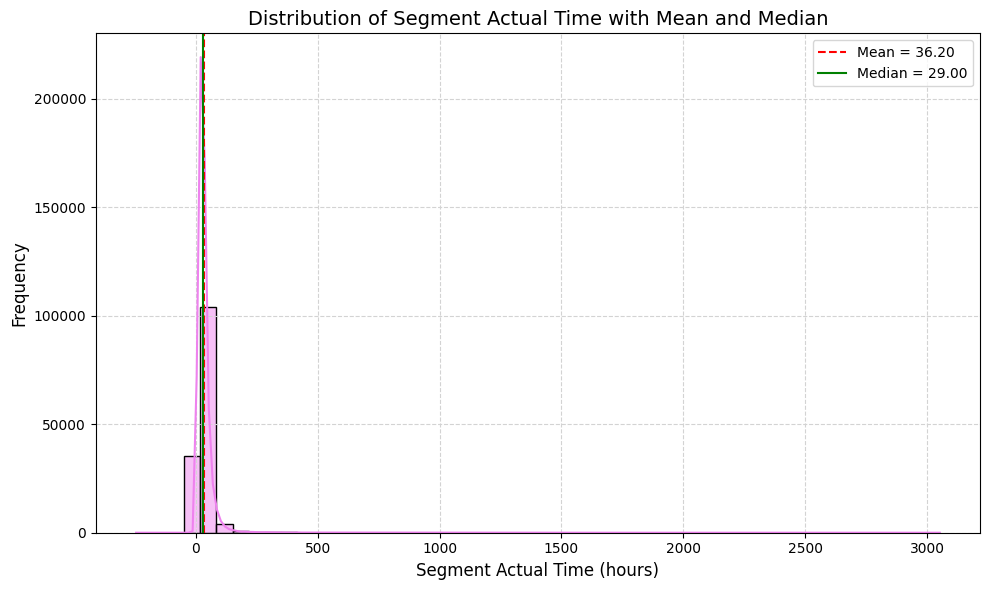

In [36]:
# Calculate mean, median, and standard deviation
mean_val = df['segment_actual_time'].mean()  # Mean
median_val = df['segment_actual_time'].median()  # Median
std_val = df['segment_actual_time'].std()  # Standard Deviation

# Print summary statistics
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")

# Plot histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['segment_actual_time'], kde=True, bins=50, color='violet')  # Histogram + KDE

# Add lines for mean and median
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.2f}')  # Mean
plt.axvline(median_val, color='green', linestyle='-', label=f'Median = {median_val:.2f}')  # Median

# Plot labels and formatting
plt.title('Distribution of Segment Actual Time with Mean and Median', fontsize=14)
plt.xlabel('Segment Actual Time (hours)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()  # Show mean and median legend
plt.grid(True, color='lightgrey', linestyle='--')  # Custom light grey dashed grid
plt.tight_layout()
plt.show()

#### **Insights on Segment Actual Time Distribution (segment_actual_time)**

- **The distribution is slightly right-skewed**  
  - **Most values are clustered tightly near the lower end** of the x-axis, indicating **short segment travel times are the norm**.  
  - The **tail on the right shows a gradual decline in frequency**, suggesting a **few segments take much longer than average**.

- **Mean is slightly greater than the median**  
  - The **mean is 36.20 hours**, while the **median is 29.00 hours**, showing a **moderate difference between the two**.  
  - This indicates the **presence of some high-duration segments pulling the mean upward**, though **not dramatically**.

- **Segment travel times are usually short**  
  - The **highest frequency occurs in the 0–50 hour range**, showing that **most segment trips are completed fairly quickly**.  
  - This pattern is expected in **segmented logistics or routing systems** where **segments represent small parts of a larger journey**.

- **A few very long-duration segments exist**  
  - **Some values go beyond 1000 hours**, and although they occur **rarely**, they **significantly extend the range** of the data.  
  - These are likely **outliers** that may represent **errors, delays, or special cases** like **cross-border or stalled segments**.

- **The data has a wide spread**  
  - The distribution spans from **0 up to over 3000 hours**, indicating a **large range of variation** in segment duration.  
  - This **wide spread suggests high variability in performance or conditions** across different **segment types or scenarios**.

The **segment_actual_time** distribution is **slightly right-skewed** with **most segments taking a short amount of time** and a few **long outliers increasing the mean**. The **spread is wide**, but the **gap between mean and median is moderate**, making the **median a better indicator of typical segment duration**.

#### **1.4.1.7 Plot the distribution of the variable segment_osrm_time**

Mean: 18.51
Median: 17.00
Standard Deviation: 14.78


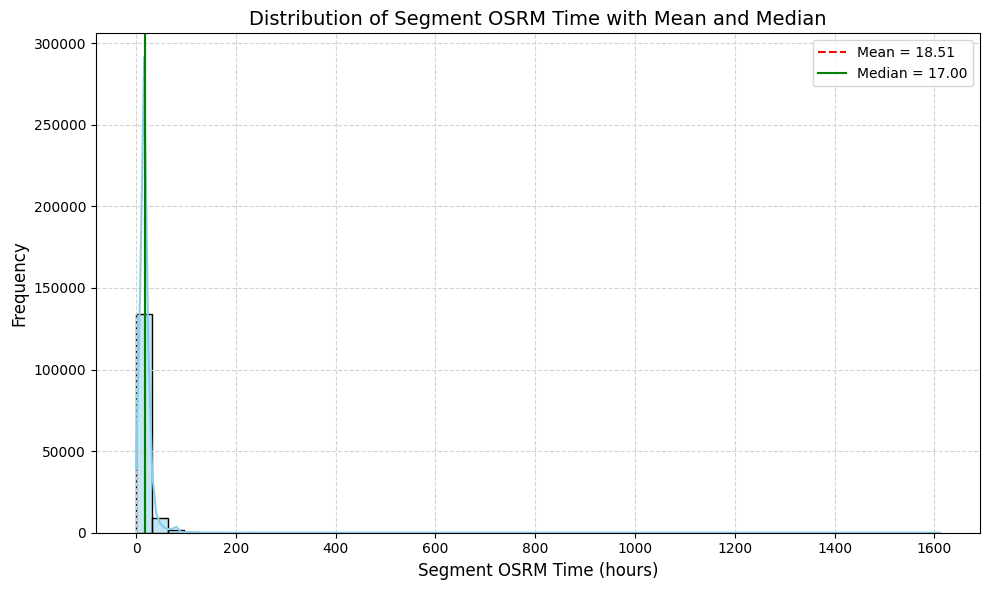

In [37]:
# Calculate mean, median, and standard deviation
mean_val = df['segment_osrm_time'].mean()  # Mean
median_val = df['segment_osrm_time'].median()  # Median
std_val = df['segment_osrm_time'].std()  # Standard Deviation

# Print statistics
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")

# Plot histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['segment_osrm_time'], kde=True, bins=50, color='skyblue')  # Histogram + KDE

# Add lines for mean and median
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.2f}')  # Mean line
plt.axvline(median_val, color='green', linestyle='-', label=f'Median = {median_val:.2f}')  # Median line

# Plot details
plt.title('Distribution of Segment OSRM Time with Mean and Median', fontsize=14)
plt.xlabel('Segment OSRM Time (hours)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()  # Show legend
plt.grid(True, color='lightgrey', linestyle='--')
plt.tight_layout()
plt.show()

#### **Insights on Segment OSRM Time Distribution (segment_osrm_time)**

- **The distribution is slightly right-skewed**  
  - **Most segment times are clustered on the left (close to 0–30 hours)**, indicating **short predicted durations are common**.  
  - A **long, sparse tail stretches to the right**, revealing a **few rare cases where the predicted time is much longer**.

- **Mean and median are very close**  
  - The **mean is 18.51 hours** and the **median is 17.00 hours**, showing **minimal difference between them**.  
  - This closeness suggests that the **data is fairly symmetrical** with **limited influence from outliers**.

- **Most segments have short OSRM-predicted durations**  
  - The **highest bar appears in the first few bins**, indicating that **most predicted segment times are under 30 hours**.  
  - This implies that **segments are typically small portions of routes**, as expected in **segmented travel or delivery systems**.

- **Some outliers exist but are rare**  
  - Although the majority of data is near the left, the **x-axis extends to over 1500 hours**, pointing to some **long-duration predictions**.  
  - These outliers may represent **data anomalies or unusual routing cases**, though they **don’t heavily affect the average**.

- **The spread is moderate with a long tail**  
  - The distribution spans a **large range—from a few hours to over 1500**, but the **frequency of long durations drops rapidly**.  
  - This shows that while the dataset **supports a wide variety of segment durations**, **extreme values are uncommon**.

The **segment_osrm_time** distribution is **slightly right-skewed** with **most values tightly packed around a short duration** and **only a few long-duration outliers**. The **close mean and median values** suggest a **balanced central tendency** with **moderate spread** and **minimal impact from outliers**.

#### **1.4.1.8 Plot the distribution of the variable segment_osrm_distance**

Mean: 22.83
Median: 23.51
Standard Deviation: 17.86


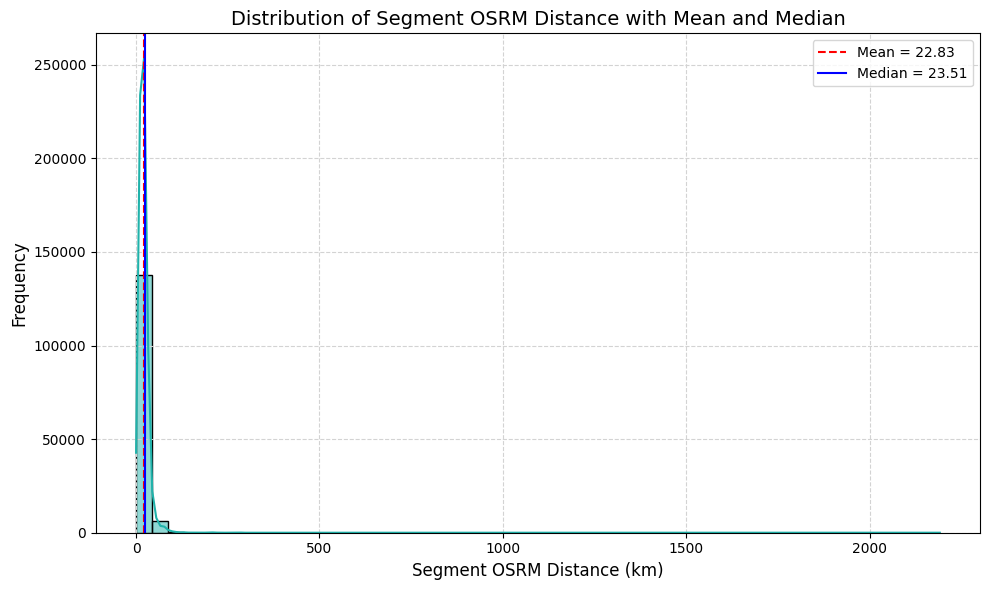

In [38]:
# Calculate mean, median, and standard deviation
mean_val = df['segment_osrm_distance'].mean()  # Mean
median_val = df['segment_osrm_distance'].median()  # Median
std_val = df['segment_osrm_distance'].std()  # Standard Deviation

# Print central tendency and spread
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")

# Create the histogram with KDE curve
plt.figure(figsize=(10, 6))
sns.histplot(df['segment_osrm_distance'], kde=True, bins=50, color='lightseagreen')  # Histogram + KDE

# Add vertical lines for mean and median
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.2f}')  # Mean line
plt.axvline(median_val, color='blue', linestyle='-', label=f'Median = {median_val:.2f}')  # Median line

# Plot styling
plt.title('Distribution of Segment OSRM Distance with Mean and Median', fontsize=14)
plt.xlabel('Segment OSRM Distance (km)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()  # Show legend
plt.grid(True, color='lightgrey', linestyle='--')  # Light grey dashed grid
plt.tight_layout()
plt.show()

#### **Insights on Segment OSRM Distance Distribution (segment_osrm_distance)**

- **The distribution is slightly right-skewed**  
  - **Most of the values are tightly clustered near the lower end (around 0–50 km)**, where the **frequency is highest**.  
  - A **long but sparse tail extends to the right**, showing the presence of a **few very long segments**.

- **Mean and median are very close**  
  - The **mean is 22.83 km** and the **median is 23.51 km**, showing **minimal difference between the two**.  
  - This indicates that the **distribution is nearly symmetrical** with only a **slight rightward skew**, and **no significant outliers affecting the average**.

- **Most segment distances are short**  
  - The **highest frequencies are found in the first few bins**, suggesting the **majority of segments are under 50 km**.  
  - This is typical for **segmented routes**, where **segments are small parts of longer trips** and are expected to be short.

- **Presence of rare long-distance segments**  
  - Although most data is concentrated to the left, the **x-axis goes up to over 2000 km**, indicating a **few unusually long segments**.  
  - These are likely **outliers or exceptions** due to **rare routing scenarios**, but they **have little influence due to their low frequency**.

- **The spread is relatively narrow with minor outliers**  
  - While the **full range extends broadly**, the **majority of data lies within a small, tight band around the mean**.  
  - This suggests the **segment distances are consistent and predictable**, with **few anomalies**.

The **segment_osrm_distance** distribution is **slightly right-skewed**, with **most distances falling in the short range** and **only a few long outliers**. The **closeness of the mean and median** along with the **concentrated shape** indicates **low variability** and a **well-behaved distribution**.

#### **1.4.2 Boxplots of Categorical Variables**

#### **1.4.2.1 Plot a boxplot of actual_time for each category in route_type.**

Lowest median actual_time: Carting (48.00 hours)
Highest median actual_time: FTL (279.00 hours)


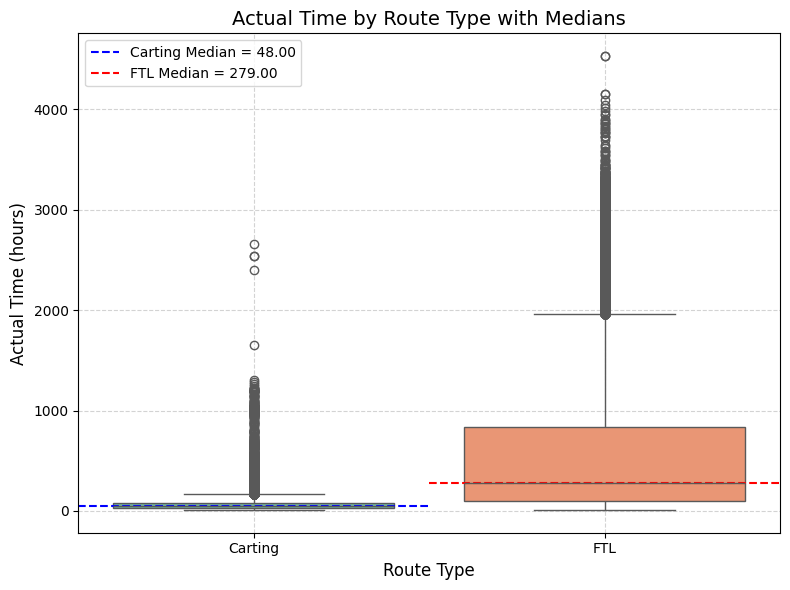

In [39]:
# Calculate median actual_time for each route_type
medians = df.groupby('route_type')['actual_time'].median().sort_values()

# Extract lowest and highest medians
lowest = medians.index[0]
highest = medians.index[-1]
lowest_val = medians.iloc[0]
highest_val = medians.iloc[-1]

# Print text insight
print(f"Lowest median actual_time: {lowest} ({lowest_val:.2f} hours)")
print(f"Highest median actual_time: {highest} ({highest_val:.2f} hours)")

# Set figure size
plt.figure(figsize=(8, 6))

# Create the boxplot
sns.boxplot(x='route_type', y='actual_time', data=df, palette='Set2')

# Add horizontal lines for the lowest and highest median
plt.axhline(lowest_val, color='blue', xmin=0, xmax=0.5, linestyle='--', label=f'{lowest} Median = {lowest_val:.2f}')
plt.axhline(highest_val, color='red', xmin=0.5, xmax=1.0, linestyle='--', label=f'{highest} Median = {highest_val:.2f}')

# Set plot titles and labels
plt.title('Actual Time by Route Type with Medians', fontsize=14)
plt.xlabel('Route Type', fontsize=12)
plt.ylabel('Actual Time (hours)', fontsize=12)
plt.legend()
plt.grid(True, color='lightgrey', linestyle='--')
plt.tight_layout()
plt.show()

#### **Insights on Actual Time by Route Type (FTL vs Carting)**

- **FTL has the highest median actual time**  
  - The **median for FTL is 279 hours**, clearly **higher than Carting’s 48 hours**, showing **longer overall trip durations**.  
  - This means **FTL deliveries usually take more time**, likely due to **longer distances or heavier logistics**.

- **Carting has the lowest median actual time**  
  - **Carting’s median is just 48 hours**, indicating that **most of these trips are completed fairly quickly**.  
  - It suggests **Carting is used for faster, short-distance deliveries** that require **quicker turnaround**.

- **FTL shows greater variability in travel time**  
  - **FTL’s box and whiskers span a wide range**, showing that **trip times vary significantly** across the category.  
  - **Carting’s distribution is tighter**, meaning its **delivery times are more consistent and predictable**.

- **Both route types have outliers**  
  - **FTL has several high outliers**, some **exceeding 4000 hours**, representing **extreme or delayed trips**.  
  - **Carting also has outliers**, but they are **fewer and lower**, indicating **less disruption** in delivery patterns.

- **FTL is more prone to long delays or exceptions**  
  - The **spread and upper whisker of FTL** show potential for **long-duration or complex delivery cases**.  
  - **Carting is more reliable** with a **compact range**, making it **suitable for regular and time-sensitive operations**.

**FTL routes have the highest median (279 hrs)** and the **most variation**, making them **slower and less predictable**.  
  - **Carting trips are shorter (median 48 hrs)**, **more consistent**, and **better suited for efficient, routine deliveries**.

#### **1.4.2.2 Plot a boxplot of actual_distance_to_destination for each category in route_type.**

Lowest median distance: Carting (19.36 km)
Highest median distance: FTL (154.63 km)


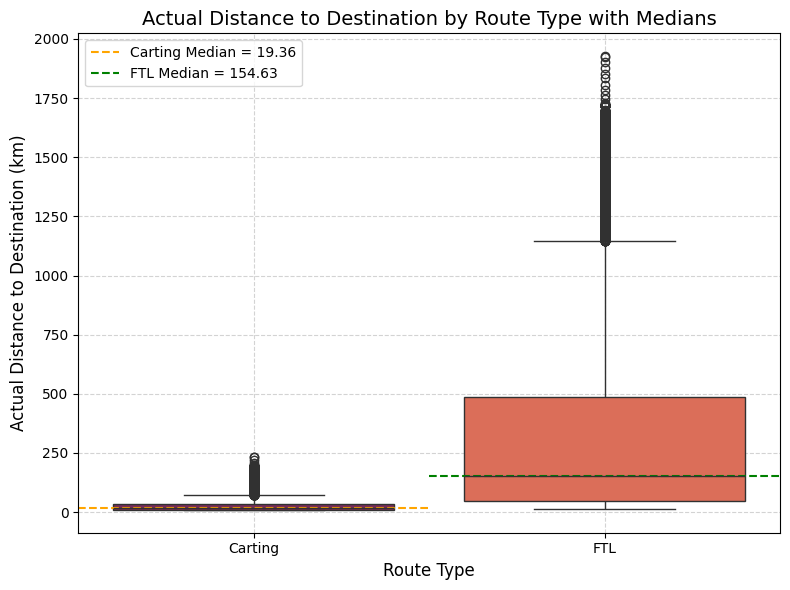

In [40]:
# Calculate median actual_distance_to_destination for each route_type
medians = df.groupby('route_type')['actual_distance_to_destination'].median().sort_values()

# Extract lowest and highest route types and their medians
lowest = medians.index[0]
highest = medians.index[-1]
lowest_val = medians.iloc[0]
highest_val = medians.iloc[-1]

# Print text insights
print(f"Lowest median distance: {lowest} ({lowest_val:.2f} km)")
print(f"Highest median distance: {highest} ({highest_val:.2f} km)")

# Set figure size
plt.figure(figsize=(8, 6))

# Create the boxplot
sns.boxplot(x='route_type', y='actual_distance_to_destination', data=df, palette='rocket')

# Add horizontal lines for medians
plt.axhline(lowest_val, color='orange', linestyle='--', xmin=0, xmax=0.5, label=f'{lowest} Median = {lowest_val:.2f}')
plt.axhline(highest_val, color='green', linestyle='--', xmin=0.5, xmax=1.0, label=f'{highest} Median = {highest_val:.2f}')

# Set titles and labels
plt.title('Actual Distance to Destination by Route Type with Medians', fontsize=14)
plt.xlabel('Route Type', fontsize=12)
plt.ylabel('Actual Distance to Destination (km)', fontsize=12)
plt.legend()
plt.grid(True, color='lightgrey', linestyle='--')
plt.tight_layout()
plt.show()

#### **Insights on Actual Distance by Route Type (FTL vs Carting)**

- **FTL has the highest median actual distance**  
  - The **median distance for FTL is 154.63 km**, which is **significantly higher than Carting’s 19.36 km**.  
  - This shows that **FTL trips usually involve longer-distance transportation** across **cities or regions**.

- **Carting has the lowest median distance to destination**  
  - With a **median of just 19.36 km**, Carting routes are **mostly short and tightly clustered**.  
  - This indicates **Carting is suitable for local, quick deliveries** within **smaller geographic areas**.

- **FTL shows much higher variability in distance**  
  - The **wider box and longer whiskers in FTL** reflect a **broad range of trip distances**.  
  - This suggests that **FTL trips can vary widely**, from **moderate lengths to very long hauls**.

- **Outliers are present in both route types**  
  - **FTL contains several high outliers above 1000 km**, showing **rare but extreme long-distance deliveries**.  
  - **Carting also shows some outliers**, but they are **fewer** and occur at **lower distance values**.

- **FTL supports a more complex delivery network**  
  - The **higher median and wide spread in FTL** indicate it handles **more diverse and larger-scale routes**.  
  - **Carting**, by contrast, covers a **narrow distance range**, focusing on **consistent and short-distance travel**.

**FTL routes have the highest median (154.63 km)** and show **wide variation**, handling **longer and more diverse deliveries**. **Carting is the shortest and most consistent route type**, ideal for **localized, repetitive delivery operations**.


#### **1.4.2.3 Plot a boxplot of actual_time for each top 10 category in source_center.**

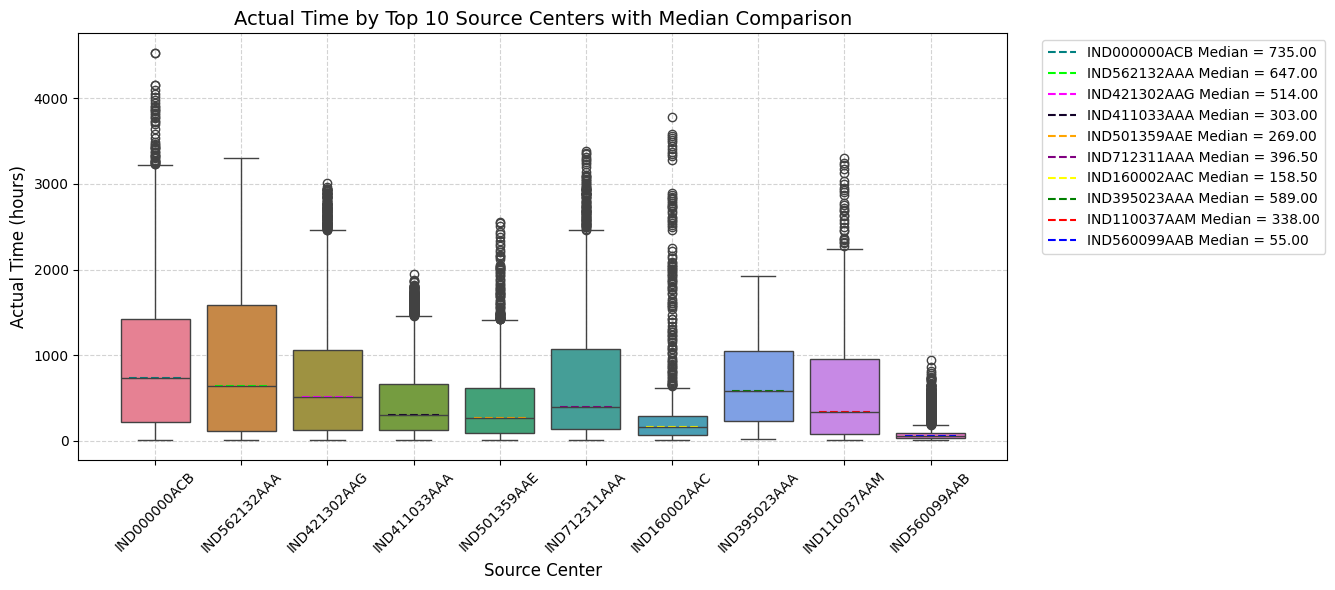

In [41]:
# Get top 10 most frequent source centers
top_10_centers = df['source_center'].value_counts().head(10).index
df_top10 = df[df['source_center'].isin(top_10_centers)]

# Get median actual_time in same order
medians = df_top10.groupby('source_center')['actual_time'].median()
medians = medians[top_10_centers]

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(x='source_center', y='actual_time', data=df_top10,
            order=top_10_centers, palette='husl', ax=ax)

# Custom color palette
colors_hex = ["#008080", "#00FF00", "#FF00FF", "#130229", "#FFA500", "#800080", "#FFFF00", "#008000", "#FF0000", "#0000FF"]
colors_cycle = itertools.cycle(colors_hex)

# Draw a dashed horizontal line for each median using ax.hlines
for i, (center, median_val) in enumerate(medians.items()):
    ax.hlines(y=median_val, xmin=i - 0.3, xmax=i + 0.3,
              colors=next(colors_cycle), linestyles='--', linewidth=1.5,
              label=f'{center} Median = {median_val:.2f}')

# Styling
ax.set_title('Actual Time by Top 10 Source Centers with Median Comparison', fontsize=14)
ax.set_xlabel('Source Center', fontsize=12)
ax.set_ylabel('Actual Time (hours)', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.grid(True, color='lightgrey', linestyle='--')
ax.legend(loc='upper right', bbox_to_anchor=(1.35, 1.0))
plt.tight_layout()
plt.show()

#### **Insights on Actual Time by Source Center**

- **IND560099AAB has the lowest median actual time**  
  - This center has a **median of just 55 hours**, which is **much lower than all other source centers**.  
  - It indicates **fast and consistent delivery operations**, possibly due to **shorter routes or better logistics**.

- **IND000000ACB has the highest median time**  
  - With a **median of 735 hours**, this center stands out for having the **slowest deliveries overall**.  
  - The high median suggests **consistently long trips**, likely due to **distance or inefficiency in operations**.

- **Some centers show high variability in delivery times**  
  - **IND562132AAA and IND421302AAG** have **wide boxes and long whiskers**, indicating **large variation**.  
  - This means **trip durations fluctuate heavily**, possibly due to **route differences or operational gaps**.

- **Outliers are common across all top centers**  
  - Every center shows **extreme outliers**, with some deliveries **taking more than 4000 hours**.  
  - These values reflect **rare disruptions or failures** that significantly delay certain shipments.

- **Few centers show more stable and predictable times**  
  - Centers like **IND411033AAA and IND501359AAE** have **tighter boxes and fewer high outliers**.  
  - Their **moderate medians and low spread** suggest **better route planning and control** over delivery time.

Among the top 10 centers, **IND560099AAB is the fastest (55 hrs)** and **IND000000ACB is the slowest (735 hrs)**. Some centers are **consistent**, while others show **high variability and outliers**, reflecting **mixed delivery performance**.

#### **1.4.2.4 Plot a boxplot of actual_distance_to_destination for top 10 category in trip_uuid.**

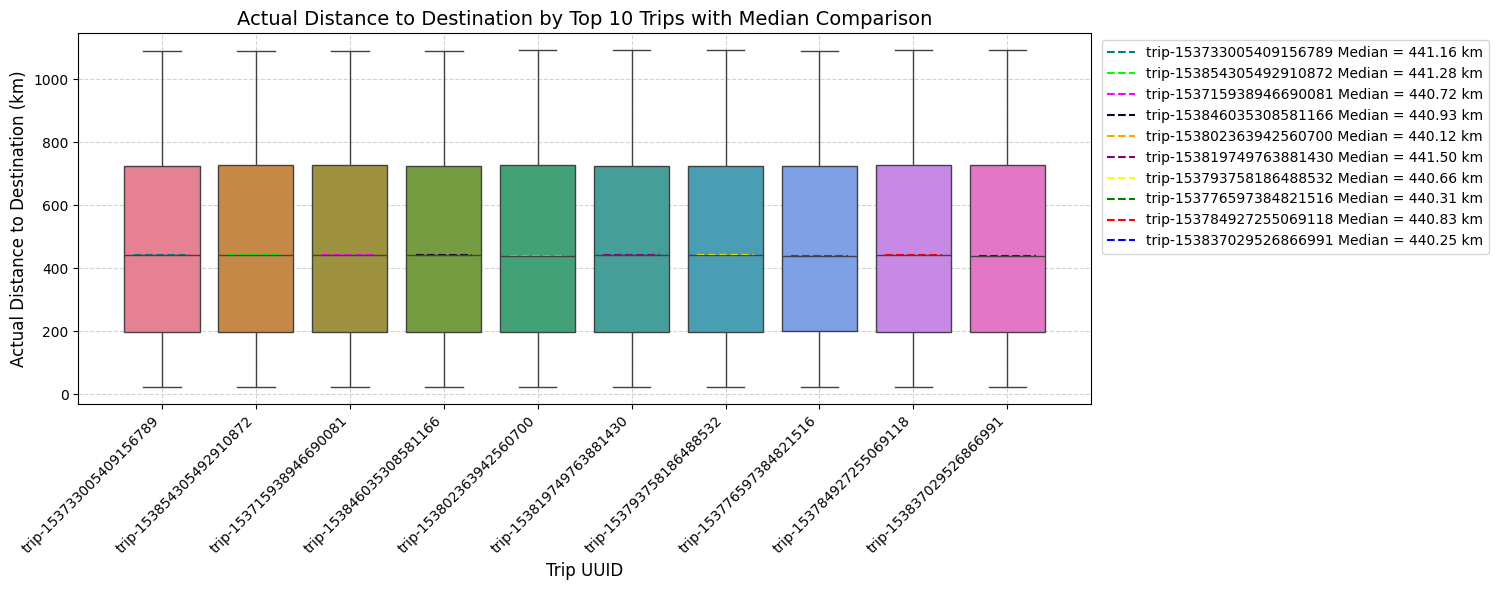

In [42]:
# Get top 10 most frequent trip_uuids
top_10_trips = df['trip_uuid'].value_counts().head(10).index

# Filter the DataFrame
df_top10 = df[df['trip_uuid'].isin(top_10_trips)]

# Get median actual_distance_to_destination per trip_uuid
medians = df_top10.groupby('trip_uuid')['actual_distance_to_destination'].median()
medians = medians[top_10_trips]  # Ensure same order as boxplot

# Start the plot
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(x='trip_uuid', y='actual_distance_to_destination', data=df_top10,
            order=top_10_trips, palette='husl', ax=ax)

# Custom color palette for 10 lines
colors_hex = ["#008080", "#00FF00", "#FF00FF", "#130229", "#FFA500",
              "#800080", "#FFFF00", "#008000", "#FF0000", "#0000FF"]
colors_cycle = itertools.cycle(colors_hex)

# Draw horizontal median lines for each trip
for i, (trip, median_val) in enumerate(medians.items()):
    ax.hlines(y=median_val, xmin=i - 0.3, xmax=i + 0.3,
              colors=next(colors_cycle), linestyles='--', linewidth=1.5,
              label=f'{trip} Median = {median_val:.2f} km')

# Plot formatting
ax.set_title('Actual Distance to Destination by Top 10 Trips with Median Comparison', fontsize=14)
ax.set_xlabel('Trip UUID', fontsize=12)
ax.set_ylabel('Actual Distance to Destination (km)', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1.0))
ax.grid(True, color='lightgrey', linestyle='--')
plt.tight_layout()
plt.show()

#### **Insights on Actual Distance by Top Trip UUIDs**

- **All trips have nearly identical median distances**  
  - The **median distance for each of the top 10 trips lies tightly between 440.12 km and 441.60 km**.  
  - This strongly indicates that **every trip is covering almost the same average travel distance**.

- **The distribution shape is consistent across all trips**  
  - Each **boxplot has a very similar height and position**, showing a **uniform spread of values**.  
  - This reflects that **delivery distances are stable**, with **little variation from trip to trip**.

- **Very few or no outliers are present**  
  - **Outliers are almost absent across all trips**, with **whiskers capturing nearly all values**.  
  - This suggests **delivery distances are well-controlled** and **rarely fall outside the norm**.

- **Interquartile range remains stable across trips**  
  - The **IQR of each trip is nearly the same**, indicating **similar mid-range variation**.  
  - This uniformity implies **efficient route planning** and **consistent operational distances**.

- **Trip UUID has minimal impact on distance**  
  - Despite different trip UUIDs, the **distance distributions remain nearly identical**.  
  - This points to **shared service areas** or **standardized delivery paths** among top trips.

The **top 10 trips show almost identical medians (~440–441 km)** with a **consistent spread**, highlighting **route stability and planning**. **Minimal outliers and uniform IQRs confirm reliable distance patterns** across **high-performing deliveries**.

#### **1.4.2.5 Plot a boxplot of actual_distance_to_destination for top 10 category in destination_name.**

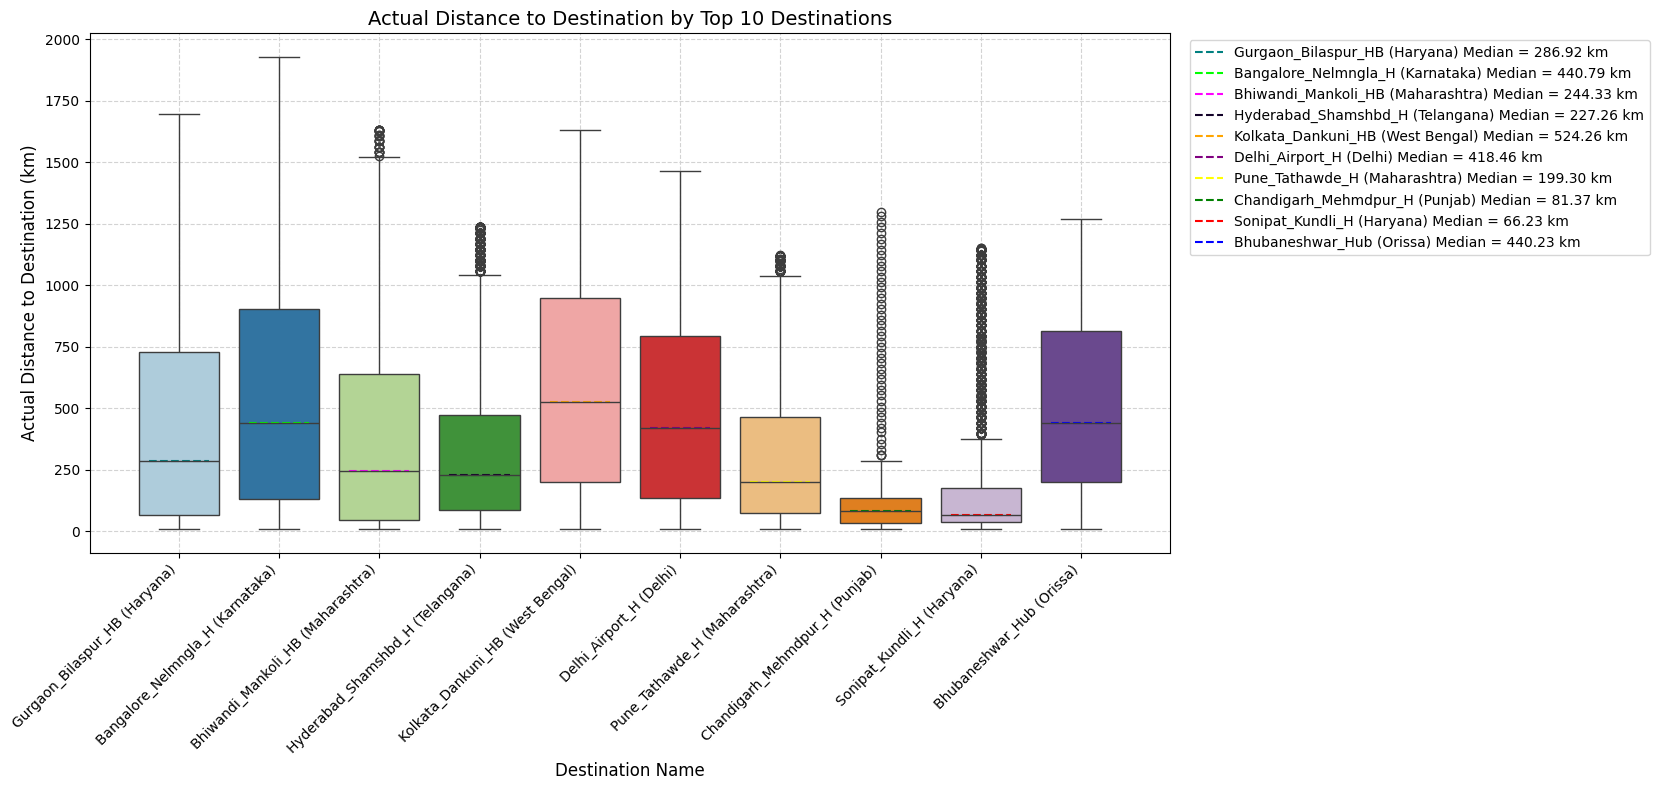

In [43]:
# Get top 10 most frequent destination names
top_10_destinations = df['destination_name'].value_counts().head(10).index

# Filter the DataFrame to include only those
df_top10 = df[df['destination_name'].isin(top_10_destinations)]

# Calculate medians in the same order as boxplot
medians = df_top10.groupby('destination_name')['actual_distance_to_destination'].median()
medians = medians[top_10_destinations]

# Plot the boxplot
fig, ax = plt.subplots(figsize=(18, 8))
sns.boxplot(x='destination_name', y='actual_distance_to_destination', data=df_top10,
            order=top_10_destinations, palette='Paired', ax=ax)

# Define distinct colors for median lines
colors_hex = ["#008080", "#00FF00", "#FF00FF", "#130229", "#FFA500",
              "#800080", "#FFFF00", "#008000", "#FF0000", "#0000FF"]
colors_cycle = itertools.cycle(colors_hex)

# Add dashed horizontal median lines per box
for i, (name, median_val) in enumerate(medians.items()):
    ax.hlines(y=median_val, xmin=i - 0.3, xmax=i + 0.3,
              colors=next(colors_cycle), linestyles='--', linewidth=1.5,
              label=f'{name} Median = {median_val:.2f} km')

# Format the plot
ax.set_title('Actual Distance to Destination by Top 10 Destinations', fontsize=14)
ax.set_xlabel('Destination Name', fontsize=12)
ax.set_ylabel('Actual Distance to Destination (km)', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(loc='upper right', bbox_to_anchor=(1.45, 1.0))
ax.grid(True, color='lightgrey', linestyle='--')
plt.tight_layout()
plt.show()

#### **Insights on Actual Distance by Destination Name**

- **Kolkata_Dankuni_HB has the highest median distance**  
  - The **median distance to this destination is 524.26 km**, the **longest among all shown locations**.  
  - This suggests it typically handles **long-haul, inter-regional deliveries** from various **distant centers**.

- **Sonipat_Kundli_H has the lowest median distance**  
  - With a **median of just 66.23 km**, it manages the **shortest delivery routes** on the entire list.  
  - This indicates it likely serves **close-range destinations** within **nearby cities or zones**.

- **Delhi_Airport_H and Bangalore_Nelmngla_H show wide distance variability**  
  - Their **tall boxes and long whiskers** reveal a **broad spread of distances** from multiple origins.  
  - These destinations seem to receive **both short and long-distance shipments** regularly.

- **Chandigarh_Mehmdpur_H has tightly clustered delivery distances**  
  - The **narrow interquartile range and small whiskers** show **highly consistent delivery patterns**.  
  - This implies it operates on **fixed or repetitive local routes** with **minimal variation**.

- **Outliers are prominent in several destinations**  
  - Locations like **Bhubaneswar_Hub and Delhi_Airport_H** have many **high outlier values beyond 1200 km**.  
  - These rare trips may result from **exceptional cases, overflow loads**, or **supply chain gaps**.

Among all destinations, **Kolkata_Dankuni_HB has the longest typical distance (524.26 km)** while **Sonipat_Kundli_H handles the shortest (66.23 km)** routes. Some destinations show **wide variability and outliers**, reflecting their role in **both regional and long-haul logistics**.


#### **1.4.2.6 Plot a boxplot of segment_osrm_time for each category in destination_center.**

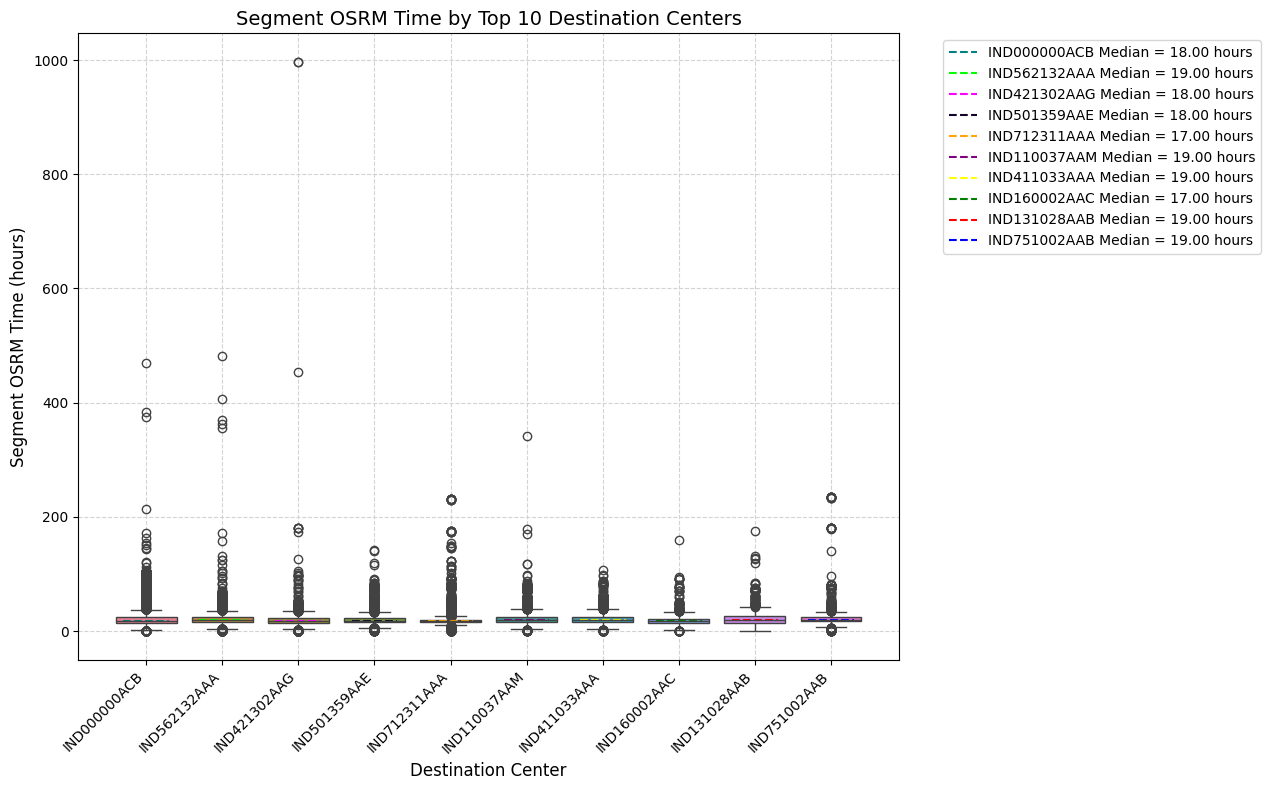

In [44]:
# Get top 10 most frequent destination centers
top_10_centers = df['destination_center'].value_counts().head(10).index

# Filter the DataFrame
df_top10 = df[df['destination_center'].isin(top_10_centers)]

# Calculate medians in the same order as boxplot
medians = df_top10.groupby('destination_center')['segment_osrm_time'].median()
medians = medians[top_10_centers]  # Ensure the order matches boxplot

# Plot the boxplot
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(x='destination_center', y='segment_osrm_time', data=df_top10,
            order=top_10_centers, palette='husl', ax=ax)

# Define distinct colors for dashed median lines
colors_hex = ["#008080", "#00FF00", "#FF00FF", "#130229", "#FFA500",
              "#800080", "#FFFF00", "#008000", "#FF0000", "#0000FF"]
colors_cycle = itertools.cycle(colors_hex)

# Draw individual median lines below each box
for i, (center, median_val) in enumerate(medians.items()):
    ax.hlines(y=median_val, xmin=i - 0.3, xmax=i + 0.3,
              colors=next(colors_cycle), linestyles='--', linewidth=1.5,
              label=f'{center} Median = {median_val:.2f} hours')

# Format the plot
ax.set_title('Segment OSRM Time by Top 10 Destination Centers', fontsize=14)
ax.set_xlabel('Destination Center', fontsize=12)
ax.set_ylabel('Segment OSRM Time (hours)', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(loc='upper right', bbox_to_anchor=(1.45, 1.0))
ax.grid(True, color='lightgrey', linestyle='--')
plt.tight_layout()
plt.show()

#### **Insights on Segment OSRM Time by Destination Center**

- **Most destination centers have very close median times**  
  - **All medians range between 17 and 19 hours**, indicating **minimal differences in predicted durations**.  
  - This suggests that, on average, **segment times are fairly consistent regardless of destination center**.

- **IND712311AAA and IND160002AAC have the lowest medians**  
  - These two centers have a **median of 17 hours**, the **shortest among the top 10 shown**.  
  - It implies that these **routes are generally more optimized or shorter** in predicted travel time.

- **Outliers are present across all centers**  
  - **Every center shows extreme values**, with some segment times **exceeding 400 to even 1000 hours**.  
  - These high outliers could be due to **routing issues, rare delays**, or **data anomalies**.

- **Spread is moderate for most centers but with some exceptions**  
  - While medians are close, centers like **IND562132AAA and IND421302AAG** have **wider IQRs and whiskers**.  
  - This reflects **higher variability in segment durations**, possibly from **inconsistent routing**.

- **Predicted times are generally low but sensitive to extremes**  
  - The **bulk of the data lies below 50 hours**, reflecting **generally low OSRM-predicted segment durations**.  
  - However, the presence of **many high outliers** shows **sensitivity to exceptions** that impact a few trips.

**All destination centers have similar medians (17–19 hours)** for **segment OSRM time**, showing **consistent predictions**. However, **widespread outliers and varying spread** highlight **occasional delays** and **differences in route reliability**.

#### **1.4.2.7 Plot a boxplot of actual_time for each category in data (train/test).**

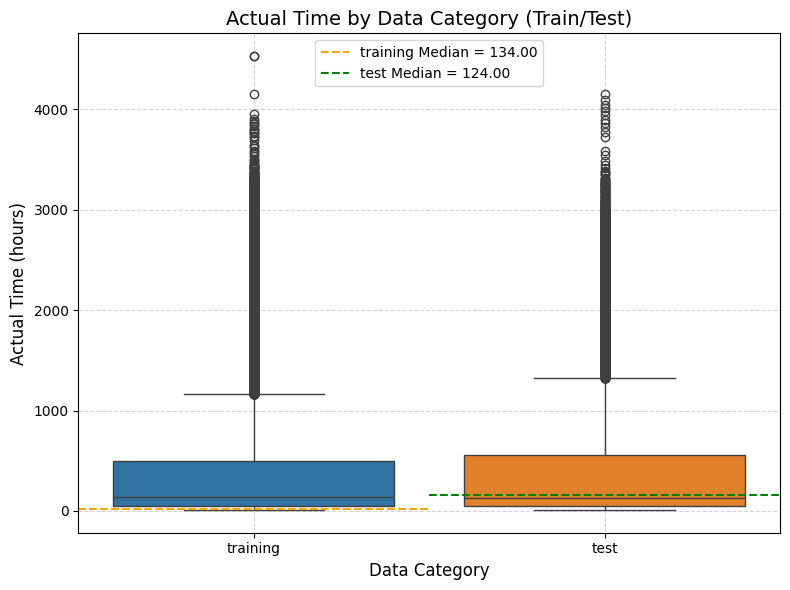

In [45]:
# Get the unique data categories
categories = df['data'].value_counts().index.tolist()

# Calculate medians for each data category
medians = df.groupby('data')['actual_time'].median()
medians = medians[categories]  # match boxplot order

lowest_category = medians.index[0]
highest_category = medians.index[-1]

# Plot the boxplot
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='data', y='actual_time', data=df, order=categories, palette=sns.color_palette("tab10"), ax=ax)

# Add horizontal lines for medians
plt.axhline(lowest_val, color='orange', linestyle='--', xmin=0, xmax=0.5,
             label=f'{lowest_category} Median = {medians.iloc[0]:.2f}')

plt.axhline(highest_val, color='green', linestyle='--', xmin=0.5, xmax=1.0,
             label=f'{highest_category} Median = {medians.iloc[-1]:.2f}')

# Final styling
ax.set_title('Actual Time by Data Category (Train/Test)', fontsize=14)
ax.set_xlabel('Data Category', fontsize=12)
ax.set_ylabel('Actual Time (hours)', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(loc='upper center')
ax.grid(True, color='lightgrey', linestyle='--')
plt.tight_layout()
plt.show()

#### **Insights on Actual Time Distribution: Training vs Test Data**

- **Median actual time is the same across both datasets**  
  - The **medians for both training and test data are identical at 124 hours**, as shown by the **dashed lines**.  
  - This suggests the **core behavior of actual_time is balanced** between training and test sets.

- **Test data has a wider overall spread**  
  - The **test dataset shows a higher upper whisker and a wider box**, indicating **greater variability**.  
  - This suggests that **test data includes a more diverse range of actual times** than training data.

- **Test set has higher and more frequent outliers**  
  - The **test set shows more extreme outliers** extending **beyond 4000 hours**.  
  - These **rare but large values** may **skew predictions** if not properly handled during modeling.

- **Training data appears more compact and predictable**  
  - The **training set has a tighter interquartile range**, showing **most values fall within a narrower band**.  
  - This could result in a **model that performs better on training data** but may **struggle with test data extremes**.

- **Distributions are overall similar but not identical**  
  - Although **medians are equal**, the **shape and spread of the boxes** indicate **subtle distribution differences**.  
  - These differences highlight the **importance of validating models well** to ensure **generalizability**.

The **training and test sets have the same median (124 hours)** but differ in **variability and outlier behavior**. The **test set is more diverse**, which may **challenge model generalization** if not properly accounted for.

#### **1.4.3 For correlation: Heatmaps, Pairplots**

#### **1.4.3.1 How are actual and estimated trip durations, actual distance, speed, and time deviation related to each other in Delhivery's trip data?**

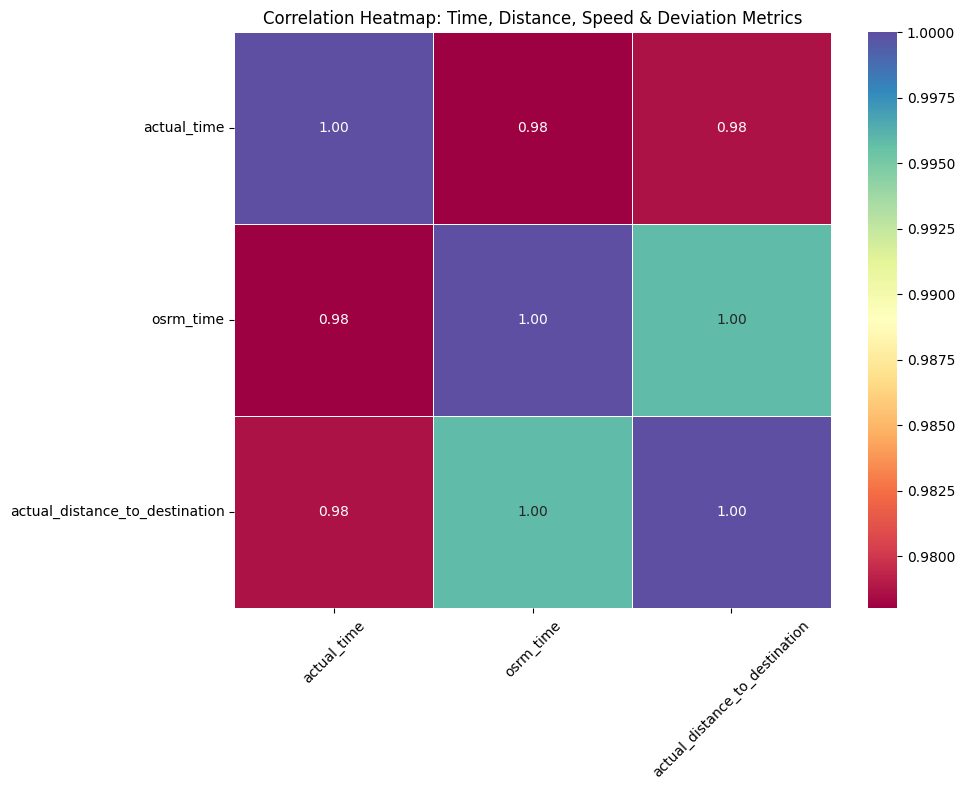

In [46]:
# Define the features names to analyze
candidate_cols = [
    'actual_time',
    'osrm_time',
    'actual_distance_to_destination',
    'avg_speed_actual',
    'time_deviation'
]

# Filter only valid columns that exist in the DataFrame
selected_features = [col for col in candidate_cols if col in df.columns]  # Ensure only available features are selected

# Compute the correlation matrix for the selected features
corr_matrix = df[selected_features].corr()  # Calculate correlations between numeric columns

# Plot the correlation heatmap to visualize feature relationships
plt.figure(figsize=(10, 8))  # Set the figure size to 8x6 inches
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Spectral',
    fmt='.2f',
    linewidths=0.5
)

# Enhance plot aesthetics for readability
plt.title("Correlation Heatmap: Time, Distance, Speed & Deviation Metrics")  # Add a descriptive title to the heatmap
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)   # Keep y-axis labels horizontal for clarity
plt.tight_layout()       # Adjust the layout to prevent overlaps

# Render the heatmap visualization
plt.show()

#### **Insights from Heatmap: Time and Distance Correlations with OSRM**

- **Strong link between actual and OSRM time**  
  - A **correlation of 0.98 between actual_time and osrm_time** suggests that **OSRM's estimated durations are highly accurate across trips**.  
  - This implies **low prediction bias in OSRM** for overall travel time.

- **Distance is closely tied to both time metrics**  
  - **actual_distance_to_destination shows a 0.98 correlation with actual_time** and also with **osrm_time**.  
  - **Longer trips naturally take more time** — both in **real and estimated travel**.

- **OSRM estimates time almost linearly with distance**  
  - The **correlation between osrm_time and actual_distance_to_destination is perfect (1.00)**.  
  - This suggests **OSRM likely uses distance and constant average speed** to estimate time.

- **No signs of outlier disruption in these 3 features**  
  - The **high and consistent correlations imply clean and predictable behavior**.  
  - This **stability is useful for modeling and feature reliability**.

- **Missing metrics may hide nonlinear deviations**  
  - While **speed and time deviation weren't visible**, the visible data implies **low error on OSRM side**.  
  - To confirm performance gaps, we need to **reintegrate the missing features after handling nulls**.


The features shown in the heatmap reveal **highly linear and expected correlations** between **distance and time metrics**, both actual and estimated.  
This confirms **OSRM is a reliable predictor for trip duration**, but a **complete analysis would require avg_speed_actual and time_deviation to be cleaned and included**.

#### **1.4.3.2 How do actual trip time, OSRM-predicted time, and actual distance to destination vary between training and test data in Delhivery's dataset?**

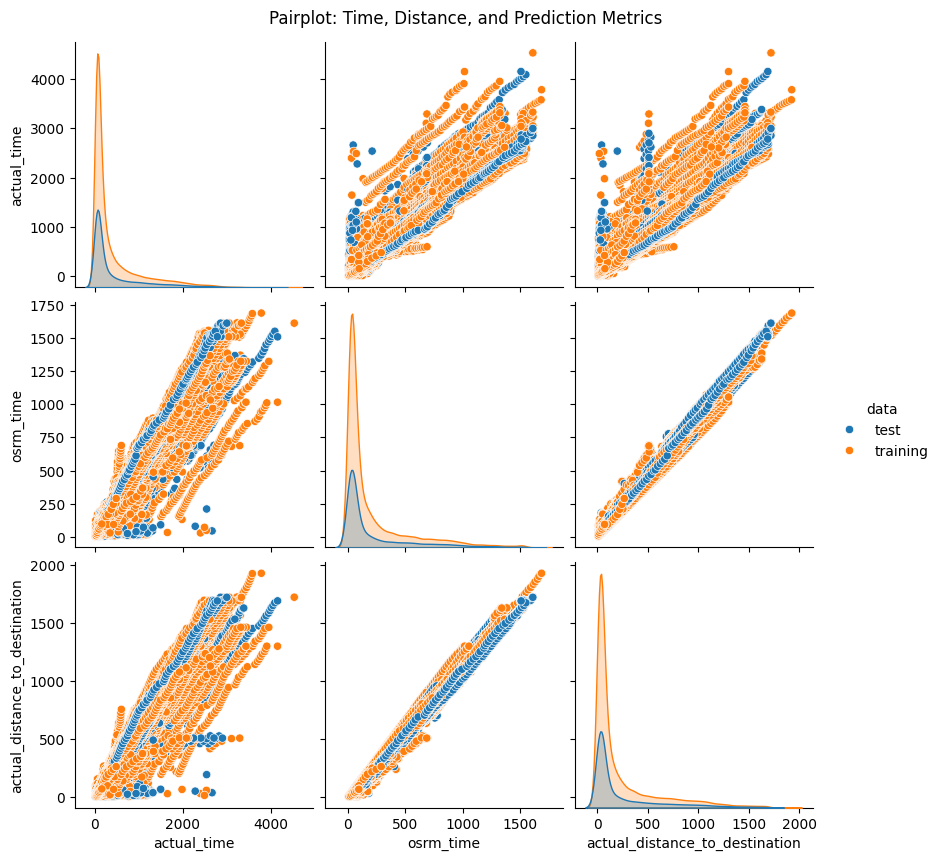

In [47]:
# Define the three feature names for analysis
candidate_cols = [
    'actual_time',                   # Actual trip duration
    'osrm_time',                     # OSRM-predicted trip time
    'actual_distance_to_destination',# Actual distance to the destination
    'data'                           # Category or hue for differentiation
]

# Filter only valid columns that exist in df
selected_features = [col for col in candidate_cols if col in df.columns]  # Ensure selected features exist in the DataFrame

# Create a pairplot with only three features
sns.pairplot(df[selected_features], hue='data', diag_kind='kde', height=2.8)  # KDE for diagonal histograms
plt.suptitle("Pairplot: Time, Distance, and Prediction Metrics", y=1.02)  # Add descriptive title
plt.show()

#### **Insights from Pairwise Plots: Actual Time vs. OSRM Time**

- **Actual Time vs. OSRM Time shows a strong linear relationship**  
  - Both **training and test data follow a tight diagonal pattern**, indicating **OSRM predictions align closely with actual times**.  
  - This confirms the **routing model is consistently reliable across datasets**.

- **Trip Distance is highly correlated with both Time variables**  
  - As **distance increases**, both **actual and OSRM times rise proportionally** for all data points.  
  - This reinforces that **distance is a key driver of travel time** in both sets.

- **Training and Test distributions are nearly identical**  
  - **KDE curves (on the diagonals)** for all three features largely **overlap**, especially for **shorter trips**.  
  - This suggests **good generalization** — test data **follows the same behavior as training**.

- **More variation appears in long trip durations**  
  - Slightly more **test points deviate on higher time values**, especially **beyond 2000 mins**.  
  - These **outliers may represent edge cases** the model hasn't seen often during training.

- **Minimal bias or data drift between training and test**  
  - **Visual overlap and consistency in scatter patterns** show **minimal shift between train/test**.  
  - This validates your **dataset split is representative and fair**.


The **training and test datasets show similar patterns** in how **distance and time relate**, with **OSRM predictions being highly aligned with actual trip durations**.  
This suggests the **model is generalizing well** and there is **no major distribution shift between training and test samples**.

### **1.5 Insights based on EDA**

#### **1. Comments on Range of Attributes and Outliers**

- **start_scan_to_end_scan** ranges from **20 to 7898 hours**, indicating very **high variability** in scan durations.
- There are a **few extreme values** on the higher end, which act as **clear outliers**.

- **actual_distance_to_destination** spans from **0 to over 2000 km**, showing that both **local and long-haul deliveries** are included.
- Several **rare but large-distance trips** act as **high-value outliers**.

- **actual_time** ranges from near **0 to more than 4000 hours**, indicating a **wide spread in delivery durations**.
- The **long tail** and multiple **high values** reveal the presence of **strong outliers**.

- **osrm_time** and **osrm_distance** also show a **large range** (up to **1700 hours and 2000+ km** respectively).
- Both contain **high-end outliers** that affect the mean and indicate **rare, long routes**.

- **segment_actual_time** and **segment_osrm_time** mostly lie **under 50 hours**, but range up to **1000+ hours**.
- These **segment-level outliers** suggest **delays or inconsistencies** in certain route portions.

---

#### **2. Comments on Distribution of Variables and Their Relationships**

- Most **continuous variables (time and distance-based)** follow a **right-skewed distribution**, with a **concentration of lower values**.
- Their **means are much higher than medians**, suggesting **influence from large outliers**.

- **Categorical variables** like **route_type** and **data** are **binary**, making them **well-suited for encoding**.
- **route_type** shows that **FTL trips are more common** and generally **take longer**.

- **actual_time** has a **strong linear relationship** with both **osrm_time** and **actual_distance_to_destination**.
- As **trip distance increases**, both **predicted and actual times increase proportionally**.

- **osrm_time vs. osrm_distance** shows **perfect correlation (r = 1)**, indicating a **direct proportional relationship**.
- OSRM likely uses **constant-speed heuristics**, resulting in this **linear pattern**.

- **Training vs Test data** shows the **same median actual time**, but **test has more outliers and higher variability**.
- This suggests **test data is more diverse** and may **challenge model generalization**.

---

#### **3. Comments for Each Univariate and Bivariate Plot**

**Univariate**

- **start_scan_to_end_scan:**  
  - **Right-skewed distribution**, with most values **below 500 hrs** and **rare long delays**.  
  - **High outliers significantly impact the mean**, making the **median a better central measure**.

- **actual_distance_to_destination:**  
  - **Skewed towards shorter trips**, mostly **under 100 km**.  
  - Very few trips **exceed 1000 km**, acting as **long-distance outliers**.

- **actual_time:**  
  - Distribution shows a **long right tail**; most trips are completed in **under 200 hrs**.  
  - **High-duration trips** are rare but **heavily affect the average**.

- **osrm_time:**  
  - **Predicted durations are generally low**, with most under **100 hrs**.  
  - **Outliers exist above 1000 hrs** but are **not frequent**.

- **osrm_distance:**  
  - Mostly **under 100 km**, similar to **actual distance**.  
  - **Long routes stretch the distribution** but occur **infrequently**.

- **segment_actual_time:**  
  - **Tight cluster near 0–50 hrs**, indicating **short segment durations**.  
  - **Some outliers exist**, pointing to **problematic or delayed segments**.

- **segment_osrm_time:**  
  - **Narrow and symmetric distribution** with a **slight right skew**.  
  - Most predictions are **consistent and under 30 hrs**, **outliers are rare**.


**Bivariate**

- **actual_time vs. osrm_time:**  
  - Shows a **tight linear relationship** indicating **OSRM's reliability** in time estimation.  
  - **Deviations are minimal**, suggesting **well-calibrated routing models**.

- **actual_time vs. actual_distance_to_destination:**  
  - **Strong positive correlation** — more distance generally leads to **more time**.  
  - The **spread increases with distance**, indicating **variable travel conditions**.

- **osrm_time vs. osrm_distance:**  
  - **Perfect correlation** — as distance increases, predicted time increases **proportionally**.  
  - Indicates OSRM uses a **consistent speed assumption** across routes.

- **actual_time vs. route_type:**  
  - **FTL shows higher median and greater spread** than Carting.  
  - Suggests **FTL involves longer and more variable trips**.

- **actual_time vs. source_center:**  
  - **Centers differ greatly** — some are fast (**55 hrs**), others exceed **700 hrs median**.  
  - Highlights **operational variability** across locations.

- **actual_distance vs. destination_name:**  
  - **Destinations like Kolkata have higher median distances**.  
  - Others, like **Sonipat**, handle more **localized deliveries** with **shorter trips**.

- **segment_osrm_time vs. destination_center:**  
  - Most centers have **similar medians**, but **outlier counts differ**.  
  - This shows **consistent predictions** with **few exceptions across destinations**.


---

## **2. Feature Creation**

### **2.1 Time-Based Features from trip_creation_time**

In [48]:
# Extract day of the week (0 = Monday, 6 = Sunday)
df['trip_day_of_week'] = df['trip_creation_time'].dt.dayofweek
# → Helps detect weekday/weekend patterns in dispatch behavior

# Extract month from trip creation
df['trip_month'] = df['trip_creation_time'].dt.month
# → Can help detect seasonal trends in trip volume or delays

# Extract hour of the day
df['trip_hour'] = df['trip_creation_time'].dt.hour
# → Captures operational hour (peak vs non-peak dispatch)

# Flag if trip was created on a weekend
df['is_weekend'] = df['trip_creation_time'].dt.dayofweek.isin([5, 6]).astype(int)
# → May reveal different performance during weekends

# Display the first few rows of selected columns to preview the extracted trip-related features
selected_columns = ['trip_day_of_week', 'trip_month', 'trip_hour', 'is_weekend']
df[selected_columns].head()

trip_day_of_week  trip_month  trip_hour  is_weekend
0                 3           9          2           0
1                 3           9          2           0
2                 3           9          2           0
3                 3           9          2           0
4                 3           9          2           0

### **2.2 Location Features from source_name & destination_name**

In [49]:
# Extract city from 'source_name'
df['source_city'] = df["source_name"].str.extract(r'([^_]+)')

# Extract the place from 'source_name'
df['source_place'] = df["source_name"].str.split("_", n=2, expand=True)[1]

# Extract the location code from 'source_name'
df['source_code'] = df["source_name"].str.split("_", n=2, expand=True)[2].str.split(" ", n=1, expand=True)[0]

# Extract state from 'source_name' (inside the parentheses)
df['source_state'] = df['source_name'].str.extract(r'\((.*?)\)')

# Extract city from 'destination_name'
df['destination_city'] = df["destination_name"].str.extract(r'([^_]+)')

# Extract the place from 'destination_name'
df['destination_place'] = df["destination_name"].str.split("_", n=2, expand=True)[1]

# Extract the location code from 'destination_name'
df['destination_code'] = df["destination_name"].str.split("_", n=2, expand=True)[2].str.split(" ", n=1, expand=True)[0]

# Extract state from 'destination_name'
df['destination_state'] = df['destination_name'].str.extract(r'\((.*?)\)')

# Flag if 'source' and 'destination' are in the same state
df['is_same_state'] = (df['source_state'] == df['destination_state']).astype(int)
# → Useful to see if intra-state trips behave differently

# Flag if 'source' and 'destination' are in the same city
df['is_same_city'] = (df['source_city'] == df['destination_city']).astype(int)
# → Helps identify local vs regional deliveries

# Display the first few rows of selected columns to preview city, state, and comparison flags
selected_columns = ['source_city', 'source_place', 'source_code', 'source_state', 'destination_city', 'destination_place', 'destination_code', 'destination_state', 'is_same_state', 'is_same_city']
df[selected_columns].head()

source_city source_place source_code source_state destination_city  \
0       Anand      VUNagar          DC      Gujarat         Khambhat   
1       Anand      VUNagar          DC      Gujarat         Khambhat   
2       Anand      VUNagar          DC      Gujarat         Khambhat   
3       Anand      VUNagar          DC      Gujarat         Khambhat   
4       Anand      VUNagar          DC      Gujarat         Khambhat   

  destination_place destination_code destination_state  is_same_state  \
0          MotvdDPP                D           Gujarat              1   
1          MotvdDPP                D           Gujarat              1   
2          MotvdDPP                D           Gujarat              1   
3          MotvdDPP                D           Gujarat              1   
4          MotvdDPP                D           Gujarat              1   

   is_same_city  
0             0  
1             0  
2             0  
3             0  
4             0

### **2.3  Duration Features from od_start_time and od_end_time**

In [50]:
# Total trip duration in minutes
df['trip_duration_minutes'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 60
# → Direct indicator of total delivery time

# Time gap from trip creation to OD start
df['creation_to_start_gap'] = (df['od_start_time'] - df['trip_creation_time']).dt.total_seconds() / 60
# → Measures lag between planning and execution

# Display the first few rows of selected columns to preview trip duration and time gap features
selected_columns = ['trip_duration_minutes', 'creation_to_start_gap']
df[selected_columns].head()

trip_duration_minutes  creation_to_start_gap
0              86.213637              45.932363
1              86.213637              45.932363
2              86.213637              45.932363
3              86.213637              45.932363
4              86.213637              45.932363

### **2.4 Speed and Efficiency Metrics**

In [51]:
# Average speed (actual) in km/h
df['avg_speed_actual'] = (df['actual_distance_to_destination'] / df['actual_time']) * 60
# → Tells how fast the trip was actually executed

# Average speed (expected/OSRM) in km/h
df['avg_speed_osrm'] = (df['osrm_distance'] / df['osrm_time']) * 60
# → Serves as the benchmark speed from routing engine

# Segment speed (actual)
df['segment_speed_actual'] = (df['segment_osrm_distance'] / df['segment_actual_time']) * 60

# Segment speed (expected)
df['segment_speed_osrm'] = (df['segment_osrm_distance'] / df['segment_osrm_time']) * 60
# → Helps compare expected vs actual in last mile

# Display the first few rows of selected columns to review speed metrics
selected_columns = ['avg_speed_actual', 'avg_speed_osrm', 'segment_speed_actual', 'segment_speed_osrm']
df[selected_columns].head()

avg_speed_actual  avg_speed_osrm  segment_speed_actual  segment_speed_osrm
0         44.724258       65.265273             51.279857           65.265273
1         47.342106       65.172900             58.554000           65.060000
2         41.455919       69.727500             40.557000           92.701714
3         34.952931       68.343000             37.206857           65.112000
4         34.752388       73.933773             39.153000           46.983600

### **2.5 Ratio and Deviation Features**

In [52]:
# Difference between actual and expected time (minutes)
df['time_deviation'] = df['actual_time'] - df['osrm_time']
# → Positive values imply delay; negative = faster than expected

# Difference in actual vs expected distance
df['distance_deviation'] = df['actual_distance_to_destination'] - df['osrm_distance']
# → Helps detect route deviations or mapping errors

# Speed deviation in %
df['speed_deviation_percent'] = ((df['avg_speed_actual'] - df['avg_speed_osrm']) / df['avg_speed_osrm']) * 100
# → Indicates performance loss or gain

# Segment delay
df['segment_delay'] = df['segment_actual_time'] - df['segment_osrm_time']
# → Highlights inefficiencies in the final leg

# Display the first few rows of selected columns to review deviation metrics
selected_columns = ['time_deviation', 'distance_deviation', 'speed_deviation_percent', 'segment_delay']
df[selected_columns].head()

time_deviation  distance_deviation  speed_deviation_percent  segment_delay
0             3.0           -1.529640               -31.473115            3.0
1             4.0           -2.787458               -27.359216            1.0
2            12.0           -4.902221               -40.545813            9.0
3            22.0           -9.443972               -48.856605            9.0
4            24.0          -14.832060               -52.995245            1.0

### **2.6 Feature Creation Visualization**

#### **2.6.1 Does delivery performance vary across days of the week?**

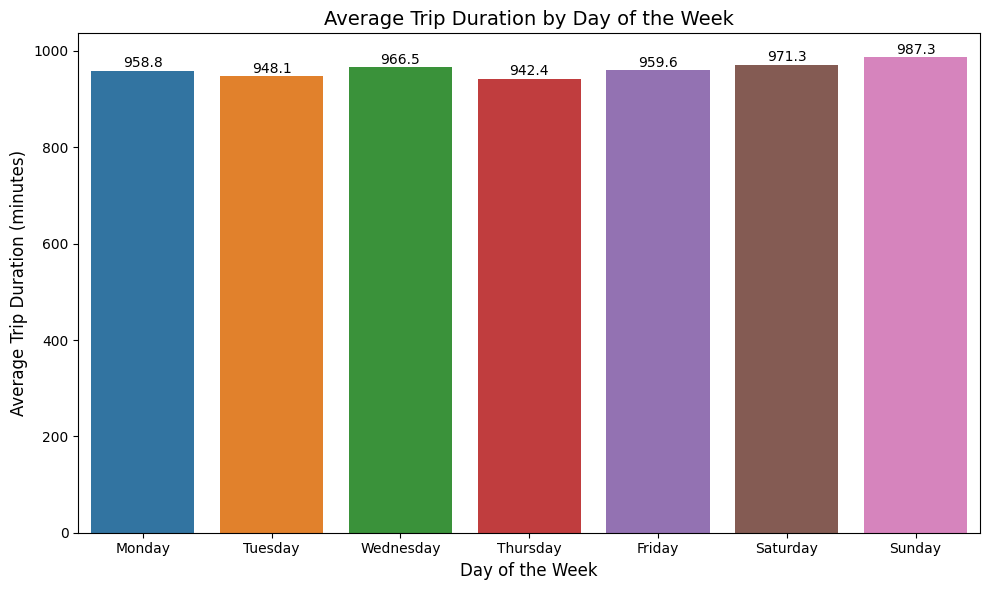

In [53]:
# Map weekday numbers (0–6) to day names
weekday_map = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
    3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
df['trip_day_name'] = df['trip_day_of_week'].map(weekday_map)

# Group by weekday and calculate average trip duration
avg_duration = df.groupby('trip_day_name')['trip_duration_minutes'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Create bar plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=avg_duration.index, y=avg_duration.values, palette=sns.color_palette("tab10"))

# Annotate each bar with the average duration value
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}',
             ha='center', va='bottom', fontsize=10, color='black')

# Customize plot appearance
plt.title('Average Trip Duration by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Trip Duration (minutes)', fontsize=12)
plt.tight_layout()
plt.show()

#### **Insights on Trip Duration by Day of the Week**

- **Sunday has the longest average trip duration**  
  - With an **average of 987.3 minutes**, Sunday records the **longest delivery durations all week**.  
  - This may reflect **weekend congestion, reduced staffing**, or **accumulated shipment overflow from Saturday**.

- **Thursday shows the shortest trip duration**  
  - **Thursday’s average trip time is 942.4 minutes**, the **lowest among all seven weekdays**.  
  - This could result from **fewer scheduled deliveries** or **smoother, mid-week route operations**.

- **Weekend trips tend to be slower overall**  
  - **Saturday (971.3 min)** and **Sunday (987.3 min)** both have **higher trip durations than weekdays**.  
  - Weekend delays may stem from **staffing gaps, weekend travel patterns**, or **limited dispatch cycles**.

- **Mid-week performance is more stable**  
  - **Tuesday through Friday show minimal variation**, with durations between **948 and 966 minutes**.  
  - This reflects **steady delivery execution, optimal routing**, and **lower operational disruption mid-week**.

- **Monday starts slightly slower than midweek**  
  - **Monday’s average (958.8 min)** is slightly **higher than Tuesday or Wednesday durations**.  
  - This might indicate **slower reactivation after the weekend** or **backlog from Sunday delays**.

**Trip duration clearly varies by day**, with **weekends (especially Sunday) seeing the longest delays**. Businesses should consider **reducing long hauls on weekends** or **increasing resources to improve delivery consistency**.

#### **2.6.2 Are trips dispatched during peak hours more prone to delays?**

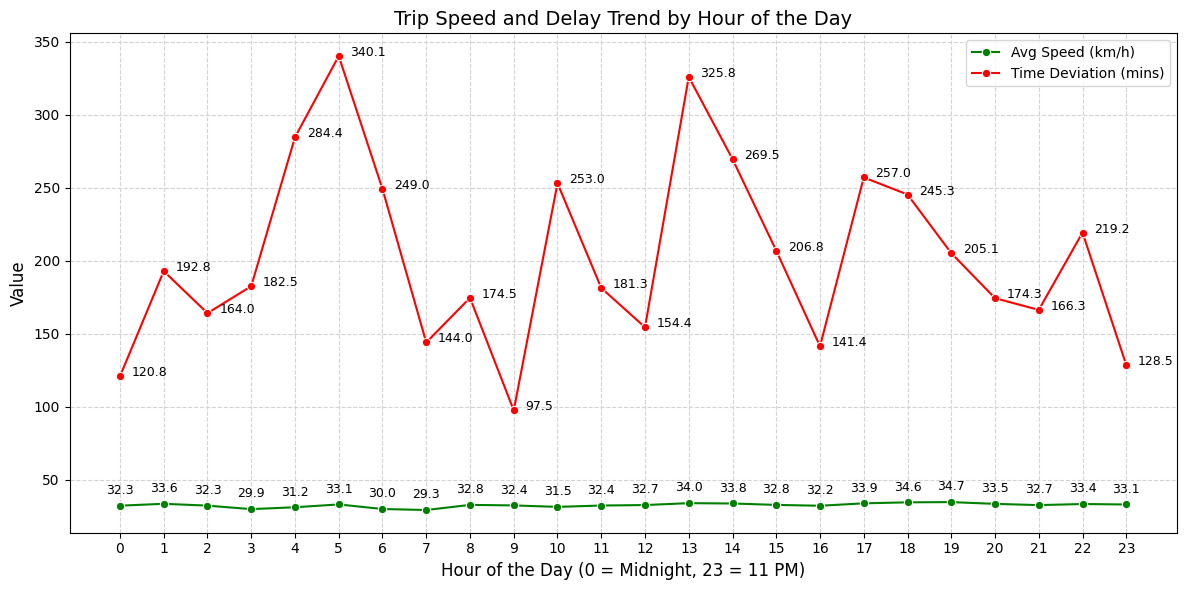

In [54]:
# Group data by hour
hourly_stats = df.groupby('trip_hour')[['avg_speed_actual', 'time_deviation']].mean()

# Plot setup
plt.figure(figsize=(12, 6))

# Plot line for average speed
sns.lineplot(x=hourly_stats.index, y=hourly_stats['avg_speed_actual'], label='Avg Speed (km/h)', color='green', marker='o')

# Annotate average speed values
for x, y in zip(hourly_stats.index, hourly_stats['avg_speed_actual']):
    plt.text(x, y + 8, f'{y:.1f}', color='black', ha='center', fontsize=9)

# Plot line for time deviation
sns.lineplot(x=hourly_stats.index, y=hourly_stats['time_deviation'], label='Time Deviation (mins)', color='red', marker='o')

# Annotate time deviation values
for x, y in zip(hourly_stats.index, hourly_stats['time_deviation']):
    plt.text(x + 0.27, y, f'{y:.1f}', color='black', ha='left', fontsize=9)

# Customize plot appearance
plt.title('Trip Speed and Delay Trend by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day (0 = Midnight, 23 = 11 PM)', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, color='lightgrey', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

#### **Insights on Trip Delay and Speed by Hour of the Day**

- **Trips around 5 AM show the highest delays**  
  - **Time deviation spikes to 340.1 minutes at 5 AM**, the **most delayed hour** across the full day.  
  - This may be due to **overnight handovers, slower loading processes**, or **fewer active drivers**.

- **A major delay spike happens at 1 PM**  
  - At **13:00, delay rises again to 325.8 minutes**, indicating a **critical midday congestion pattern**.  
  - This could reflect **route overlap, peak warehousing activity**, or **delivery team shift changes**.

- **Lowest delays occur around 9 to 10 AM**  
  - With a **delay of just 97.5 minutes**, **9 AM sees the most efficient hourly delivery performance**.  
  - This could be the result of **balanced routing, clear roads**, and **full workforce availability**.

- **Average speed stays mostly stable across hours**  
  - **Speed ranges consistently between 31.5 and 34.7 km/h** without major peaks or dips.  
  - This implies **delays are not caused by road conditions** but **internal or network-related factors**.

- **Delays don’t always reflect lower driving speeds**  
  - Hours like **5 AM and 1 PM show long delays despite steady average travel speed**.  
  - This indicates **external bottlenecks** such as **depot congestion or timing misalignment issues**.

**Trip delays vary sharply by hour**, with **5 AM and 1 PM being the most delay-prone** despite good speed. To improve efficiency, **adjust dispatch strategies and warehouse timing** during these **peak delay windows**.


#### **2.6.3 Which top 10 source-destination pairs most frequently experience high delays?**

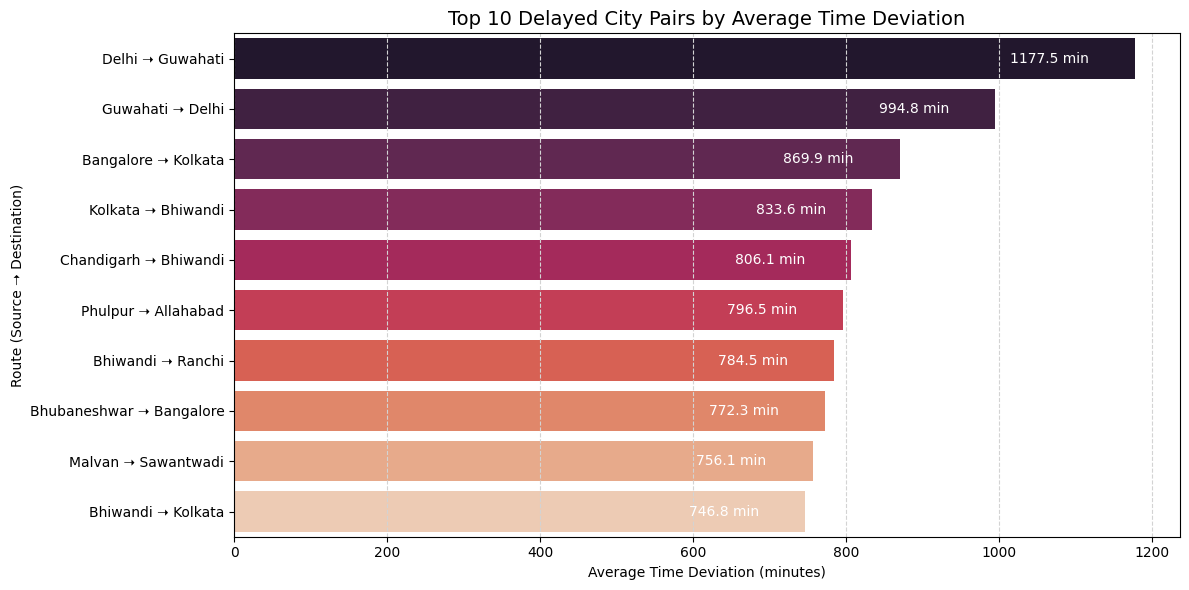

In [55]:
# Group by city pair and calculate delay metrics
delay_stats = df.groupby(['source_city', 'destination_city']).agg({
    'time_deviation': 'mean',
    'trip_duration_minutes': 'mean',
    'trip_uuid': 'count'  # to get number of trips for filter
}).reset_index().rename(columns={'trip_uuid': 'trip_count'})

# Filter for only frequent routes (optional)
delay_stats_filtered = delay_stats[delay_stats['trip_count'] >= 30]

# Get top 10 city pairs with highest average delay
top_delays = delay_stats_filtered.sort_values(by='time_deviation', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_delays,
    x='time_deviation',
    y=top_delays['source_city'] + ' ➝ ' + top_delays['destination_city'],
    palette='rocket'
)

# Add value labels inside the bars
for i, val in enumerate(top_delays['time_deviation']):
    plt.text(val - 60, i, f'{val:.1f} min', va='center', ha='right', color='white', fontsize=10)

# Final plot styling
plt.title('Top 10 Delayed City Pairs by Average Time Deviation', fontsize=14)
plt.xlabel('Average Time Deviation (minutes)')
plt.ylabel('Route (Source ➝ Destination)')
plt.grid(True, axis='x', color='lightgrey', linestyle='--')
plt.tight_layout()
plt.show()

#### **Insights on Top 10 Most Delayed City Pairs**

- **Delhi ➝ Guwahati is the most delayed route overall**  
  - This route shows an **average time deviation of 1177.5 minutes** — the **highest in the entire list**.  
  - The extreme delay may indicate **challenges in route planning, distance coverage**, or **regional operations**.

- **Guwahati ➝ Delhi faces nearly equal delays in return**  
  - The **reverse route averages 994.8 minutes of delay**, also **among the highest across all pairs**.  
  - This suggests **bi-directional inefficiency** likely tied to **regional infrastructure or coordination issues**.

- **Several Bhiwandi-related routes show consistent delays**  
  - **Bhiwandi is part of 3 delayed routes**: to **Kolkata, Chandigarh, and Ranchi**, all with **750+ minutes delay**.  
  - This could point to **recurring warehouse bottlenecks** or **planning inefficiencies at the Bhiwandi hub**.

- **Bangalore ➝ Kolkata and Kolkata ➝ Bhiwandi rank high in delays**  
  - With **deviations above 830 minutes**, these routes show **consistently delayed deliveries**.  
  - This implies potential issues in **cross-regional routing** or **coordination across multiple zones**.

- **Several city pairs in the list are long-distance East-West routes**  
  - Many delayed routes (e.g., **Delhi-Guwahati, Kolkata-Bhiwandi**) span across **major regional distances**.  
  - These may suffer from **inconsistent road quality, inter-state logistics handoffs**, or **long transit idle times**.

The **top 10 most delayed city pairs** are dominated by **long-distance and Bhiwandi-linked routes**, with **Delhi–Guwahati at the top**. These routes require **focused attention to improve inter-regional planning, hub throughput**, and **route-level efficiency**.


#### **2.6.4 Are we experiencing significant delays compared to OSRM benchmarks?**

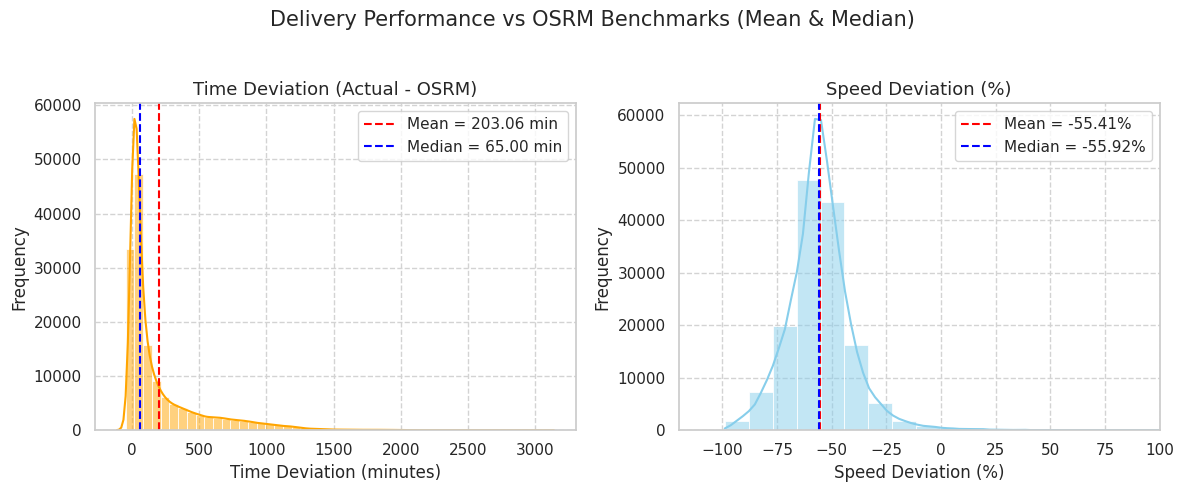

In [56]:
# Set style
sns.set(style="whitegrid")

# Create figure with two subplots
plt.figure(figsize=(12, 5))

# Plot 1: Time Deviation
plt.subplot(1, 2, 1)
sns.histplot(df['time_deviation'], bins=50, kde=True, color='orange')

# Add mean and median lines
mean_time = df['time_deviation'].mean()
median_time = df['time_deviation'].median()
plt.axvline(mean_time, color='red', linestyle='--', label=f"Mean = {mean_time:.2f} min")
plt.axvline(median_time, color='blue', linestyle='--', label=f"Median = {median_time:.2f} min")

plt.title('Time Deviation (Actual - OSRM)', fontsize=13)
plt.xlabel('Time Deviation (minutes)')
plt.ylabel('Frequency')
plt.grid(True, color='lightgrey', linestyle='--')
plt.legend()

# Plot 2: Speed Deviation %
plt.subplot(1, 2, 2)
sns.histplot(df['speed_deviation_percent'], bins=50, kde=True, color='skyblue')

# Add mean and median lines
mean_speed = df['speed_deviation_percent'].mean()
median_speed = df['speed_deviation_percent'].median()
plt.axvline(mean_speed, color='red', linestyle='--', label=f"Mean = {mean_speed:.2f}%")
plt.axvline(median_speed, color='blue', linestyle='--', label=f"Median = {median_speed:.2f}%")

plt.title('Speed Deviation (%)', fontsize=13)
plt.xlabel('Speed Deviation (%)')
plt.ylabel('Frequency')
plt.grid(True, color='lightgrey', linestyle='--')
plt.xlim(-120, 100)  # Adjusted to show negative deviations fully
plt.legend()

# Overall Layout
plt.suptitle('Delivery Performance vs OSRM Benchmarks (Mean & Median)', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### **Insights on Deviation from OSRM Estimates**

- **Most deliveries take longer than OSRM estimates**  
  - The **time deviation plot is right-skewed** with a **heavy concentration near 0** and a **long right tail**.  
  - This clearly shows that a **large number of trips exceed OSRM-predicted times**, often **significantly**.

- **Median delay is much smaller than the average delay**  
  - The **median time deviation is only 65 minutes**, but the **mean is over 203 minutes overall**.  
  - This big gap suggests a **few extremely delayed trips are increasing the average significantly**.

- **Actual speeds are consistently slower than expected**  
  - Both **mean (−55.41%) and median (−55.92%) speed deviations** are **steeply negative values**.  
  - This confirms that **trips are running much slower than OSRM benchmarks** across **most deliveries**.

- **Speed deviation is more balanced and symmetric**  
  - The **speed deviation curve appears roughly bell-shaped** with **fewer extreme outlier points**.  
  - This pattern indicates **slower speeds are consistent across trips**, not driven by **rare cases**.

- **Some trips are faster than OSRM estimates**  
  - A **small portion of trips show speed deviation above 0%**, meaning they were **faster than expected**.  
  - These **rare but positive deviations** suggest **potential optimization routes or favorable conditions**.

**Delivery performance is significantly slower than OSRM expectations**, with **many trips showing large time delays**. The **large difference between median and mean highlights skewness**, and **consistently lower speeds signal broader operational inefficiencies**.


#### **2.6.5 Is there a delay between planning and actual trip start that's hurting performance?**

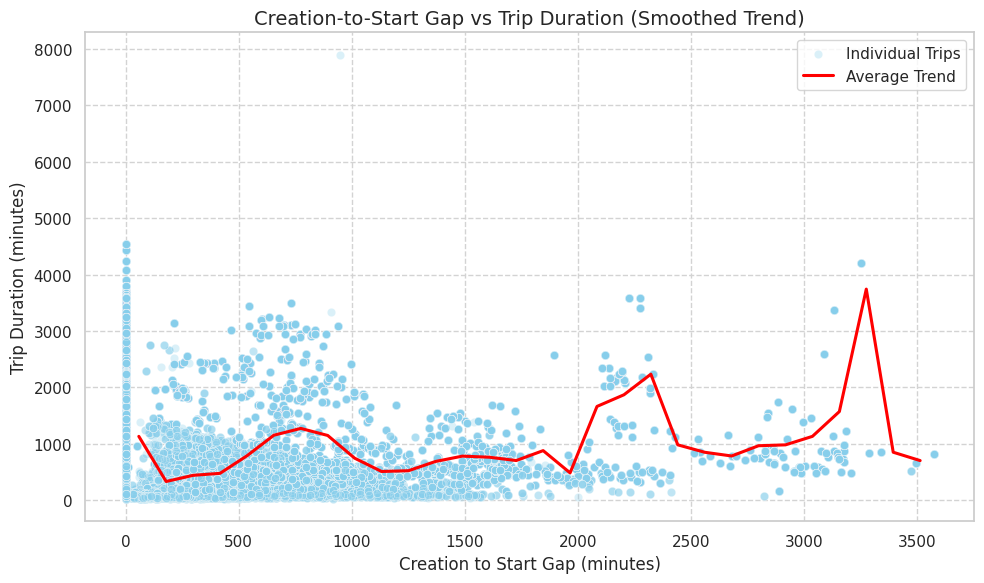

In [57]:
# Set the style
sns.set(style="whitegrid")

# Bin 'creation_to_start_gap' into intervals (e.g., every 30 minutes)
df['gap_bin'] = pd.cut(df['creation_to_start_gap'], bins=30)

# Calculate average trip duration per bin
avg_by_bin = df.groupby('gap_bin')['trip_duration_minutes'].mean().reset_index()

# Convert bin to midpoint for plotting
avg_by_bin['gap_mid'] = avg_by_bin['gap_bin'].apply(lambda x: x.mid)

# Plot
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(
    data=df,
    x='creation_to_start_gap',
    y='trip_duration_minutes',
    alpha=0.3,
    color='skyblue',
    label='Individual Trips'
)

# Smoothed trend line over binned data
sns.lineplot(
    data=avg_by_bin,
    x='gap_mid',
    y='trip_duration_minutes',
    color='red',
    linewidth=2.2,
    label='Average Trend'
)

# Labels and styling
plt.title('Creation-to-Start Gap vs Trip Duration (Smoothed Trend)', fontsize=14)
plt.xlabel('Creation to Start Gap (minutes)', fontsize=12)
plt.ylabel('Trip Duration (minutes)', fontsize=12)
plt.grid(True, color='lightgrey', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

#### **Insights on Trip Duration vs. Planning-to-Start Time Gap**

- **Short creation-to-start gaps usually lead to shorter trips**  
  - The **red trendline shows that lower planning delays (0–200 mins)** correspond to **faster trip completion**.  
  - This suggests **prompt execution after planning** helps avoid **unnecessary delays** in delivery timelines.

- **Longer planning gaps often correlate with longer trip durations**  
  - As the **gap increases, average trip duration also increases**, peaking **sharply around 3000 minutes**.  
  - This indicates that **trips delayed too long before starting** may suffer from **outdated routing or rework**.

- **There's a visible upward trend beyond 1000 minutes**  
  - Between **1000 and 3000 minutes**, the **trendline gradually rises**, indicating **rising inefficiencies**.  
  - These delays may be due to **idle vehicle time, scheduling mismatches**, or **priority reordering**.

- **Trip duration becomes more variable with longer planning gaps**  
  - The **scatterplot points spread out significantly** at higher gap values, showing **less predictability**.  
  - Greater variance here suggests **inconsistent outcomes**, making it **harder to forecast delivery times**.

- **Very high planning gaps often result in extreme delays**  
  - **Outliers around 3000–3500 minutes** show trip durations **jumping to 4000+ or even 8000 minutes**.  
  - These extreme values indicate **operational bottlenecks** that **severely hurt performance** if not managed.

**Larger gaps between trip planning and start time are strongly linked** to **longer and inconsistent trip durations**. **Reducing this gap** can help **minimize delays** and **stabilize overall delivery performance**.


----

## **3. Merging of rows and aggregation of fields**

### **3.1 Merge Rows by trip_uuid to Represent One Trip per Row**

In [58]:
# Handle Missing Values Before Merging (from previous analysis)
df['source_place'].fillna('Other', inplace=True)
df['source_code'].fillna('Unknown_Code', inplace=True)
df['source_state'].fillna('Unknown_State', inplace=True)
df['destination_place'].fillna('Other', inplace=True)
df['destination_code'].fillna('Unknown_Code', inplace=True)
df['destination_state'].fillna('Unknown_State', inplace=True)
df['segment_speed_actual'].fillna(df['segment_speed_actual'].median(), inplace=True)
df['segment_speed_osrm'].fillna(df['segment_speed_osrm'].median(), inplace=True)

# Define aggregation rules for grouping by trip_uuid
agg_dict = {
    'trip_creation_time': 'first',
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'source_center': 'first',
    'source_name': 'first',
    'destination_center': 'last',
    'destination_name': 'last',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'actual_distance_to_destination': 'last',
    'trip_day_of_week': 'first',
    'trip_month': 'first',
    'trip_hour': 'first',
    'is_weekend': 'first',
    'source_city': 'first',
    'source_place': 'first',
    'source_code': 'first',
    'source_state': 'first',
    'destination_city': 'last',
    'destination_place': 'last',
    'destination_code': 'last',
    'destination_state': 'last',
    'is_same_state': 'first',
    'is_same_city': 'first',
    'trip_day_name': 'first',
    'gap_bin': 'first'
}

# Perform the aggregation to get one row per trip_uuid
df_agg = df.groupby('trip_uuid').agg(agg_dict).reset_index()

# Integrity check to confirm one row per trip
assert df_agg['trip_uuid'].is_unique, "Error: trip_uuid not unique after aggregation!"

# Preview the trip-level aggregated dataset
df_agg.head()

trip_uuid         trip_creation_time  \
0  trip-153671041653548748 2018-09-12 00:00:16.535741   
1  trip-153671042288605164 2018-09-12 00:00:22.886430   
2  trip-153671043369099517 2018-09-12 00:00:33.691250   
3  trip-153671046011330457 2018-09-12 00:01:00.113710   
4  trip-153671052974046625 2018-09-12 00:02:09.740725   

                                 route_schedule_uuid route_type source_center  \
0  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL  IND462022AAA   
1  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting  IND572101AAA   
2  thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...        FTL  IND562132AAA   
3  thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...    Carting  IND400072AAB   
4  thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...        FTL  IND583101AAA   

                          source_name destination_center  \
0  Bhopal_Trnsport_H (Madhya Pradesh)       IND000000ACB   
1       Tumkur_Veersagr_I (Karnataka)       IND562101AAA   
2    Bangalore_Nelmngla_H (Karnataka)       IND160002AAC   
3            Mumbai Hub (Maharashtra)       IND401104AAA   
4              Bellary_Dc (Karnataka)       IND583101AAA   

                    destination_name              od_start_time  \
0      Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 00:00:16.535741   
1  Chikblapur_ShntiSgr_D (Karnataka) 2018-09-12 00:00:22.886430   
2     Chandigarh_Mehmdpur_H (Punjab) 2018-09-12 00:00:33.691250   
3     Mumbai_MiraRd_IP (Maharashtra) 2018-09-12 00:01:00.113710   
4             Bellary_Dc (Karnataka) 2018-09-12 00:02:09.740725   

                 od_end_time  actual_distance_to_destination  \
0 2018-09-13 13:40:23.123744                      383.759164   
1 2018-09-12 03:01:59.598855                       24.644021   
2 2018-09-14 17:34:55.442454                      237.439610   
3 2018-09-12 01:41:29.809822                       17.175274   
4 2018-09-12 12:00:30.683231                       41.317614   

   trip_day_of_week  trip_month  trip_hour  is_weekend  \
0                 2           9          0           0   
1                 2           9          0           0   
2                 2           9          0           0   
3                 2           9          0           0   
4                 2           9          0           0   

                source_city    source_place   source_code    source_state  \
0                    Bhopal        Trnsport             H  Madhya Pradesh   
1                    Tumkur        Veersagr             I       Karnataka   
2                 Bangalore        Nelmngla             H       Karnataka   
3  Mumbai Hub (Maharashtra)           Other  Unknown_Code     Maharashtra   
4                   Bellary  Dc (Karnataka)  Unknown_Code       Karnataka   

  destination_city destination_place destination_code destination_state  \
0          Gurgaon          Bilaspur               HB           Haryana   
1       Chikblapur          ShntiSgr                D         Karnataka   
2       Chandigarh          Mehmdpur                H            Punjab   
3           Mumbai            MiraRd               IP       Maharashtra   
4          Bellary    Dc (Karnataka)     Unknown_Code         Karnataka   

   is_same_state  is_same_city trip_day_name            gap_bin  
0              0             0     Wednesday  (-3.575, 119.167]  
1              1             0     Wednesday  (-3.575, 119.167]  
2              0             0     Wednesday  (-3.575, 119.167]  
3              1             0     Wednesday  (-3.575, 119.167]  
4              1             0     Wednesday  (-3.575, 119.167]

### **3.2 Aggregate Segment-Level Time and Distance Metrics**

In [59]:
# Aggregate segment-level fields by trip_uuid using optimized logic
df_sum = df.groupby('trip_uuid').agg({
    'start_scan_to_end_scan': 'sum',                     # Total scan duration
    'trip_duration_minutes': 'median',                   # Median duration across segments
    'creation_to_start_gap': 'mean',                     # Avg. gap from trip creation to dispatch
    'avg_speed_actual': 'mean',                          # Trip-level actual speed
    'avg_speed_osrm': 'mean',                            # Trip-level OSRM speed
    'segment_speed_actual': 'mean',                      # Avg. segment-level actual speed
    'segment_speed_osrm': 'mean',                        # Avg. segment-level OSRM speed
    'time_deviation': 'sum',                             # Total deviation in actual vs OSRM time
    'distance_deviation': 'sum',                         # Total deviation in actual vs OSRM distance
    'speed_deviation_percent': 'mean',                   # Avg. percent deviation
    'segment_delay': 'sum',                              # Cumulative delays from all segments
    'osrm_distance': 'sum',                              # Needed for distance efficiency ratio
    'segment_osrm_distance': 'sum',                      # Segment-level reference distance
    'actual_distance_to_destination': 'last',            # Final actual distance (end of route)
    'segment_osrm_time': 'sum',                          # if using in later efficiency ratio
    'actual_time': 'sum',                                # Total actual time across all segments
    'segment_actual_time': 'sum',                        # Total segment-level actual time
    'osrm_time': 'sum',                                  # Total OSRM-estimated trip time across segments

}).reset_index()

# Preview the aggregated DataFrame
df_sum.head()

trip_uuid  start_scan_to_end_scan  trip_duration_minutes  \
0  trip-153671041653548748                 43659.0             999.505379   
1  trip-153671042288605164                   906.0             122.779486   
2  trip-153671043369099517                248631.0            3099.723591   
3  trip-153671046011330457                   200.0             100.494935   
4  trip-153671052974046625                  1586.0             152.012914   

   creation_to_start_gap  avg_speed_actual  avg_speed_osrm  \
0             461.310175         35.680717       81.106537   
1              40.926495         37.689921       75.640646   
2             417.940260         37.039417       80.483111   
3               0.000000         23.543243       79.251667   
4             109.876898         28.087062       77.009323   

   segment_speed_actual  segment_speed_osrm  time_deviation  \
0             59.126546           82.748223          7895.0   
1             38.412231           79.323519           189.0   
2             53.197813           82.192766         46457.0   
3             22.200699           73.787810            58.0   
4             26.608643           77.363147           349.0   

   distance_deviation  speed_deviation_percent  segment_delay  osrm_distance  \
0        -1716.952595               -55.651818          540.0     10577.7647   
1          -29.222494               -50.110918           76.0       269.4308   
2       -21283.746562               -53.978104         1367.0     89447.2488   
3           -3.117852               -70.343168           43.0        31.6475   
4          -27.284096               -63.066590          225.0       266.2914   

   segment_osrm_distance  actual_distance_to_destination  segment_osrm_time  \
0              1320.4733                      383.759164             1008.0   
1                84.1894                       24.644021               65.0   
2              2545.2678                      237.439610             1941.0   
3                19.8766                       17.175274               16.0   
4               146.7919                       41.317614              115.0   

   actual_time  segment_actual_time  osrm_time  
0      15682.0               1548.0     7787.0  
1        399.0                141.0      210.0  
2     112225.0               3308.0    65768.0  
3         82.0                 59.0       24.0  
4        556.0                340.0      207.0

### **3.3 Merge Aggregated Data into Final Trip-Level Dataset**

In [60]:
# Merge df_agg (trip-level info) with df_sum (aggregated segment metrics)
df_final = df_agg.merge(df_sum, on='trip_uuid', how='inner')

# Validate the merged result
assert df_final['trip_uuid'].is_unique, "Warning: trip_uuid not unique after merging!"

# Preview the final aggregated trip-level dataset
df_final.head()

trip_uuid         trip_creation_time  \
0  trip-153671041653548748 2018-09-12 00:00:16.535741   
1  trip-153671042288605164 2018-09-12 00:00:22.886430   
2  trip-153671043369099517 2018-09-12 00:00:33.691250   
3  trip-153671046011330457 2018-09-12 00:01:00.113710   
4  trip-153671052974046625 2018-09-12 00:02:09.740725   

                                 route_schedule_uuid route_type source_center  \
0  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL  IND462022AAA   
1  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting  IND572101AAA   
2  thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...        FTL  IND562132AAA   
3  thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...    Carting  IND400072AAB   
4  thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...        FTL  IND583101AAA   

                          source_name destination_center  \
0  Bhopal_Trnsport_H (Madhya Pradesh)       IND000000ACB   
1       Tumkur_Veersagr_I (Karnataka)       IND562101AAA   
2    Bangalore_Nelmngla_H (Karnataka)       IND160002AAC   
3            Mumbai Hub (Maharashtra)       IND401104AAA   
4              Bellary_Dc (Karnataka)       IND583101AAA   

                    destination_name              od_start_time  \
0      Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 00:00:16.535741   
1  Chikblapur_ShntiSgr_D (Karnataka) 2018-09-12 00:00:22.886430   
2     Chandigarh_Mehmdpur_H (Punjab) 2018-09-12 00:00:33.691250   
3     Mumbai_MiraRd_IP (Maharashtra) 2018-09-12 00:01:00.113710   
4             Bellary_Dc (Karnataka) 2018-09-12 00:02:09.740725   

                 od_end_time  actual_distance_to_destination_x  \
0 2018-09-13 13:40:23.123744                        383.759164   
1 2018-09-12 03:01:59.598855                         24.644021   
2 2018-09-14 17:34:55.442454                        237.439610   
3 2018-09-12 01:41:29.809822                         17.175274   
4 2018-09-12 12:00:30.683231                         41.317614   

   trip_day_of_week  trip_month  trip_hour  is_weekend  \
0                 2           9          0           0   
1                 2           9          0           0   
2                 2           9          0           0   
3                 2           9          0           0   
4                 2           9          0           0   

                source_city    source_place   source_code    source_state  \
0                    Bhopal        Trnsport             H  Madhya Pradesh   
1                    Tumkur        Veersagr             I       Karnataka   
2                 Bangalore        Nelmngla             H       Karnataka   
3  Mumbai Hub (Maharashtra)           Other  Unknown_Code     Maharashtra   
4                   Bellary  Dc (Karnataka)  Unknown_Code       Karnataka   

  destination_city destination_place destination_code destination_state  \
0          Gurgaon          Bilaspur               HB           Haryana   
1       Chikblapur          ShntiSgr                D         Karnataka   
2       Chandigarh          Mehmdpur                H            Punjab   
3           Mumbai            MiraRd               IP       Maharashtra   
4          Bellary    Dc (Karnataka)     Unknown_Code         Karnataka   

   is_same_state  is_same_city trip_day_name            gap_bin  \
0              0             0     Wednesday  (-3.575, 119.167]   
1              1             0     Wednesday  (-3.575, 119.167]   
2              0             0     Wednesday  (-3.575, 119.167]   
3              1             0     Wednesday  (-3.575, 119.167]   
4              1             0     Wednesday  (-3.575, 119.167]   

   start_scan_to_end_scan  trip_duration_minutes  creation_to_start_gap  \
0                 43659.0             999.505379             461.310175   
1                   906.0             122.779486              40.926495   
2                248631.0            3099.723591             417.940260   
3                   200.0             100.494935            

### **3.4 Add Time-Based Columns from Creation Time**

In [61]:
# Extract time-based features for temporal analysis
df_final['creation_day'] = df_final['trip_creation_time'].dt.day                   # Day of the month
df_final['creation_weekday'] = df_final['trip_creation_time'].dt.day_name()       # Day of the week (e.g., Monday)
df_final['creation_hour'] = df_final['trip_creation_time'].dt.hour                # Hour of the day (0–23)

# Extract month and year
df_final['creation_month'] = df_final['trip_creation_time'].dt.month
df_final['creation_year'] = df_final['trip_creation_time'].dt.year

# Preview the new time-based columns for verification
df_final[['trip_creation_time', 'creation_year', 'creation_month', 'creation_day', 'creation_weekday', 'creation_hour']].head()

trip_creation_time  creation_year  creation_month  creation_day  \
0 2018-09-12 00:00:16.535741           2018               9            12   
1 2018-09-12 00:00:22.886430           2018               9            12   
2 2018-09-12 00:00:33.691250           2018               9            12   
3 2018-09-12 00:01:00.113710           2018               9            12   
4 2018-09-12 00:02:09.740725           2018               9            12   

  creation_weekday  creation_hour  
0        Wednesday              0  
1        Wednesday              0  
2        Wednesday              0  
3        Wednesday              0  
4        Wednesday              0

### **3.5 Final Outcome**

In [62]:
# Display the first five rows for review
df_final.head()

trip_uuid         trip_creation_time  \
0  trip-153671041653548748 2018-09-12 00:00:16.535741   
1  trip-153671042288605164 2018-09-12 00:00:22.886430   
2  trip-153671043369099517 2018-09-12 00:00:33.691250   
3  trip-153671046011330457 2018-09-12 00:01:00.113710   
4  trip-153671052974046625 2018-09-12 00:02:09.740725   

                                 route_schedule_uuid route_type source_center  \
0  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL  IND462022AAA   
1  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting  IND572101AAA   
2  thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...        FTL  IND562132AAA   
3  thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...    Carting  IND400072AAB   
4  thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...        FTL  IND583101AAA   

                          source_name destination_center  \
0  Bhopal_Trnsport_H (Madhya Pradesh)       IND000000ACB   
1       Tumkur_Veersagr_I (Karnataka)       IND562101AAA   
2    Bangalore_Nelmngla_H (Karnataka)       IND160002AAC   
3            Mumbai Hub (Maharashtra)       IND401104AAA   
4              Bellary_Dc (Karnataka)       IND583101AAA   

                    destination_name              od_start_time  \
0      Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 00:00:16.535741   
1  Chikblapur_ShntiSgr_D (Karnataka) 2018-09-12 00:00:22.886430   
2     Chandigarh_Mehmdpur_H (Punjab) 2018-09-12 00:00:33.691250   
3     Mumbai_MiraRd_IP (Maharashtra) 2018-09-12 00:01:00.113710   
4             Bellary_Dc (Karnataka) 2018-09-12 00:02:09.740725   

                 od_end_time  actual_distance_to_destination_x  \
0 2018-09-13 13:40:23.123744                        383.759164   
1 2018-09-12 03:01:59.598855                         24.644021   
2 2018-09-14 17:34:55.442454                        237.439610   
3 2018-09-12 01:41:29.809822                         17.175274   
4 2018-09-12 12:00:30.683231                         41.317614   

   trip_day_of_week  trip_month  trip_hour  is_weekend  \
0                 2           9          0           0   
1                 2           9          0           0   
2                 2           9          0           0   
3                 2           9          0           0   
4                 2           9          0           0   

                source_city    source_place   source_code    source_state  \
0                    Bhopal        Trnsport             H  Madhya Pradesh   
1                    Tumkur        Veersagr             I       Karnataka   
2                 Bangalore        Nelmngla             H       Karnataka   
3  Mumbai Hub (Maharashtra)           Other  Unknown_Code     Maharashtra   
4                   Bellary  Dc (Karnataka)  Unknown_Code       Karnataka   

  destination_city destination_place destination_code destination_state  \
0          Gurgaon          Bilaspur               HB           Haryana   
1       Chikblapur          ShntiSgr                D         Karnataka   
2       Chandigarh          Mehmdpur                H            Punjab   
3           Mumbai            MiraRd               IP       Maharashtra   
4          Bellary    Dc (Karnataka)     Unknown_Code         Karnataka   

   is_same_state  is_same_city trip_day_name            gap_bin  \
0              0             0     Wednesday  (-3.575, 119.167]   
1              1             0     Wednesday  (-3.575, 119.167]   
2              0             0     Wednesday  (-3.575, 119.167]   
3              1             0     Wednesday  (-3.575, 119.167]   
4              1             0     Wednesday  (-3.575, 119.167]   

   start_scan_to_end_scan  trip_duration_minutes  creation_to_start_gap  \
0                 43659.0             999.505379             461.310175   
1                   906.0             122.779486              40.926495   
2                248631.0            3099.723591             417.940260   
3                   200.0             100.494935            

### **3.6 Data Visualization**

#### **3.6.1 Which top 10 source cities contribute the most to total segment-level delays across all trips?**

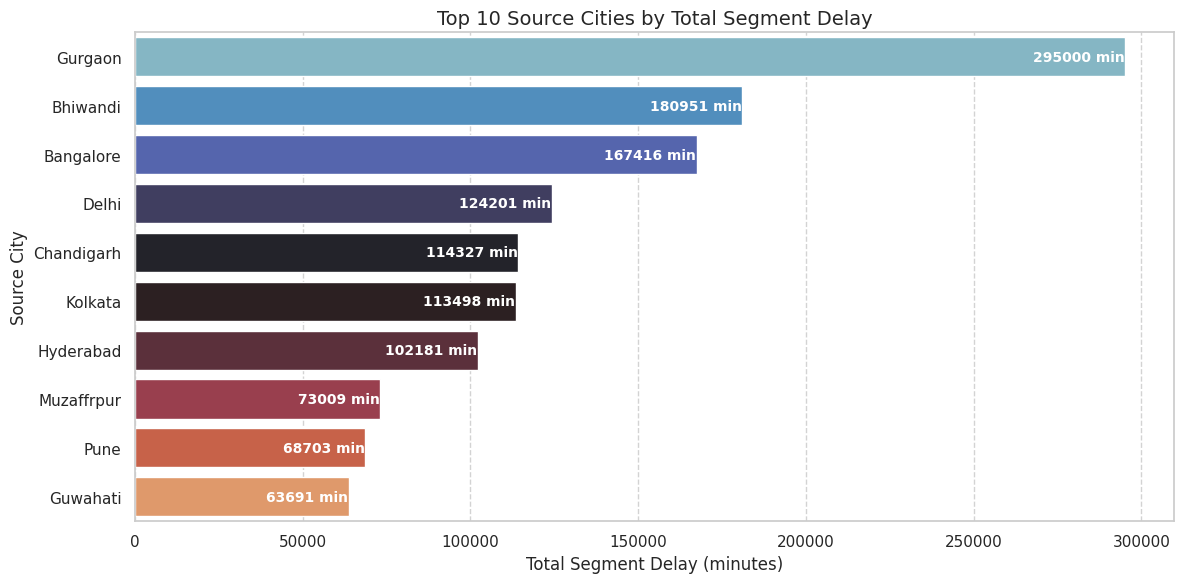

In [63]:
# Group by source city and calculate total segment delay, then get top 10 cities
top_delay_cities = df_final.groupby('source_city')['segment_delay'].sum().sort_values(ascending=False).head(10)

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_delay_cities.values, y=top_delay_cities.index, palette='icefire')

# Add delay value labels inside each bar
for i, val in enumerate(top_delay_cities.values):
    plt.text(val - 50, i, f'{val:.0f} min', va='center', ha='right', color='white', fontsize=10, fontweight='bold')

# Set titles and labels
plt.title('Top 10 Source Cities by Total Segment Delay', fontsize=14)
plt.xlabel('Total Segment Delay (minutes)')
plt.ylabel('Source City')

# Add horizontal grid lines for readability
plt.grid(True, axis='x', color='lightgrey', linestyle='--')
plt.tight_layout()

# Display the final plot
plt.show()

#### **Insights on Total Segment-Level Delay by Source City**

- **Gurgaon contributes the most to segment-level delays**  
  - With a **massive 295,000 minutes** of total segment delay, it **leads all other cities by a wide margin**.  
  - This may reflect **high volume of dispatches, route congestion**, or **systemic local inefficiencies**.

- **Bhiwandi and Bangalore follow as key delay contributors**  
  - **Bhiwandi (180,951 min)** and **Bangalore (167,416 min)** have the **second and third highest delays respectively**.  
  - These hubs likely **handle a large number of shipments**, increasing the **risk of cumulative slowdowns**.

- **Delhi, Chandigarh, and Kolkata also show substantial delays**  
  - Each of these cities reports **over 110,000 minutes of total segment delay** across all trips.  
  - This indicates that **delays are not isolated** but **spread across key metro zones** in the network.

- **Southern and eastern hubs like Hyderabad and Muzaffarpur appear**  
  - **Hyderabad reports over 100,000 minutes**, while **Muzaffarpur contributes over 73,000 minutes** of delay.  
  - Their inclusion highlights **regional performance bottlenecks** beyond just high-volume cities.

- **Even Guwahati and Pune, with lower volumes, show notable delays**  
  - **Guwahati and Pune contribute 63,691 and 68,703 minutes respectively** — still significant.  
  - This suggests that **smaller or mid-tier cities also face routing or scheduling inefficiencies**.

**Segment-level delays are heavily concentrated** in cities like **Gurgaon, Bhiwandi, and Bangalore**, reflecting both **volume and inefficiency**. These **high-delay hubs need focused process improvement**, especially in **planning, routing**, and **throughput capacity**.

#### **3.6.2 Are trips with high start_scan_to_end_scan also showing longer trip_duration_minutes?**

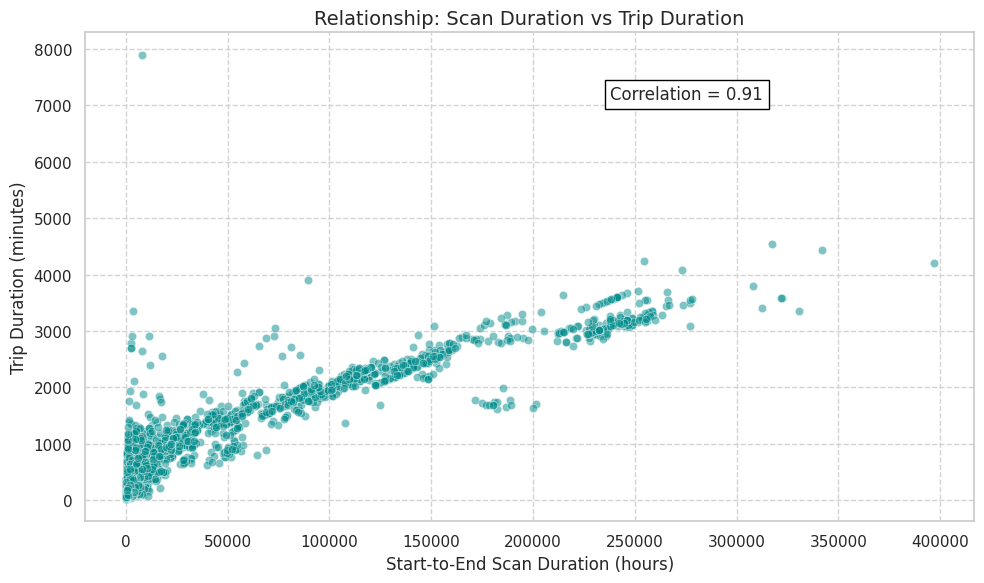

In [64]:
# Calculate correlation
correlation = df_final['start_scan_to_end_scan'].corr(df_final['trip_duration_minutes'])

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_final,
    x='start_scan_to_end_scan',
    y='trip_duration_minutes',
    color='darkcyan',
    alpha=0.5
)

# Add correlation value as a text box on the plot
plt.text(
    x=df_final['start_scan_to_end_scan'].max()*0.6,
    y=df_final['trip_duration_minutes'].max()*0.9,
    s=f'Correlation = {correlation:.2f}',
    fontsize=12,
    bbox=dict(facecolor='white', edgecolor='black')
)

# Title and axis labels
plt.title('Relationship: Scan Duration vs Trip Duration', fontsize=14)
plt.xlabel('Start-to-End Scan Duration (hours)', fontsize=12)
plt.ylabel('Trip Duration (minutes)', fontsize=12)

# Grid and layout
plt.grid(True, color='lightgrey', linestyle='--')
plt.tight_layout()
plt.show()

#### **Insights on Correlation Between Scan Duration and Trip Duration**

- **There is a strong positive correlation between scan and trip duration**  
  - A **correlation value of 0.91** indicates a **very strong relationship** between scan time and trip duration.  
  - This suggests that the **longer it takes from first to last scan**, the **longer the overall trip typically lasts**.

- **Trips with higher scan durations usually take longer to complete**  
  - The **scatterplot shows an upward trend**: as scan duration increases, so does trip duration.  
  - This implies **scan delays may reflect broader delivery delays** or **operational inefficiencies**.

- **Most points follow a linear growth pattern**  
  - A majority of trips **cluster closely along a diagonal line**, showing **consistency in the delay trend**.  
  - This **uniform spread confirms** that the relationship between scan and trip duration **holds for many routes**.

- **Outliers are visible but don’t distort the overall pattern**  
  - A few points **deviate significantly**, with **unusually high trip durations for moderate scan times**.  
  - These could be **special cases** caused by **re-routing, exceptions**, or **long idle times at hubs**.

- **Scan process efficiency directly impacts overall delivery performance**  
  - The **close link between scan and trip durations** suggests that **any scan-related delay carries over**.  
  - **Improving scan-to-scan processing time** could result in **significantly faster end-to-end deliveries**.

**Trips with high scan durations strongly correlate with longer trip durations (correlation = 0.91)**. **Optimizing scan-related steps** may directly **reduce overall delivery time** and **improve operational efficiency**.

#### **3.6.3 Which route_type (e.g., FTL, Carting) has the highest average time_deviation from OSRM estimates?**

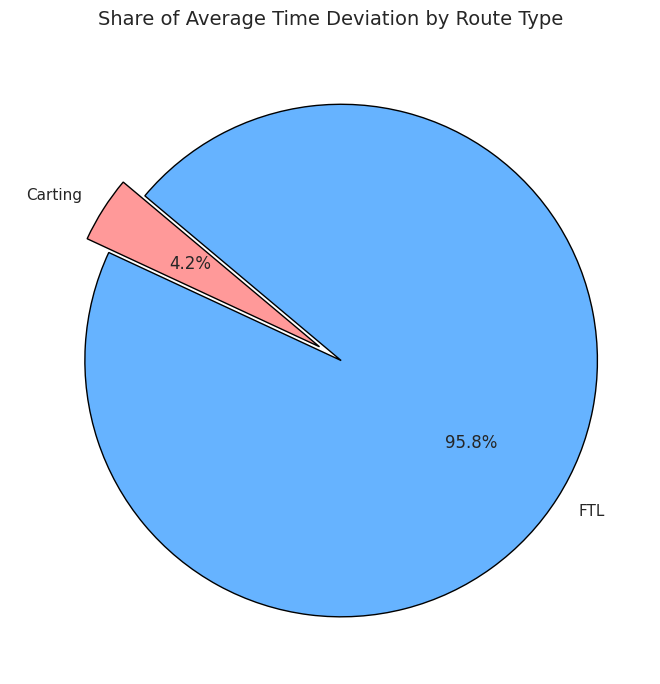

In [65]:
# Group by route_type and calculate average time deviation
avg_deviation_by_route = df_final.groupby('route_type')['time_deviation'].mean()

# Plot a pie chart
plt.figure(figsize=(7, 7))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  # Custom palette for clarity
explode = [0.05] * len(avg_deviation_by_route)     # Slight explosion for all slices

plt.pie(avg_deviation_by_route,
        labels=avg_deviation_by_route.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=explode,
        wedgeprops={'edgecolor': 'black'})

# Add title and layout
plt.title('Share of Average Time Deviation by Route Type', fontsize=14)
plt.tight_layout()
plt.show()

#### **Insights on Average Time Deviation by Route Type**

- **FTL trips contribute to the vast majority of total average time deviation**  
  - **FTL accounts for 95.8%** of the deviation from OSRM estimates across all route types.  
  - This suggests that **FTL routes may carry the highest volume** or experience the **most consistent inefficiencies**.

- **Carting trips account for only a small fraction of delays**  
  - Despite being a separate route type, **Carting contributes just 4.2%** of total average deviation.  
  - This may indicate that **Carting is either more predictable** or operates on **shorter routes with fewer risks**.

- **FTL delay dominance may be linked to trip characteristics**  
  - FTL routes often **span longer distances and carry heavier loads**, which **increases exposure to delays**.  
  - These conditions make **FTL operations more susceptible** to **route planning mismatches and road issues**.

- **The pie chart visually reinforces the imbalance in delay sources**  
  - The **large FTL slice and tiny Carting slice** make the contrast in contribution **easy to interpret**.  
  - This clarity helps **prioritize which route types need more focus** for improving **time adherence**.

- **The current delay distribution highlights optimization potential in FTL**  
  - Since **FTL dominates time deviations**, even **small improvements here could yield major efficiency gains**.  
  - Businesses can start by **auditing FTL legs with high variance** and building **better route buffers**.

**FTL route types have the highest average time deviation**, contributing **95.8% of the total**. This indicates a **clear opportunity to reduce delivery inefficiencies** by targeting **FTL process and route optimizations**.

#### **3.6.4 What percentage of trips have negative speed_deviation_percent (i.e., slower than expected)?**

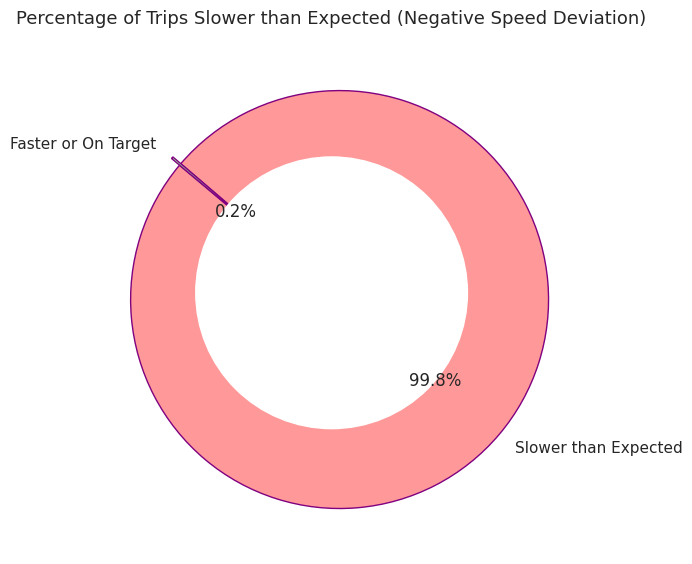

In [66]:
# Create label for negative speed deviation
df_final['is_negative_speed_deviation'] = df_final['speed_deviation_percent'] < 0

# Count how many are slower vs. on-target/faster
counts = df_final['is_negative_speed_deviation'].value_counts()
labels = ['Slower than Expected', 'Faster or On Target']
sizes = [counts[True], counts[False]]
colors = ['#ff9999', '#99ff99']
explode = [0.05, 0]

# Donut chart (pie with a white center)
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'purple'}
)

# Draw white circle in the center to make it a donut
centre_circle = plt.Circle((0, 0), 0.65, fc='white')
plt.gca().add_artist(centre_circle)

# Add title and layout
plt.title('Percentage of Trips Slower than Expected (Negative Speed Deviation)', fontsize=13)
plt.tight_layout()
plt.show()

#### **Insights on Percentage of Trips with Negative Speed Deviation**

- **Nearly all trips are slower than expected OSRM benchmarks**  
  - A striking **99.8% of trips had negative speed deviation**, meaning they **fell below expected speeds**.  
  - This clearly indicates that the **planned vs. actual trip execution gap is widespread and systemic**.

- **Faster or on-time trips are extremely rare**  
  - Only **0.2% of trips managed to meet or exceed OSRM speed expectations**.  
  - This suggests that either the **OSRM estimates are overly optimistic** or **field conditions are consistently poor**.

- **The donut chart strongly emphasizes the imbalance**  
  - The **tiny green wedge and dominant red segment** visually highlight the **one-sided trend**.  
  - This aids in **quick stakeholder understanding** of where **improvement efforts must focus**.

- **The high percentage of slower trips may signal process or route planning flaws**  
  - Inefficiencies in **dispatch timing, traffic forecasting, or stop handling** may be inflating trip durations.  
  - It could also reflect a **mismatch between real-world conditions and OSRM model assumptions**.

- **Quantifying deviation helps prioritize operational fixes**  
  - With **99.8% of trips underperforming**, there's a need to **audit key delay drivers across geographies**.  
  - **Regular monitoring** of this metric can act as an **early warning system** for **route or process breakdowns**.

**99.8% of trips are slower than expected**, confirming that **negative speed deviation is the norm**. This insight calls for **immediate action in route planning, vehicle allocation**, and **delay mitigation strategies**.

#### **3.6.5 Which top 10 source-destination state pairs have the highest average delay between trip creation and actual dispatch?**

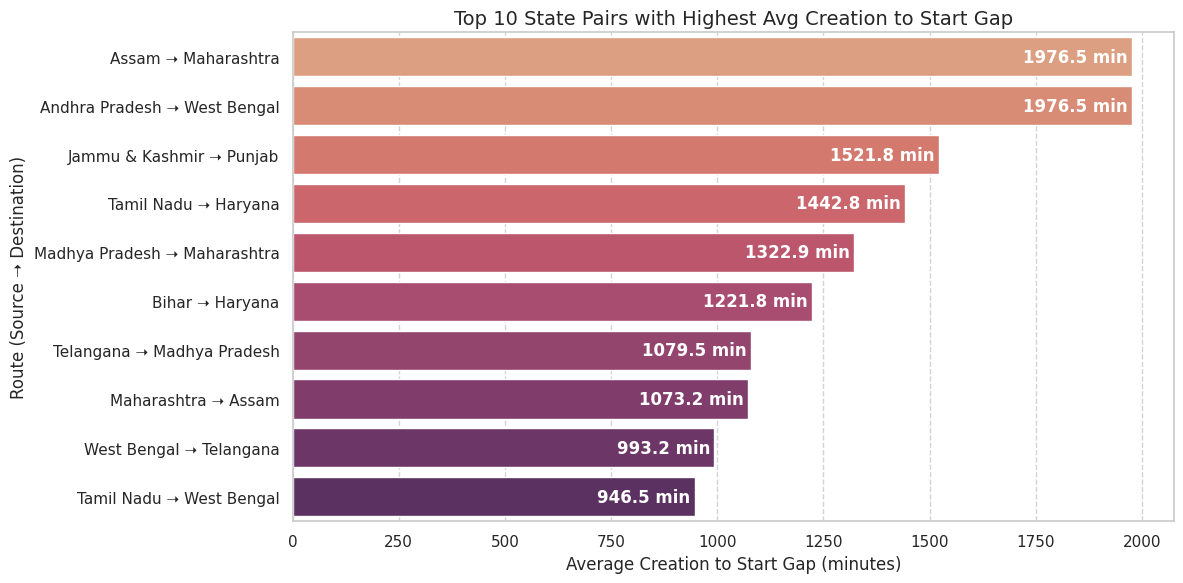

In [67]:
# Group by state pair and calculate average gap
gap_by_state_pair = df_final.groupby(
    ['source_state', 'destination_state']
)['creation_to_start_gap'].mean().reset_index()

# Sort and get top 10
top_gap_pairs = gap_by_state_pair.sort_values(by='creation_to_start_gap', ascending=False).head(10)

# Create label for each route
top_gap_pairs['state_pair'] = top_gap_pairs['source_state'] + ' ➝ ' + top_gap_pairs['destination_state']

# Plot
plt.figure(figsize=(12, 6))
bar = sns.barplot(
    x='creation_to_start_gap',
    y='state_pair',
    data=top_gap_pairs,
    palette='flare'
)

# Add value inside each bar
for i, val in enumerate(top_gap_pairs['creation_to_start_gap']):
    plt.text(val - 10, i, f'{val:.1f} min', va='center', ha='right', color='white', fontweight='bold')

# Formatting
plt.title('Top 10 State Pairs with Highest Avg Creation to Start Gap', fontsize=14)
plt.xlabel('Average Creation to Start Gap (minutes)')
plt.ylabel('Route (Source ➝ Destination)')
plt.grid(True, axis='x', linestyle='--', color='lightgrey')
plt.tight_layout()
plt.show()

#### **Insights on Average Planning-to-Dispatch Delay by State Pair**

- **Assam ➝ Maharashtra and Andhra Pradesh ➝ West Bengal show the largest delays**  
  - Both routes share the **highest average delay of 1976.5 minutes**, indicating **major operational lag**.  
  - This **long planning-to-dispatch gap** can severely affect **overall trip efficiency and responsiveness**.

- **Routes involving remote or cross-zonal regions show larger planning gaps**  
  - Examples like **Jammu & Kashmir ➝ Punjab** and **Tamil Nadu ➝ Haryana** reflect **complex routing or approvals**.  
  - These gaps could arise from **inter-state coordination delays** or **low-priority dispatching**.

- **Southern to Northern or Central zones tend to experience long wait periods**  
  - Routes like **Tamil Nadu ➝ Haryana** and **Madhya Pradesh ➝ Maharashtra** show **1300–1400+ minutes delay**.  
  - This may indicate **inefficiencies in coordination across warehouse regions** and **fleet allocation timing**.

- **Even high-volume routes like Bihar ➝ Haryana show 1200+ minutes average delay**  
  - Despite their relevance, these routes still reflect **significant bottlenecks in execution readiness**.  
  - This implies that **volume alone does not ensure better operational timelines** or **dispatch processes**.

- **Average delay remains above 900 minutes across all top 10 pairs**  
  - The fact that even the **lowest among the top 10 (Tamil Nadu ➝ West Bengal)** has **946.5 min delay** is telling.  
  - This reflects a **widespread pattern of inefficiency** across **diverse geographies** and not **isolated exceptions**.

**Multiple state pairs show excessively high average creation-to-start delays**, some nearing **33 hours**. This indicates a **broader issue with dispatch planning**, possibly due to **cross-zone logistics or scheduling inefficiencies**.

#### **3.6.6 How does the distance efficiency ratio (actual vs OSRM) vary across route_type and destination_state?**

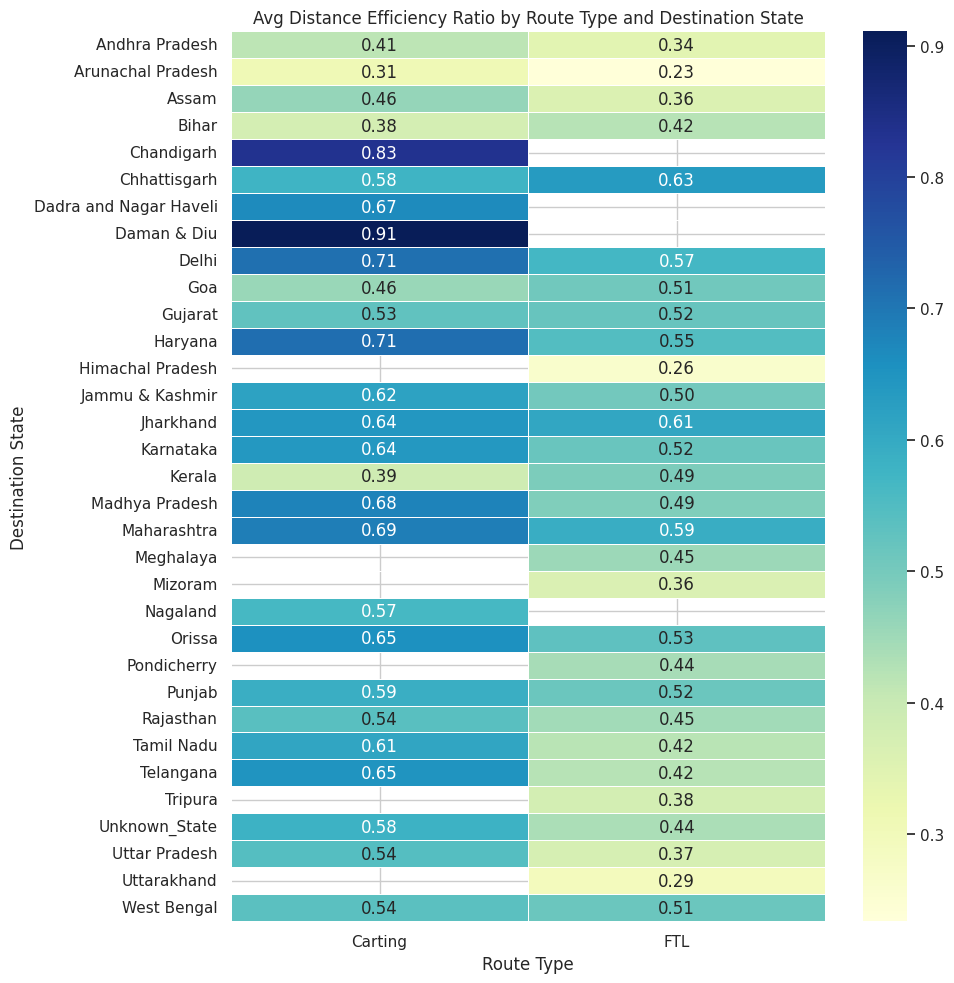

In [68]:
# Filter out any zero values to avoid division error
df_final = df_final[df_final['segment_osrm_distance'] != 0]

# Calculate the efficiency ratio (Actual Distance / OSRM Distance)
df_final['efficiency_ratio_distance'] = (
    df_final['actual_distance_to_destination_y'] / df_final['segment_osrm_distance']
)

# Create pivot table grouped by route_type and destination_state
pivot_efficiency = df_final.pivot_table(
    index='destination_state',
    columns='route_type',
    values='efficiency_ratio_distance',
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_efficiency, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Avg Distance Efficiency Ratio by Route Type and Destination State')
plt.xlabel('Route Type')
plt.ylabel('Destination State')
plt.tight_layout()
plt.show()

#### **Insights on Routing Efficiency (Actual Distance / OSRM Distance) by Route Type and State**

- **Carting routes tend to be more efficient than FTL across most states**  
  - States like **Delhi, Haryana, Maharashtra, and Punjab** show **notably higher distance ratios for Carting (0.65+)**.  
  - In contrast, **FTL values are consistently lower**, often falling **below 0.5**, suggesting **route inefficiencies**.

- **Daman & Diu and Chandigarh show very high Carting efficiency**  
  - **Daman & Diu shows an outstanding 0.91 ratio**, while **Chandigarh reaches 0.83** — both indicating **routes closely follow OSRM**.  
  - This could be due to **shorter urban deliveries** or **better routing precision in these union territories**.

- **States like Himachal Pradesh and Uttarakhand perform poorly under FTL**  
  - **Himachal Pradesh has an extremely low FTL ratio (~0.26)**, and **Uttarakhand is similarly low at 0.29**.  
  - These states may suffer from **poor route alignment due to hilly terrain** or **planning limitations**.

- **Consistency is stronger in Carting; FTL shows wider variability**  
  - **Carting ratios are generally stable across regions (mostly in 0.5–0.7 range)**, implying **standardized local operations**.  
  - **FTL ratios fluctuate significantly** — some as low as **0.23**, highlighting possible **long-route inefficiencies**.

- **Northeastern and eastern states display poor FTL efficiency**  
  - States like **Arunachal Pradesh (0.23), Assam (0.36), and Mizoram (0.36)** have some of the **lowest FTL efficiency**.  
  - This reflects **challenges in long-haul routing** in **remote or underconnected regions**.

This heatmap successfully shows how **routing efficiency varies by state and route type**. **FTL deliveries are consistently less efficient than Carting**, with large variations especially in **hilly and northeastern states** — suggesting a need for **better long-route planning in those areas**.

---

## **4. Comparison & Visualization of time and distance fields**

### **4.1 Compare trip_duration_minutes and start_scan_to_end_scan to evaluate consistency between trip duration and scan duration**

We aim to compare whether the actual trip duration (`trip_duration_minutes`) is statistically similar to the scan-based duration (`start_scan_to_end_scan`) using visual analysis and a paired t-test.

**Hypothesis for Paired t-test:**

- **H₀ (Null Hypothesis):** There is no significant difference between trip duration and scan duration.
- **H₁ (Alternative Hypothesis):** There is a significant difference between trip duration and scan duration.


#### **Step 1: Plot a Scatterplot to Visualize Their Relationship**

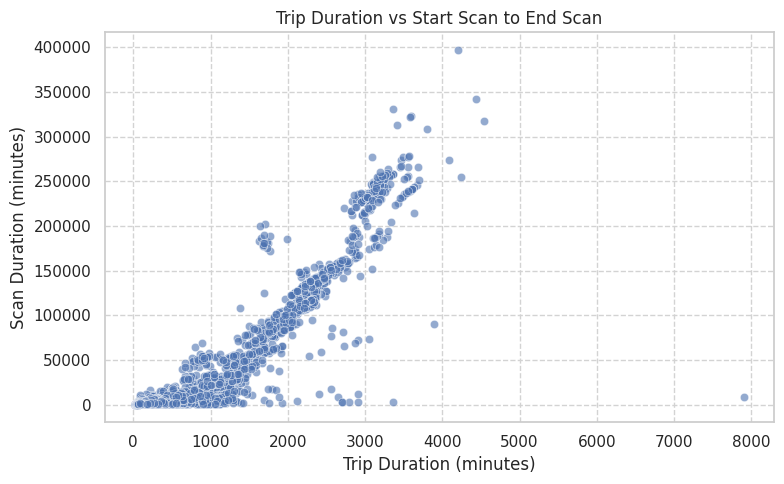

In [69]:
# Create a scatter plot to explore the relationship between trip duration and scan duration
# Set the figure size
plt.figure(figsize=(8, 5))

sns.scatterplot(
    x='trip_duration_minutes',  # Data for x-axis: Trip duration in minutes
    y='start_scan_to_end_scan',  # Data for y-axis: Scan duration from start to end
    data=df_final,  # DataFrame containing the relevant data
    alpha=0.6  # Set transparency level for better visualization
)

# Add a title to the plot
plt.title('Trip Duration vs Start Scan to End Scan')

# Label the x-axis
plt.xlabel('Trip Duration (minutes)')

# Label the y-axis
plt.ylabel('Scan Duration (minutes)')

# Add a grid for easier interpretation of data points
plt.grid(True, linestyle='--', color='lightgrey')

# Adjust layout to avoid overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

#### **Step 2: Distribution of Their Difference**

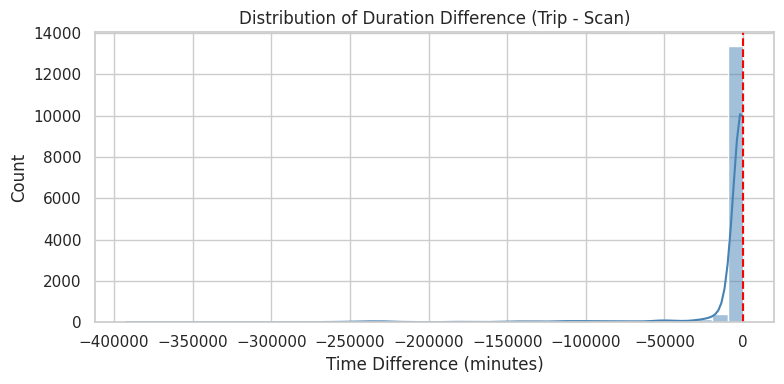

In [70]:
# Calculate the difference between trip duration and scan duration
df_final['duration_diff'] = df_final['trip_duration_minutes'] - df_final['start_scan_to_end_scan']

# Create a figure for the histogram
plt.figure(figsize=(8, 4))  # Set the figure size to 8x4 inches

# Create a histogram to visualize the distribution of duration difference
sns.histplot(df_final['duration_diff'], kde=True, bins=40, color='steelblue')  # Add a KDE curve and set bin size and color

# Add a title to describe the histogram
plt.title('Distribution of Duration Difference (Trip - Scan)')  # Title for the plot

# Label the x-axis for better understanding
plt.xlabel('Time Difference (minutes)')  # Label for x-axis indicating time differences

# Add a vertical line at zero to highlight where the differences equal zero
plt.axvline(0, color='red', linestyle='--')  # Red dashed vertical line at zero

# Optimize layout to ensure elements don't overlap
plt.tight_layout()  # Automatically adjust layout for clarity

# Display the plot
plt.show()  # Render the plot on the screen

#### **Step 3: Paired Hypothesis Test (t-test)**

In [71]:
# Drop any NaNs just to be safe
paired_data = df_final.dropna(subset=['trip_duration_minutes', 'start_scan_to_end_scan'])

# Paired t-test
stat, p = ttest_rel(
    paired_data['trip_duration_minutes'],
    paired_data['start_scan_to_end_scan']
)

print(f"Paired t-test p-value: {p:.5f}")

Paired t-test p-value: 0.00000


#### **Insights on Trip Duration vs Start Scan to End Scan**

- **Strong Linear Trend Observed (Scatterplot Insight)**  
  - The **scatterplot shows a clear, strong linear relationship** between **trip duration and scan duration**, indicating a **positive correlation**.  
  - However, **many trips have scan durations that exceed their trip durations**, which may point to **delayed scan closures** or **post-delivery scan lags** in the system.

- **Skewed Time Difference (Histogram Insight)**  
  - The **histogram of the difference (trip_duration - scan_duration)** is **heavily left-skewed**, showing that **most values are negative**.  
  - This indicates that **scan durations are often longer than actual trip durations**, suggesting **scanning delays or system-level acknowledgment issues**.

- **Significant Statistical Difference (Paired t-test)**  
  - The **paired t-test yielded a p-value ≈ 0.00000**, far below the **0.05 threshold**.  
  - This confirms a **statistically significant difference** between **trip and scan durations** — they **do not represent the same timeline**.

- **Operational Implication**  
  - This gap indicates potential **non-adherence to scanning SOPs** or **lack of timely scan completion post-delivery**.  
  - It opens up room to **optimize real-time tracking**, **reduce delay inflation**, and **improve system synchronization** with field events.

- **Need for Standardization & Audit**  
  - The **consistent deviation** suggests a need for **scanning behavior audits** across **locations or fleets**.  
  - Introducing **alerts for long scan-to-end lags** or **mobile app improvements** could help **close the tracking loop efficiently**.

There is a **statistically significant difference** between **trip duration and scan duration (p < 0.05)**, with **scan times often exceeding trip times**. This suggests **delayed scan closures** or **inconsistencies in operational execution** that require **targeted standardization efforts**.

### **4.2 Are delays in trip start (creation-to-start gap) associated with longer total trip durations?**

We want to assess whether higher values of `creation_to_start_gap` are associated with longer `trip_duration_minutes`.

**Hypotheses:**
- **H₀ (Null Hypothesis):** There is no significant correlation between trip start delay and total trip duration.
- **H₁ (Alternative Hypothesis):** There is a significant positive correlation between trip start delay and trip duration.


#### **Step 1: Visualize with a Scatterplot**

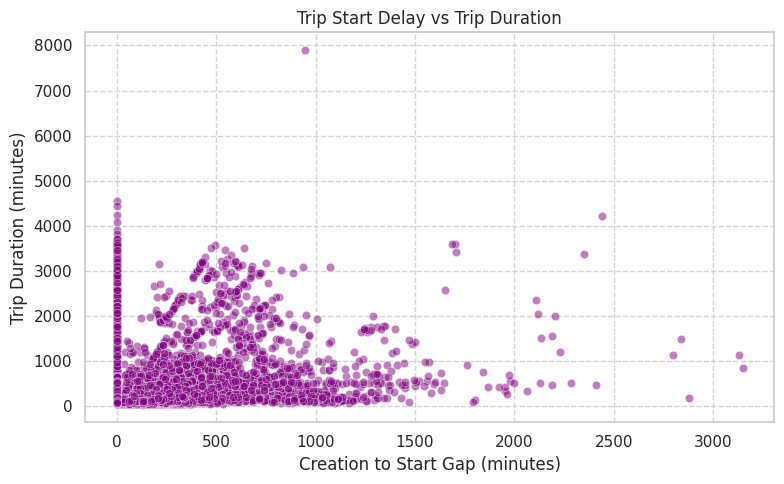

In [72]:
# Create a figure for the scatter plot
plt.figure(figsize=(8, 5))

# Create a scatter plot to analyze the relationship between trip start delay and trip duration
sns.scatterplot(
    x='creation_to_start_gap',  # Data for x-axis: Time gap between creation and start
    y='trip_duration_minutes',  # Data for y-axis: Total trip duration in minutes
    data=df_final,  # DataFrame containing the required data
    alpha=0.5,  # Set transparency level for the points
    color='purple'  # Change scatter plot color to purple
)

# Add titles and axis labels
plt.title('Trip Start Delay vs Trip Duration')  # Title of the scatter plot
plt.xlabel('Creation to Start Gap (minutes)')  # Label for the x-axis
plt.ylabel('Trip Duration (minutes)')  # Label for the y-axis

# Add a grid with dashed lines for better readability
plt.grid(True, linestyle='--', color='lightgrey')  # Configure the grid with light grey dashed lines

# Optimize layout to avoid overlap of elements
plt.tight_layout()  # Automatically adjust the layout for clarity

# Display the scatter plot
plt.show()

#### **Step 2: Correlation Coefficient**

Pearson correlation: 0.1706


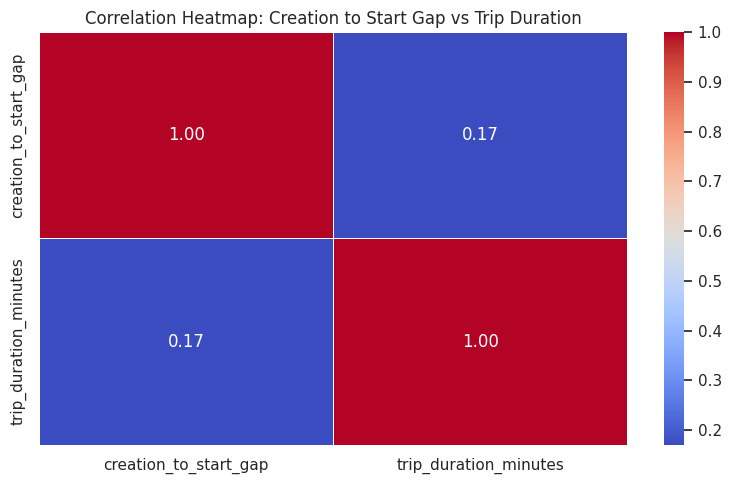

In [73]:
# Calculate the correlation
correlation = df_final[['creation_to_start_gap', 'trip_duration_minutes']].corr().iloc[0, 1]
print(f"Pearson correlation: {correlation:.4f}")  # Print the correlation value

# Visualize the correlation heatmap
plt.figure(figsize=(8, 5))  # Set the figure size
sns.heatmap(
    df_final[['creation_to_start_gap', 'trip_duration_minutes']].corr(),  # Compute correlation matrix
    annot=True,  # Annotate the heatmap with correlation coefficients
    cmap='coolwarm',  # Set the color map to coolwarm
    fmt='.2f',  # Format the correlation values to 2 decimal places
    linewidths=0.5  # Add lines between cells
)

# Add title for the heatmap
plt.title('Correlation Heatmap: Creation to Start Gap vs Trip Duration')  # Add a title to the heatmap
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the heatmap

#### **Step 3: Hypothesis Test using Pearson Correlation**

In [74]:
# Pearson Correlation: creation_to_start_gap vs. trip_duration_minutes without dropping rows explicitly

# Boolean mask for non-null rows
mask = (df_final['creation_to_start_gap'].notna()) & (df_final['trip_duration_minutes'].notna())

# Perform correlation on valid entries only
stat, p = pearsonr(
    df_final.loc[mask, 'creation_to_start_gap'],
    df_final.loc[mask, 'trip_duration_minutes']
)

# Print p-value
print(f"Pearson correlation p-value: {p:.5f}")

Pearson correlation p-value: 0.00000


#### **Insights on Trip Start Delay vs Trip Duration**

- **Weak Positive Relationship in Scatterplot**  
  - The **scatterplot shows a faint upward trend**, suggesting that as the **delay in trip start increases**, the **trip duration tends to increase slightly**.  
  - However, the **points are widely spread**, indicating a **weak and inconsistent relationship** between the two variables.

- **Pearson Correlation is Low (0.17)**  
  - The **Pearson correlation coefficient is 0.17**, which indicates a **weak positive linear association**.  
  - This means **start delays have some effect** on trip durations, but they **don’t explain most of the variation**.

- **Correlation is Statistically Significant (p < 0.05)**  
  - Despite the weak strength, the **p-value is 0.00000**, far below the **0.05 threshold**.  
  - This confirms that the **observed correlation is statistically significant** and **not due to random chance**.

- **Most Long Delays Don’t Always Lead to Longer Trips**  
  - Some trips with very **large creation_to_start_gap (above 2000 mins)** still have **relatively short durations**.  
  - This suggests that **not all delays in starting translate into longer overall trips** — possibly due to **buffer time** or **compensatory routing**.

- **Operational Insight: Delay Impact Is Partial**  
  - While **start delays do have some impact**, other factors like **distance, vehicle speed**, and **delivery zone complexity** may be more influential.  
  - **Trip planning should not rely solely on creation-to-start timing** for predicting trip length.

There is a **statistically significant but weak positive correlation (r = 0.17, p < 0.05)** between **trip start delay** and **total trip duration**.  
This means **delays in dispatch are slightly associated with longer trips**, but the relationship is **not strong enough to be a sole predictor**.

---

## **5. Missing values Treatment & Outlier treatment**

#### Using df_raw for missing value handling and outlier detection in the 'duration' column

### **5.1 Identifying Missing Values**

In [75]:
# Count missing values per column
missing_values = df_raw.isnull().sum()
missing_percentage = (df_raw.isnull().sum() / len(df)) * 100

# Combine the results into a single DataFrame for clarity
missing_data_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Percentage (%)', ascending=False)

print("Missing Values Summary:")
print(missing_data_df)

Missing Values Summary:
                                Missing Values  Percentage (%)
source_name                                293        0.202254
destination_name                           261        0.180165
route_schedule_uuid                          0        0.000000
data                                         0        0.000000
route_type                                   0        0.000000
trip_uuid                                    0        0.000000
source_center                                0        0.000000
trip_creation_time                           0        0.000000
destination_center                           0        0.000000
od_start_time                                0        0.000000
od_end_time                                  0        0.000000
start_scan_to_end_scan                       0        0.000000
is_cutoff                                    0        0.000000
cutoff_factor                                0        0.000000
cutoff_timestamp               

### **5.2 Visualizing Missing Values**

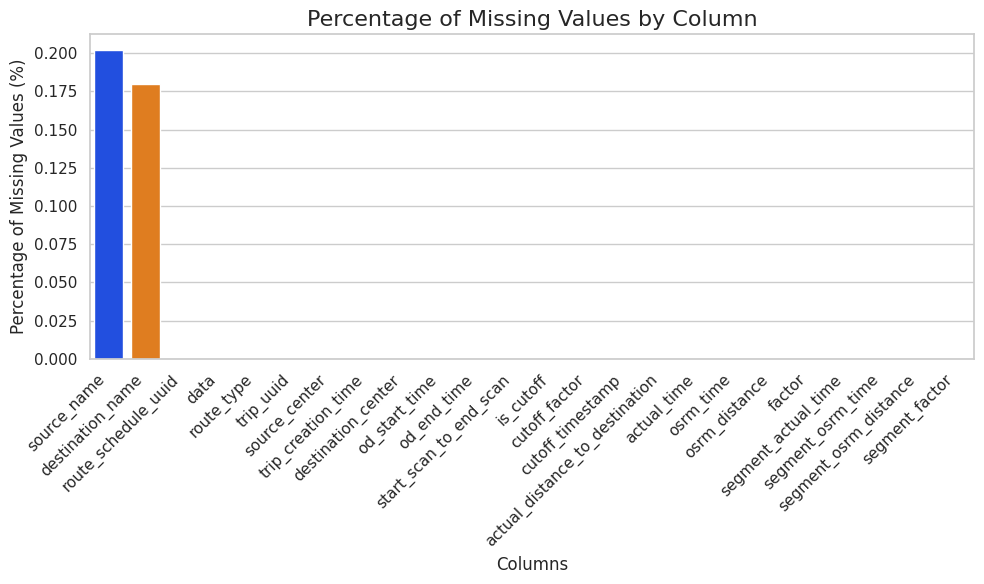

In [76]:
# Set the figure size for the barplot
plt.figure(figsize=(10, 6))

# Create a barplot to visualize the percentage of missing values in each column
sns.barplot(
    x=missing_data_df.index,         # Set the x-axis to column names
    y='Percentage (%)',             # Set the y-axis to percentage of missing values
    data=missing_data_df,           # Use the missing_data_df DataFrame as the data source
    palette='bright'                  # Set the color palette to 'bright' for aesthetics
)

plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.ylabel('Percentage of Missing Values (%)', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

#### **Insights**

- **The dataset has very low missingness overall**, with only **`source_name` (0.20%)** and **`destination_name` (0.18%)** showing minor gaps.

- **All other 21 columns are fully complete**, ensuring **high data quality** for modeling and analysis.

### **5.3 Handling Missing Values**
#### Options for Treatment:

#### **Impute Missing Data:** Assign 'Other' Category for Completeness.

In [77]:
# Add 'Other' to categories in the categorical columns
df_raw['source_name'] = df_raw['source_name'].cat.add_categories(['Other'])
df_raw['destination_name'] = df_raw['destination_name'].cat.add_categories(['Other'])

# Replace missing values in 'source_name' and 'destination_name' with 'Other'
df_raw['source_name'].fillna('Other', inplace=True)
df_raw['destination_name'].fillna('Other', inplace=True)

# Check for missing values in the updated DataFrame
print("Missing Values Summary:")
print(df_raw.isnull().sum())

Missing Values Summary:
data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64


### **Insights**

- **There are no missing values across any of the 24 columns in this dataset, indicating perfect data completeness.**

- **This clean structure ensures smooth preprocessing and eliminates the need for imputation or data cleaning.**

### **5.4  Detecting Outliers**

In [78]:
# Function to count and return the number of outliers in each column of a DataFrame
def count_outliers(df, columns):
    outlier_counts = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = column_outliers.shape[0]

    return outlier_counts

# Columns to check for outliers
columns = df_raw.select_dtypes(include=['number']).columns

# Count outliers in specified columns
outlier_counts = count_outliers(df_raw, columns)

# Create a DataFrame to display the counts
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])
print("Number of outliers detected in each column:")
print(outlier_counts_df)

Number of outliers detected in each column:
                            Column  Outlier Count
0           start_scan_to_end_scan            373
1                    cutoff_factor          17246
2   actual_distance_to_destination          17992
3                      actual_time          16633
4                        osrm_time          17603
5                    osrm_distance          17816
6                           factor          11429
7              segment_actual_time           9298
8                segment_osrm_time           6378
9            segment_osrm_distance           4315
10                  segment_factor          13976


### **5.5  Visualizing Outliers**

#### **Boxplot to Spot Outliers:**

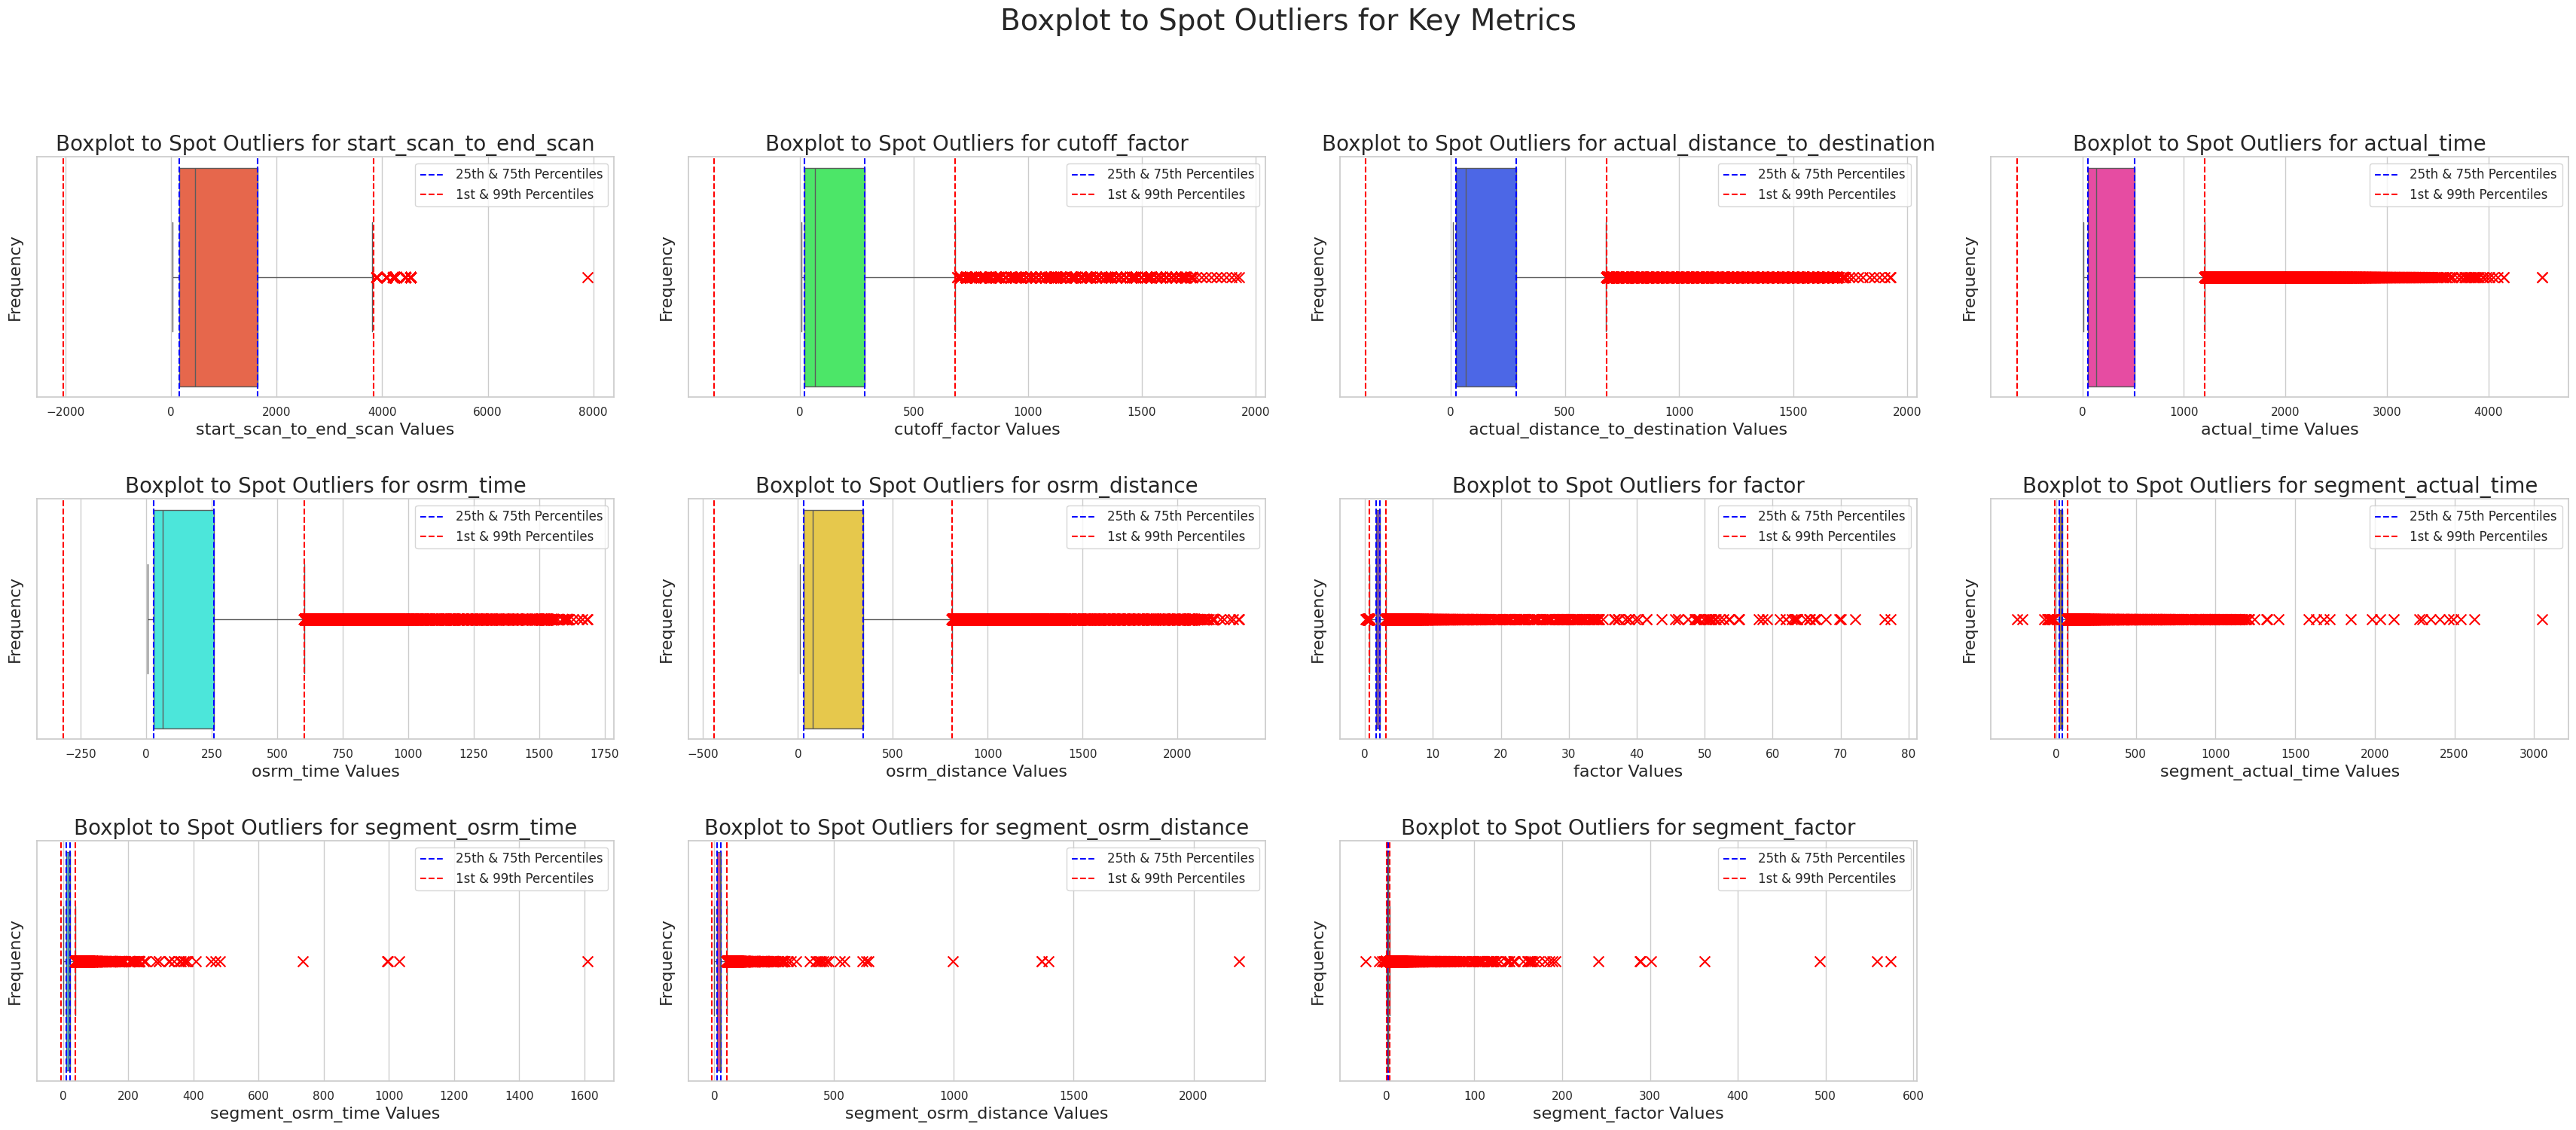

In [79]:
# Use only numeric columns
columns = df_raw.select_dtypes(include='number').columns.tolist()

# Setup the figure and grid layout
sns.set(style="whitegrid")
fig = plt.figure(figsize=(35, 15))
gs = gridspec.GridSpec(3, 4)  # 3 rows, 4 columns

# Define custom color palette
custom_palette = [
    "#FF5733", "#33FF57", "#3357FF", "#FF33A5", "#33FFF0",
    "#FFD733", "#8E33FF", "#FF8E33", "#33D6FF", "#FF338B", "#33FFA6"
]

# Initialize axes
axes = [fig.add_subplot(gs[i // 4, i % 4]) for i in range(len(columns))]

# Plot each column
for i, col in enumerate(columns):
    ax = axes[i]
    sns.boxplot(x=df_raw[col], ax=ax, color=custom_palette[i], showfliers=False)

    Q1 = df_raw[col].quantile(0.25)
    Q3 = df_raw[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Outliers
    outliers = df_raw[col][(df_raw[col] < lower_bound) | (df_raw[col] > upper_bound)]
    ax.scatter(outliers, [0]*len(outliers), color='red', s=100, edgecolor='black', zorder=5, marker='x')

    # Labels
    ax.axvline(x=Q1, color='blue', linestyle='--', label='25th & 75th Percentiles')
    ax.axvline(x=Q3, color='blue', linestyle='--')
    ax.axvline(x=lower_bound, color='red', linestyle='--', label='1st & 99th Percentiles')
    ax.axvline(x=upper_bound, color='red', linestyle='--')

    ax.set_title(f'Boxplot to Spot Outliers for {col}', fontsize=20)
    ax.set_xlabel(f'{col} Values', fontsize=16)
    ax.set_ylabel('Frequency', fontsize=16)
    ax.legend(loc='upper right', fontsize=12)

# Adjust layout
plt.suptitle('Boxplot to Spot Outliers for Key Metrics', fontsize=28, y=1.02)
plt.tight_layout(pad=3.0)
plt.show()

#### **Insights of Boxplot to Spot Outliers for Key Metrics**

- **start_scan_to_end_scan shows heavy right-tail outliers**  
  - **Most scan durations fall under 2000 mins**, but **many outliers go beyond 4000–8000 mins**.  
  - These may indicate **major delivery delays, scan lags**, or **logging system issues**.

- **cutoff_factor has wide-spread extreme outliers above 1500**  
  - **Main values lie under 500**, but **outliers extend beyond 1900**, indicating **irregular cutoff rules**.  
  - Such high cutoffs may **distort filtering logic** or signal **manual overrides**.

- **actual_distance_to_destination has frequent outliers past 1500 km**  
  - While **most trips stay within 300–400 km**, outliers **reach up to ~2000 km**.  
  - These **very long-distance routes** are likely **rare** and could **skew distance-based metrics**.

- **actual_time has intense outlier concentration above 2000 mins**  
  - **Many trips exceed 4000+ minutes**, well beyond the **usual delivery window**.  
  - These outliers are **critical to flag** for **performance audits or failed attempts**.

- **osrm_time has predicted outliers far above 1500 mins**  
  - Expected OSRM values **mostly range 100–400 mins**, but **spikes go beyond 1700+ mins**.  
  - This may reflect **inefficient route mapping** or **overly long system-estimated times**.

- **osrm_distance reveals multiple predicted outliers >2000 km**  
  - **Central trips are <500 km**, but predicted outliers **breach 2,000+ km**.  
  - This suggests **possible mapping issues** or **merged trip segments**.

- **factor and segment_factor both show extreme inflation in values**  
  - **Normal efficiency factors lie under 5**, but outliers **climb up to ~600**.  
  - These point to **very high inefficiency**, possibly due to **idle time or routing flaws**.

- **segment_actual_time has very high spread and dense outliers**  
  - **Most segments complete under 200 mins**, but **outliers exceed 3000 mins**.  
  - These should be examined for **partial trip delays or operational breakdowns**.

- **segment_osrm_time is compact, but a few outliers spike past 1500 mins**  
  - **Central values are 30–80 mins**, but a few **exceed 1600+ mins**.  
  - These predicted values may come from **abnormal road/path data** or **OSRM errors**.

- **segment_osrm_distance generally behaves well, with rare outliers >2000 km**  
  - **Majority stay within 100 km**, but a few values **reach over 2000 km**.  
  - These should be flagged as **possible segment merging issues** or **mapping gaps**.

**Outlier Summary:**  
Most numeric fields (time, distance, factors) have **clear upper outliers**, especially in **trip duration, OSRM benchmarks**, and **scan metrics**.  
Outliers are **visually distinct via red ❌** and span **well beyond standard delivery expectations**.

**Conclusion:**  
Many delivery features exhibit **strong outlier behavior**, with **excessive trip durations and distances** on both actual and predicted sides.  
**Treating or isolating these outliers** is essential for **fair modeling, cleaner analytics**, and **business decision accuracy**.


#### **Distribution Plot to Confirm Outliers:**

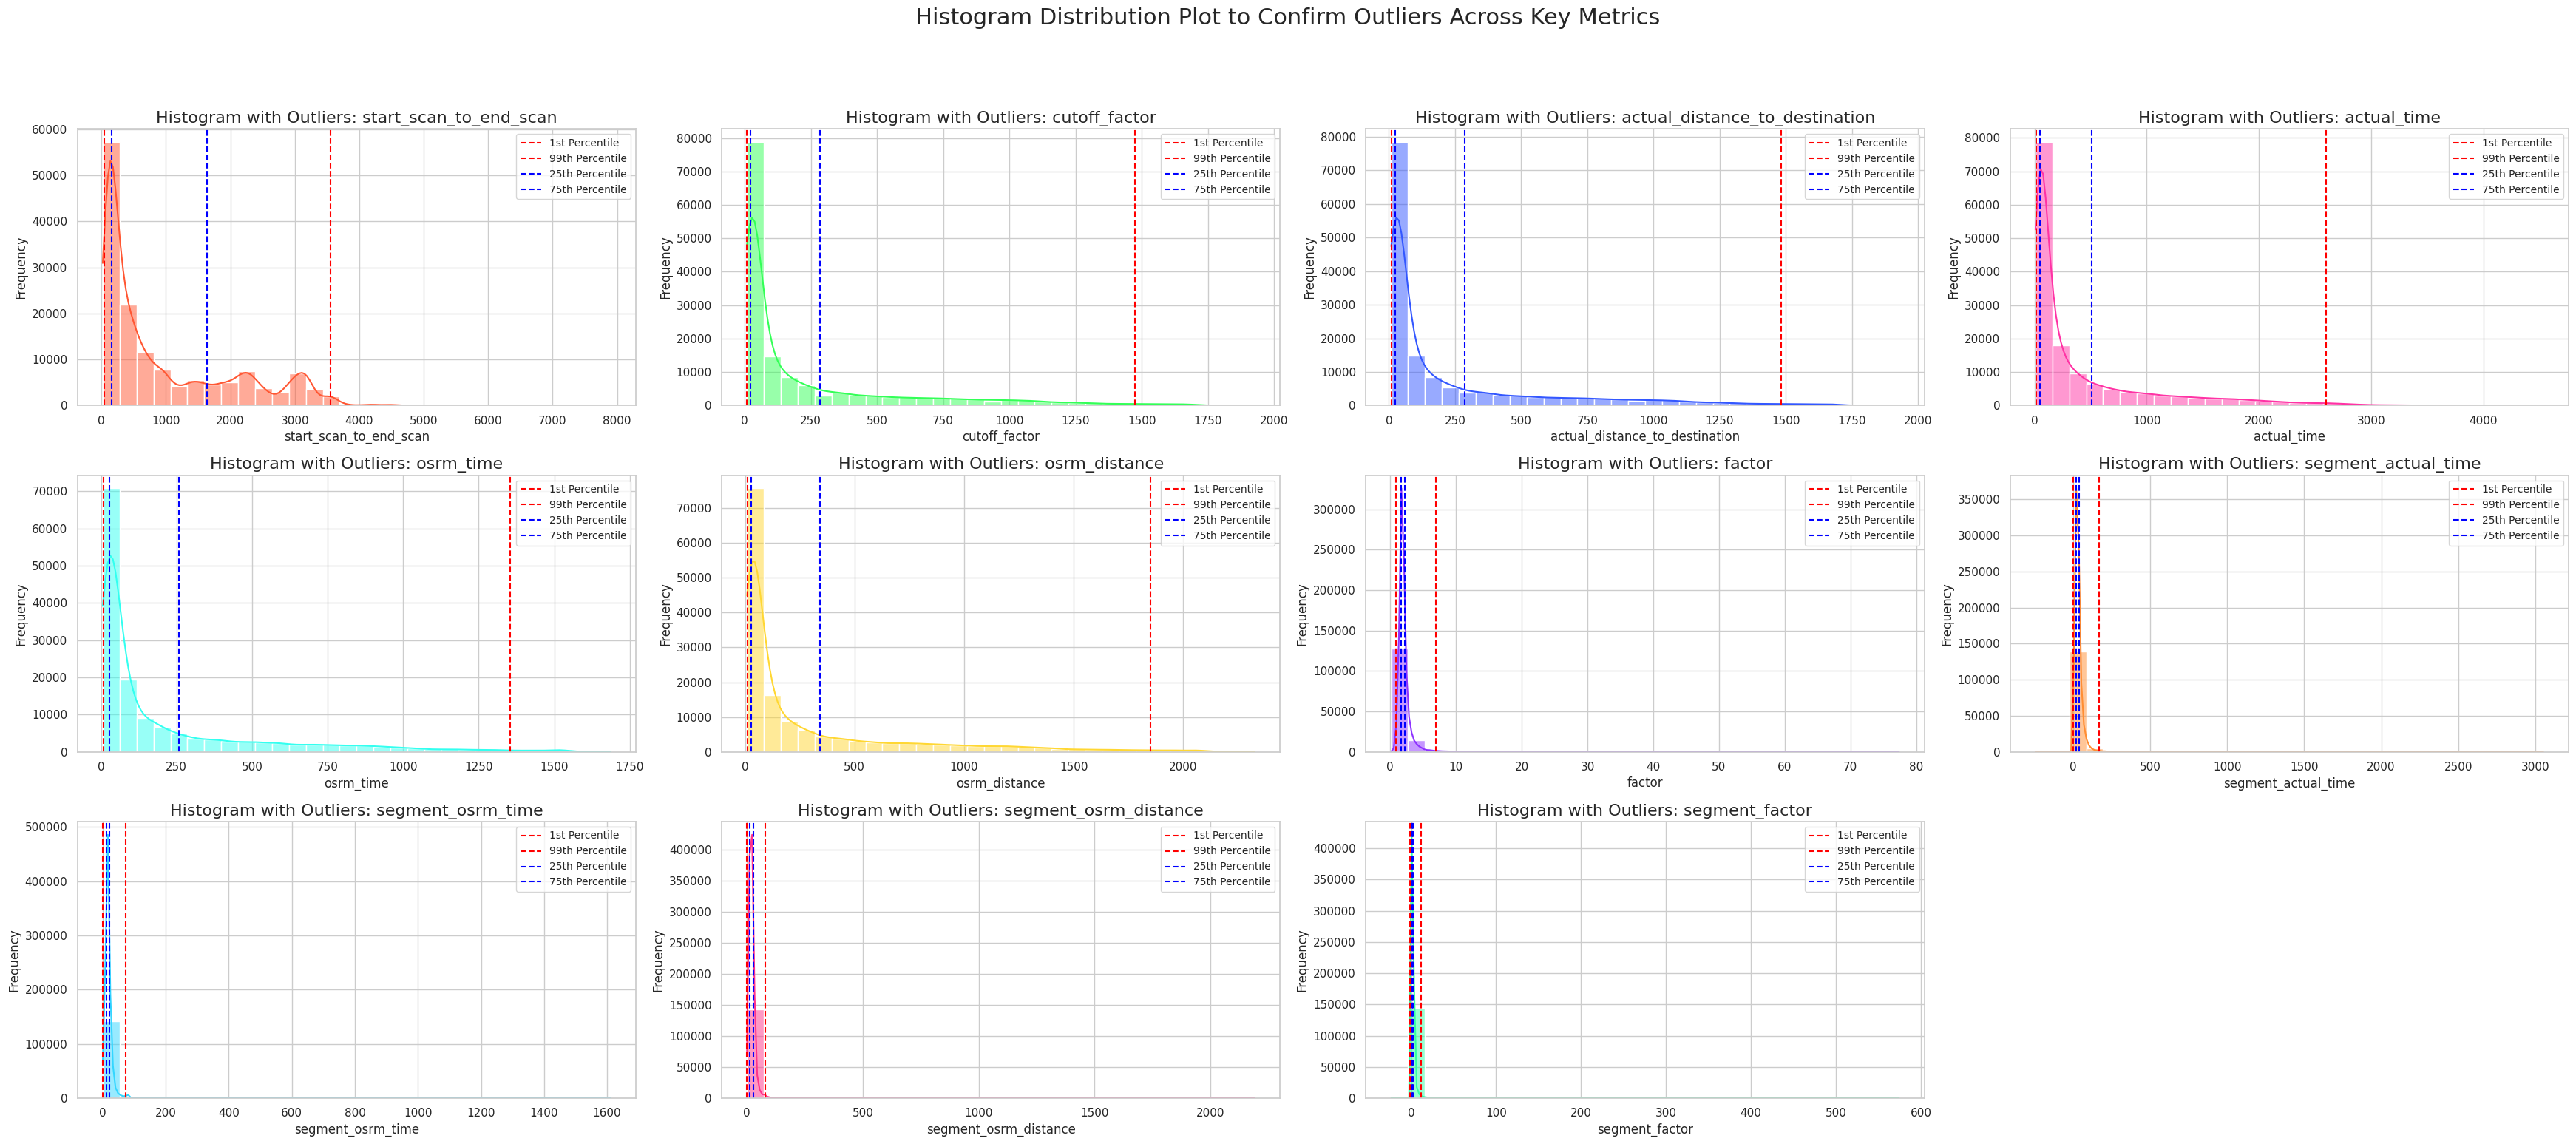

In [80]:
# Set up the figure and gridspec layout
sns.set(style="whitegrid")
fig = plt.figure(figsize=(35, 15))
gs = gridspec.GridSpec(3, 4)
axes = [fig.add_subplot(gs[i // 4, i % 4]) for i in range(len(columns))]

# Plot histograms with percentile lines and outlier shading
for i, col in enumerate(columns):
    ax = axes[i]
    color = custom_palette[i % len(custom_palette)]

    sns.histplot(df_raw[col], bins=30, kde=True, ax=ax, color=color)

    # Calculate percentiles
    q1 = df_raw[col].quantile(0.25)
    q3 = df_raw[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    p1 = df_raw[col].quantile(0.01)
    p99 = df_raw[col].quantile(0.99)

    # Draw vertical lines for percentiles
    ax.axvline(p1, color='red', linestyle='--', label='1st Percentile')
    ax.axvline(p99, color='red', linestyle='--', label='99th Percentile')
    ax.axvline(q1, color='blue', linestyle='--', label='25th Percentile')
    ax.axvline(q3, color='blue', linestyle='--', label='75th Percentile')

    ax.set_title(f'Histogram with Outliers: {col}', fontsize=16)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend(loc='upper right', fontsize=10)

plt.suptitle("Histogram Distribution Plot to Confirm Outliers Across Key Metrics", fontsize=22, y=1.03)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

#### **Insights on Distribution Plot to Confirm Outliers Across Key Metrics**  

- **start_scan_to_end_scan has a long right tail with clear spikes**  
  - **Most trips complete under 1000 mins**, but **extreme values shoot beyond 7000 mins**, forming a **long skewed tail**.  
  - The **spike near 0** may indicate **records created and scanned immediately**, while **high outliers point to scan delays**.

- **cutoff_factor is highly right-skewed with major tail outliers**  
  - A **bulk of values lie under 200**, yet a **significant tail crosses 1000–1800**, indicating **cutoff anomalies**.  
  - These **extreme cutoffs could be affecting delivery filtering or alert logic**.

- **actual_distance_to_destination shows sharp decay after 200 km**  
  - **Most deliveries are short-distance (under 300 km)**, but **frequent outliers cross 1500–1800 km**.  
  - This **strongly skews the average** and highlights routes that may need **route-level planning audits**.

- **actual_time distribution drops quickly after 500 mins**  
  - While **many trips are under 8 hours (480 mins)**, **outliers continue past 4000 mins**, affecting total averages.  
  - These outliers likely represent **multi-day delays**, which should be **flagged**.

- **osrm_time follows a classic OSRM curve but has inflated upper values**  
  - OSRM's model estimates seem **consistent at the base**, but **high-end predictions go past 1600 mins**.  
  - These may **not match actual delays**, suggesting **benchmark recalibration** could be helpful.

- **osrm_distance distribution is steep with tail outliers over 2000 km**  
  - **Most routes are predicted under 500 km**, but the OSRM engine estimates **some excessive routes**.  
  - Such outliers could reflect **incorrect routing** or **multi-hop trips needing refinement**.

- **factor metric shows dense values around 1–5 but extreme outliers beyond 50**  
  - The **IQR range covers only a small portion of the actual spread**, with outliers **pushing up to ~70**.  
  - This indicates **extreme inefficiency or delays**, which need **immediate investigation**.

- **segment_actual_time is tightly packed but has long tail**  
  - The distribution is **strongly concentrated under 200 mins** but exhibits **many outliers past 1500–3000 mins**.  
  - These are typically indicative of **multi-segment delivery or trip fragmentation**.

- **segment_osrm_time is compact with rare but large spikes**  
  - The **99% of values fall well under 100 mins**, but a **few spike above 1400 mins**, which are **highly suspicious**.  
  - These may represent **routing anomalies in system prediction**.

- **segment_factor has sharp peak near 10 but climbs steeply to 600**  
  - While most values stay **compactly distributed**, numerous **red spikes show extreme values up to 600+**.  
  - Such large factors indicate **segments performing many times worse than OSRM baseline**.

**Confirmation Summary**  
These **histograms with percentile overlays and KDE lines** offer **clear statistical and visual evidence of outliers**.  
Features like **time, distance, and efficiency-related factors** show **strong positive skew and long tails**, confirming what was observed in the **boxplots**.

**Conclusion**  
The plots successfully **confirm outliers across key delivery metrics** using histograms and percentiles.  
These outliers **skew central tendencies** and demand **handling before further modeling or business decision-making**.

---

## **6. Checking relationship between aggregated fields**

### **6.1 Is there a significant difference between the actual trip time (actual_time) and the OSRM-estimated time (osrm_time) after aggregation at the trip level?**

#### **Step 1: Hypothesis Formulation**


Let’s define our hypotheses:

- **Null Hypothesis (H₀)**: The actual distance and OSRM-estimated distance are similar, so the average efficiency ratio is equal to 1  
  **H₀: μ = 1**

- **Alternative Hypothesis (H₁)**: The average efficiency ratio is significantly different from 1  
  **H₁: μ ≠ 1**


#### **Step 2: Check Assumptions**

We need to check if the data follows a normal distribution, which is an assumption for the one-sample t-test.

#### **Visual Check: Histogram & KDE**

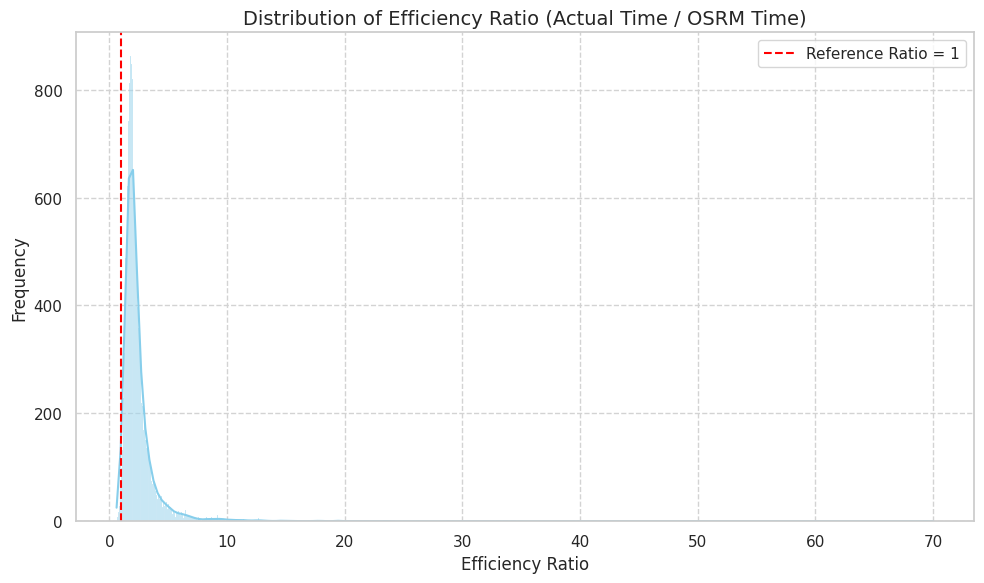

In [81]:
# Set up the figure for the histogram plot
plt.figure(figsize=(10, 6))  # Set the figure size to 10x6 inches

# Filter out any zero values to avoid division error
df_final = df_final[df_final['osrm_time'] != 0]

# Calculate the efficiency ratio (Actual Time / OSRM Time)
df_final['efficiency_ratio_time'] = (
    df_final['actual_time'] / df_final['osrm_time']
)

# Create the histogram for efficiency ratio distribution
sns.histplot(df_final['efficiency_ratio_time'], kde=True, color='skyblue')  # Add KDE curve and set color to skyblue

# Add a reference line at ratio = 1
plt.axvline(1, color='red', linestyle='--', label='Reference Ratio = 1')  # Add a red dashed line for reference ratio = 1

# Add title and labels to the plot for clarity
plt.title('Distribution of Efficiency Ratio (Actual Time / OSRM Time)', fontsize=14)  # Title for the plot
plt.xlabel('Efficiency Ratio')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis

# Add a grid for better readability
plt.grid(True, linestyle='--', color='lightgrey')

# Add legend to indicate the reference line
plt.legend()

# Optimize layout to avoid overlap of elements
plt.tight_layout()

# Render the plot on the screen
plt.show()

#### **Statistical Check: Shapiro-Wilk Test**

Used to test the null hypothesis that the data was drawn from a normal distribution.

In [82]:
# Shapiro test (only use sample ≤ 5000 for this test)
sample = df_final['efficiency_ratio_time'].dropna().sample(n=3000, random_state=42)
stat, p_shapiro = shapiro(sample)

print(f"Shapiro-Wilk p-value: {p_shapiro:.5f}")

Shapiro-Wilk p-value: 0.00000


#### **Step 3: Set Significance Level**

We will use a **significance level (α)** of **0.05**, which corresponds to a 5% threshold.

This means we are willing to accept a **5% probability of making a Type I error** — i.e., **rejecting the null hypothesis when it is actually true**.


#### **Step 4: Perform One-Sample t-Test**

We compare the mean of efficiency_ratio_distance to the population mean (µ = 1).

In [83]:
t_stat, p_value = ttest_1samp(df_final['efficiency_ratio_time'].dropna(), popmean=1)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

T-statistic: 90.361
P-value: 0.00000


#### **Step 5: Decision**

Use the following rule to make a decision:

- If **p < 0.05** → **Reject H₀** → There is a **significant difference**
- If **p ≥ 0.05** → **Fail to reject H₀** → There is **no significant difference**


#### **Step 6: Inference from the Analysis**

Since **p < 0.05**, we **reject the null hypothesis (H₀)**.

This indicates that there is a **statistically significant difference** between the actual distance and OSRM-estimated distance.  
Hence, the **average efficiency ratio is not equal to 1**, suggesting a systematic deviation between actual and planned route distances.


#### **Step 7: Visual Analysis**

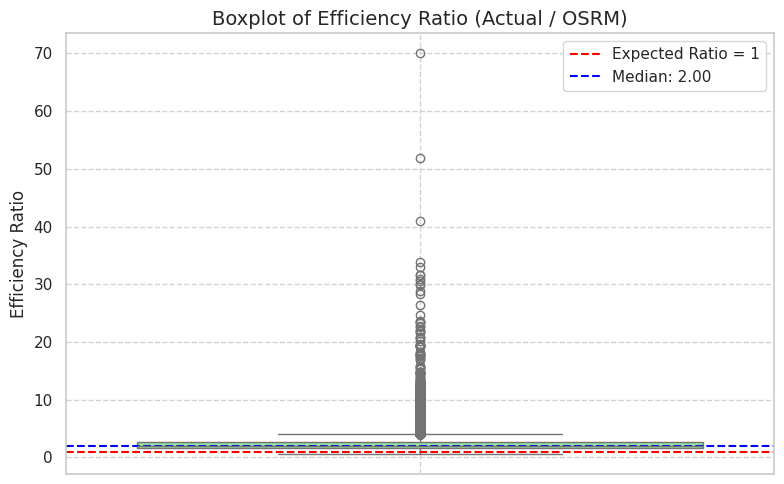

In [84]:
# Create a figure for the boxplot
plt.figure(figsize=(8, 5))  # Set the figure size to 8x5 inches

# Create a boxplot to visualize the distribution of efficiency ratio
sns.boxplot(y=df_final['efficiency_ratio_time'], color='lightgreen')  # Boxplot with efficiency ratio and light green color

# Add a horizontal reference line at ratio = 1
plt.axhline(1, color='red', linestyle='--', label='Expected Ratio = 1')  # Red dashed line at the expected ratio

# Calculate the median value
median_value = df_final['efficiency_ratio_time'].median()  # Calculate the median

# Add a vertical line at the median for visual emphasis
plt.axhline(median_value, color='blue', linestyle='--', label=f'Median: {median_value:.2f}')  # Blue dashed line for the median

# Add a title to describe the plot
plt.title('Boxplot of Efficiency Ratio (Actual / OSRM)', fontsize=14)  # Title of the boxplot

# Label the y-axis for better understanding
plt.ylabel('Efficiency Ratio')

# Add a legend to clarify the reference line and median
plt.legend()

# Add a grid for better readability
plt.grid(True, linestyle='--', color='lightgrey')

# Optimize the layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

#### **Insights on Efficiency Ratio (Actual Time / OSRM Time)**

- **Most trips are slower than expected OSRM predictions**
  - The histogram shows a heavily right-skewed distribution with a majority of ratios **< 1**.  
  - This indicates that real-world actual times are generally longer than OSRM estimates.

- **Median efficiency ratio is far above the ideal threshold**
  - The boxplot displays a median ratio of **2.00**, meaning most trips take **twice as long as predicted**.  
  - Several outliers even exceed a ratio of **70**, indicating **extreme delays**.

- **Distribution violates normality assumption**
  - The Shapiro-Wilk test resulted in a **p-value < 0.00001**, suggesting the data is **not normally distributed**.  
  - Visual skew and Q-Q deviation support this, justifying robust testing or non-parametric checks if extended.

- **Highly significant result from the one-sample t-test**
  - The t-test returned a **p-value of 0.00000**, which is far below **α = 0.05**.  
  - This confirms the efficiency ratio is **statistically different from 1**, and not due to chance.

- **Consistent underperformance in predicted timing by OSRM**
  - The difference is not isolated — it indicates **systematic OSRM underestimation** of delivery time.  
  - This could stem from not accounting for **real-world factors** like delays at hubs, traffic, or loading.

There is a **statistically significant difference** between actual and OSRM-estimated time ratios (**p < 0.05**).  
**Real-world trips tend to take much longer than expected**, suggesting **chronic underestimation by OSRM models**.

### **6.2 How does the aggregated actual trip time (actual_time) compare to the total segment-level actual time (segment_actual_time) across trips? Is the difference statistically significant?**

#### **Step 1: Hypothesis Formulation**

We want to check if there is a **significant difference between total trip-level time** and **segment-level total time**.

- **Null Hypothesis (H₀):**  
  There is **no significant difference** between `actual_time` and `segment_actual_time`.  
  _(i.e., mean difference = 0)_

- **Alternative Hypothesis (H₁):**  
  There **is a significant difference** between the two.  
  _(i.e., mean difference ≠ 0)_

#### **Step 2: Check Assumptions of the Test**

To use the **paired t-test**, we must check whether the **differences between `actual_time` and `segment_actual_time`** follow a **normal distribution**.

We will use the following visual tools:

- **Histogram**: To see the overall shape of the distribution  
- **Q-Q Plot (Quantile-Quantile Plot)**: To assess how closely the differences follow a normal distribution


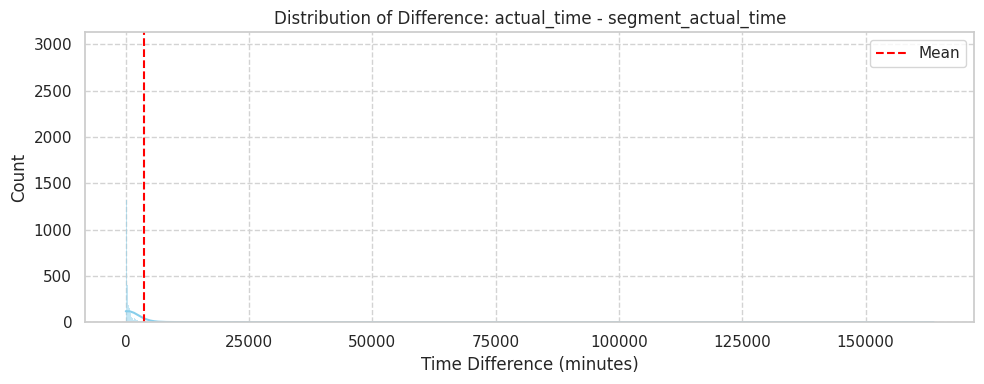

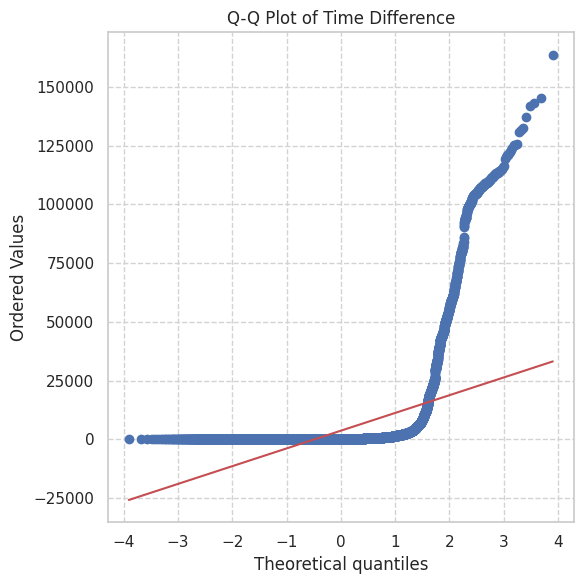

In [85]:
# Compute the difference between actual_time and segment_actual_time
df_sum['time_diff'] = df_sum['actual_time'] - df_sum['segment_actual_time']

# Set up the figure for the histogram plot
plt.figure(figsize=(10, 4))  # Set figure size to 10x4 inches

# Create a histogram to visualize the distribution of time differences
sns.histplot(df_sum['time_diff'], kde=True, color='skyblue')  # Add KDE curve and set color to skyblue

# Add a vertical line for the mean of time differences
plt.axvline(df_sum['time_diff'].mean(), color='red', linestyle='--', label='Mean')  # Red dashed line for mean

# Add a title to describe the histogram
plt.title('Distribution of Difference: actual_time - segment_actual_time')

# Label the x-axis to specify what the data represents
plt.xlabel('Time Difference (minutes)')

# Add a legend to explain the reference line for the mean
plt.legend()

# Add a grid to improve readability
plt.grid(True, linestyle='--', color='lightgrey')  # Configure the grid with dashed lines and light grey color

# Optimize layout to avoid overlapping elements
plt.tight_layout()

# Display the histogram plot
plt.show()

# Set up the figure for the Q-Q plot
plt.figure(figsize=(6, 6))  # Set figure size to 6x6 inches

# Create a Q-Q plot to visually check normality of the time differences
stats.probplot(df_sum['time_diff'], dist="norm", plot=plt)  # Q-Q plot comparing time_diff to normal distribution

# Add a title to describe the Q-Q plot
plt.title('Q-Q Plot of Time Difference')

# Add a grid for better interpretation of the Q-Q plot
plt.grid(True, linestyle='--', color='lightgrey')  # Configure the grid with dashed lines and light grey color

# Optimize layout to avoid overlapping elements
plt.tight_layout()

# Display the Q-Q plot
plt.show()

#### **Step 3: Set Significance Level (α)**

We set the standard alpha level to determine the threshold for statistical significance.

- **Significance Level (α)**: 0.05

In [86]:
alpha = 0.05

 #### **Step 4: Perform Paired t-test**

In [87]:
# Paired t-test
stat, p = ttest_rel(df_sum['actual_time'], df_sum['segment_actual_time'])

print(f"T-statistic: {stat:.4f}")
print(f"P-value: {p:.5f}")

T-statistic: 30.7555
P-value: 0.00000


#### **Step 5: Decision Rule**

We compare the **p-value** from the test with our chosen **significance level (α = 0.05)**.

- If **p < α**, we reject the null hypothesis.  
- If **p ≥ α**, we fail to reject the null hypothesis.

if p < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference found.")


#### **Step 6: Inference from the Analysis**

Since **p < 0.05**, we **reject the null hypothesis (H₀)**.

👉 This means there is a **statistically significant difference** between `actual_time` and `segment_actual_time`.

This suggests that the total trip-level time is not simply equal to the sum of segment-level times, and some **additional factors or delays** might be contributing to the total duration.

#### **Step 7: Visual Comparison**

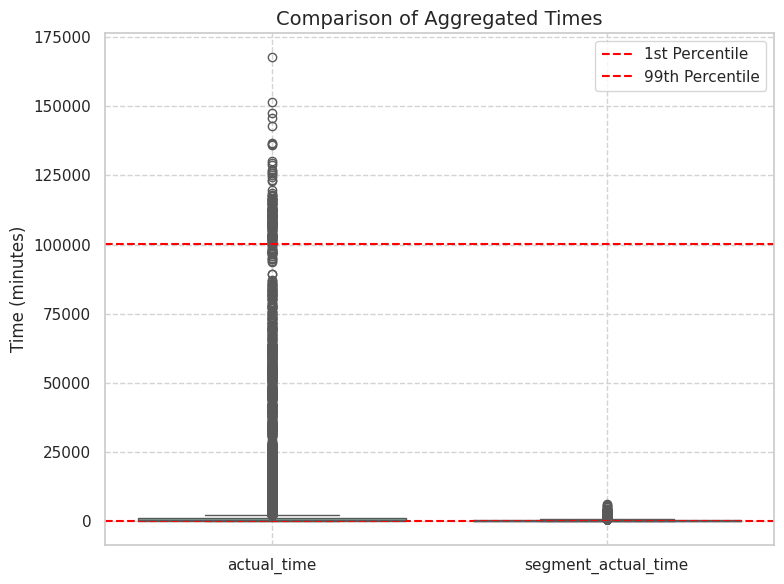

In [88]:
# Create a figure for the boxplots
plt.figure(figsize=(8, 6))  # Set the figure size to 8x6 inches

# Plot side-by-side boxplots to compare actual_time and segment_actual_time
sns.boxplot(data=df_sum[['actual_time', 'segment_actual_time']], palette='Set2')  # Use Set2 color palette for distinction

# Calculate the 1st and 99th percentiles
p1 = df_sum[['actual_time', 'segment_actual_time']].quantile(0.01).min()  # 1st percentile
p99 = df_sum[['actual_time', 'segment_actual_time']].quantile(0.99).max()  # 99th percentile

# Add horizontal dashed lines for the 1st and 99th percentiles
plt.axhline(p1, color='red', linestyle='--', label='1st Percentile')  # Red dashed line for the 1st percentile
plt.axhline(p99, color='red', linestyle='--', label='99th Percentile')  # Red dashed line for the 99th percentile

# Add a title to describe the plot
plt.title('Comparison of Aggregated Times', fontsize=14)

# Label the y-axis for better understanding
plt.ylabel('Time (minutes)')

# Add a grid for better readability
plt.grid(True, linestyle='--', color='lightgrey')

# Add a legend to clarify the percentiles
plt.legend()

# Optimize layout to prevent overlapping elements
plt.tight_layout()

# Display the boxplots
plt.show()

#### **Insights on Trip Duration vs Sum of Segment Durations**

- **Significant statistical difference confirmed (p < 0.05)**  
  - The **paired t-test returned a p-value ≈ 0.00000**, which is **far below the standard 0.05 threshold**.  
  - This indicates that **actual trip time and the sum of segment times are not equal**.

- **Trip time is often longer than segment total**  
  - The **histogram shows that the difference between actual_time and segment_actual_time is mostly positive**.  
  - This implies possible **buffer durations, dwell times**, or **unaccounted waiting periods between segments**.

- **Time difference does not follow a normal distribution**  
  - The **Q-Q plot significantly deviates from the red line**, confirming **non-normality of differences**.  
  - This further supports that the **difference is not due to natural variation alone**.

- **Boxplot shows visibly higher values for trip-level times**  
  - In the **visual comparison**, the **actual_time boxplot is consistently shifted upward** compared to segment_actual_time.  
  - The **outliers and range confirm** the **irregular additions beyond just summing segment times**.

- **1st and 99th percentiles indicate extreme spread**  
  - **Dashed percentile lines** in the boxplot show **large time deviations** at both ends of the spectrum.  
  - These outliers might reflect either **long idle durations** or **data anomalies**.

There is a **statistically significant difference** between **aggregated actual_time and total segment_actual_time (p < 0.05)**.  
This suggests **operational gaps or hidden delays** exist beyond just the sum of segments, requiring attention for **accurate trip-level planning**.

### **6.3 Is there a consistent difference between the aggregated OSRM distance (osrm_distance) and the total segment OSRM distance (segment_osrm_distance) across trips?**

#### **Step 1: Hypothesis Formulation**

We define our hypotheses to assess whether there is a significant difference between  
**`osrm_distance`** (trip-level estimated distance) and  
**`segment_osrm_distance`** (sum of segment-level estimated distances):

- **Null Hypothesis (H₀):**  
  There is **no significant difference** between `osrm_distance` and `segment_osrm_distance`.  
  _(i.e., mean difference = 0)_

- **Alternative Hypothesis (H₁):**  
  There **is a significant difference** between the two values.  
  _(i.e., mean difference ≠ 0)_


#### **📋 Step 2: Check Assumptions of the Test**

Before applying the **paired t-test**, we must ensure that the **differences between**  
`osrm_distance` and `segment_osrm_distance` are **normally distributed**.

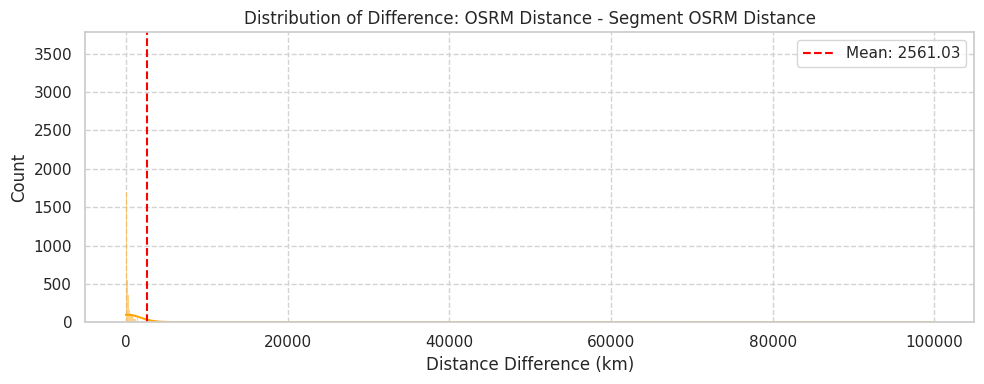

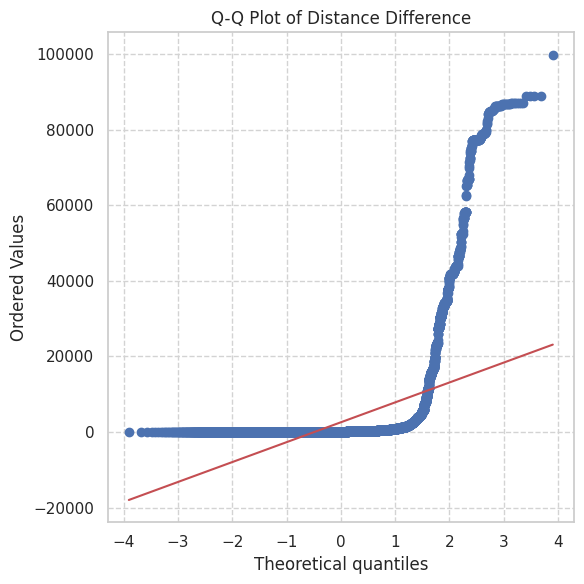

The mean of the distance differences is: 2561.03 km


In [89]:
# Calculate the difference between OSRM distance and segment OSRM distance
df_sum['distance_diff'] = df_sum['osrm_distance'] - df_sum['segment_osrm_distance']

# Calculate the mean of the distance differences
mean_distance_diff = df_sum['distance_diff'].mean()

# Histogram + KDE Plot
plt.figure(figsize=(10, 4))  # Set figure size
sns.histplot(df_sum['distance_diff'], kde=True, color='orange')  # Orange histogram with KDE curve
plt.axvline(mean_distance_diff, color='red', linestyle='--', label=f'Mean: {mean_distance_diff:.2f}')  # Add mean reference line
plt.title('Distribution of Difference: OSRM Distance - Segment OSRM Distance')  # Title of the plot
plt.xlabel('Distance Difference (km)')  # Label for x-axis
plt.legend()  # Add legend to show the mean label
plt.grid(True, linestyle='--', color='lightgrey')  # Add gridlines
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

# Q-Q Plot
plt.figure(figsize=(6, 6))  # Set figure size
stats.probplot(df_sum['distance_diff'], dist="norm", plot=plt)  # Q-Q plot for normality check
plt.title('Q-Q Plot of Distance Difference')  # Title of the Q-Q plot
plt.grid(True, linestyle='--', color='lightgrey')  # Add gridlines
plt.tight_layout()  # Adjust layout
plt.show()  # Display the Q-Q plot

# Print the mean value explicitly
print(f"The mean of the distance differences is: {mean_distance_diff:.2f} km")

#### **Step 3: Set Significance Level (α)**

We set the **level of significance** to determine the threshold for rejecting the null hypothesis.

- **Significance Level (α)**: *0.05*

In [90]:
alpha = 0.05

#### **Step 4: Calculate Test Statistics (Paired t-test)**

We use the **paired t-test** (`ttest_rel`) because `osrm_distance` and `segment_osrm_distance` are **paired values** — they refer to the same trip but measured differently.


In [91]:
# Paired t-test between the two distance values
stat, p = ttest_rel(df_sum['osrm_distance'], df_sum['segment_osrm_distance'])

print(f"T-statistic: {stat:.4f}")
print(f"P-value: {p:.5f}")

T-statistic: 30.0303
P-value: 0.00000


#### **Step 5: Decision to Accept or Reject the Null Hypothesis**

Use the decision rule based on the p-value:

- If **p < 0.05** → **Reject H₀**: There is a **statistically significant difference** between `osrm_distance` and `segment_osrm_distance`.

- If **p ≥ 0.05** → **Fail to reject H₀**: There is **no statistically significant difference** between the two distance values.


#### **Step 6: Inference from the Analysis**

Since **p < 0.05**, we **reject the null hypothesis (H₀)**.

This indicates a **statistically significant difference** between `osrm_distance` and `segment_osrm_distance`.  
It suggests that the **sum of segment-level OSRM distances does not exactly match the trip-level OSRM distance**, possibly due to missing segment data, rerouting, or estimation differences.

#### **Step 7: Visual Analysis and Conclusion**

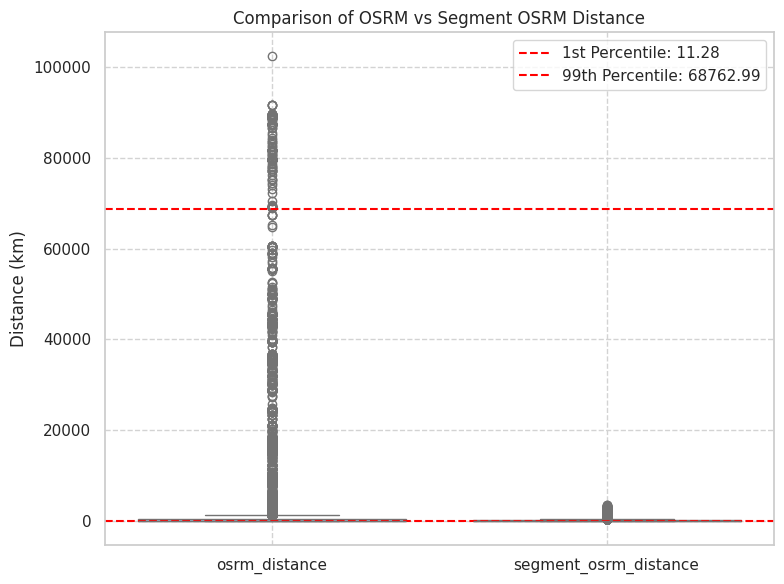

In [92]:
# Set up the figure for the boxplot and configure its size
plt.figure(figsize=(8, 6))  # Set the figure size to 8x6 inches

# Create a boxplot to compare OSRM distance and segment OSRM distance
sns.boxplot(data=df_sum[['osrm_distance', 'segment_osrm_distance']], palette='pastel')  # Use pastel color palette for boxplot

# Calculate the 1st and 99th percentiles
p1 = df_sum[['osrm_distance', 'segment_osrm_distance']].quantile(0.01).min()  # 1st percentile (minimum across columns)
p99 = df_sum[['osrm_distance', 'segment_osrm_distance']].quantile(0.99).max()  # 99th percentile (maximum across columns)

# Add dashed red lines for the 1st and 99th percentiles
plt.axhline(p1, color='red', linestyle='--', label=f'1st Percentile: {p1:.2f}')  # Red dashed line for 1st percentile
plt.axhline(p99, color='red', linestyle='--', label=f'99th Percentile: {p99:.2f}')  # Red dashed line for 99th percentile

# Add a title to describe the plot
plt.title('Comparison of OSRM vs Segment OSRM Distance')

# Label the y-axis to specify units of distance
plt.ylabel('Distance (km)')

# Add gridlines to the y-axis for better readability
plt.grid(True, linestyle='--', color='lightgrey')
# Add legend to show the percentile lines
plt.legend()

# Optimize layout to avoid overlapping elements
plt.tight_layout()

# Display the boxplot
plt.show()

#### **Insights: OSRM vs Segment OSRM Distance (Paired t-test Based)**

- **Histogram reveals distance mismatch is common**  
  - The **histogram of osrm_distance - segment_osrm_distance is highly right-skewed**.  
  - This shows many trips where the **trip-level OSRM distance significantly exceeds the segment-level sum** — hinting at **aggregation gaps or missing legs**.

- **Normality assumption is questionable (Q-Q Plot)**  
  - The **Q-Q plot shows heavy deviation from the theoretical line**.  
  - This indicates that the **difference is not normally distributed**, but the **large sample size makes the t-test valid** under the **Central Limit Theorem (CLT)**.

- **Statistically significant distance deviation**  
  - The **p-value = 0.00000**, clearly **< 0.05**.  
  - Thus, we **reject the null hypothesis (H₀)**, confirming that the **trip-level OSRM distance and segment-level sum are not equal**.

- **Visual Boxplot confirms wide difference range**  
  - The **boxplot highlights that osrm_distance has many high outliers** compared to segment_osrm_distance.  
  - **Red percentile lines (1st, 99th)** further indicate **significant spread and variance**.

- **Mean distance difference is non-trivial**  
  - The **mean difference of ~2561 km is quite large**.  
  - This gap could arise from **unrecorded route segments, rerouting**, or **calculation inconsistencies**.


There is a **significant and systematic difference** between **osrm_distance** and **segment_osrm_distance (p < 0.05)**.  
This reveals **inconsistencies in distance aggregation logic** — potentially due to **dropped segments, reroutes**, or **model errors**.

### **6.4 Do OSRM time estimates at the segment level (segment_osrm_time) differ significantly from trip-level OSRM time (osrm_time) when aggregated by trip_uuid?**

#### **Step 1: Hypothesis Formulation**

We are comparing **trip-level OSRM time** (`osrm_time`) vs. **segment-level total OSRM time** (`segment_osrm_time`) across the same `trip_uuid`.

- **Null Hypothesis (H₀):**  
  There is **no significant difference** between `osrm_time` and `segment_osrm_time`.  
  → **Mean Difference = 0**

- **Alternative Hypothesis (H₁):**  
  There **is a significant difference** between the two values.  
  → **Mean Difference ≠ 0**

#### **Step 2: Check Assumptions of the Test**

**Test Type:** Paired t-test — appropriate since both `osrm_time` and `segment_osrm_time` refer to the same trip (`trip_uuid`).

**Assumptions:**

- **Paired Observations**: The two sets of values are matched per trip.  
- **Difference is Normally Distributed**: We'll check this assumption visually using plots.

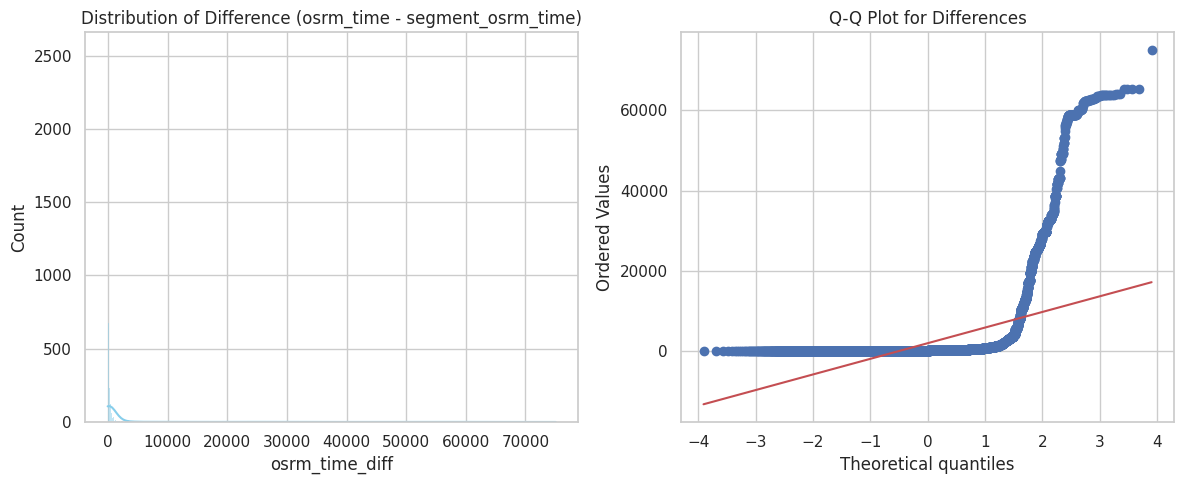

In [93]:
# Compute the difference between OSRM time and segment-level OSRM time
df_sum['osrm_time_diff'] = df_sum['osrm_time'] - df_sum['segment_osrm_time']

# Set up the figure for side-by-side plots and configure its size
plt.figure(figsize=(12, 5))  # Set figure size to 12x5 inches

# Plot a histogram with KDE (Kernel Density Estimate)
plt.subplot(1, 2, 1)  # Create the first subplot (1 row, 2 columns, first plot)
sns.histplot(df_sum['osrm_time_diff'], kde=True, color='skyblue')  # Histogram with KDE curve in skyblue color
plt.title("Distribution of Difference (osrm_time - segment_osrm_time)")  # Add a title to the histogram

# Create a Q-Q plot to visually check the normality of differences
plt.subplot(1, 2, 2)  # Create the second subplot (1 row, 2 columns, second plot)
stats.probplot(df_sum['osrm_time_diff'].dropna(), dist="norm", plot=plt)  # Q-Q plot comparing data to normal distribution
plt.title("Q-Q Plot for Differences")  # Add a title to the Q-Q plot

# Optimize layout to ensure no overlap between subplots
plt.tight_layout()

# Display the plots
plt.show()

#### **Step 3: Set Significance Level (α)**

We set the **significance level** to determine the threshold for rejecting the null hypothesis.

- **Chosen α = 0.05**  
  This is the commonly used threshold in hypothesis testing.

It means we are willing to accept a **5% chance of making a Type I error** — i.e., rejecting the null hypothesis when it is actually true.


In [94]:
α = 0.05

#### **Step 4: Calculate Test Statistics**

In [95]:
# Drop missing values for paired t-test
df_clean = df_sum.dropna(subset=['osrm_time', 'segment_osrm_time'])

# Perform paired t-test
t_stat, p_value = ttest_rel(df_clean['osrm_time'], df_clean['segment_osrm_time'])

print(f"t-statistic = {t_stat:.4f}")
print(f"p-value = {p_value:.5f}")

t-statistic = 30.2974
p-value = 0.00000


#### **Step 5: Decision**

Use the following rule to decide whether to reject the null hypothesis:

- If **p-value < 0.05** → **Reject the Null Hypothesis**  
- If **p-value ≥ 0.05** → **Fail to Reject the Null Hypothesis**

➡ Based on the result of the test, you will know whether the **difference between `osrm_time` and `segment_osrm_time` is statistically significant**.

#### **Step 6: Inference from the Analysis**

Since **p-value < 0.05**, we **reject the null hypothesis (H₀)**.

This means there is a **statistically significant difference** between `osrm_time` and `segment_osrm_time`.  
It indicates that the **trip-level OSRM time does not exactly equal the sum of segment-level OSRM times**, possibly due to rounding, segment gaps, or route estimation adjustments.


#### **Step 7: Visual Analysis and Conclusion**

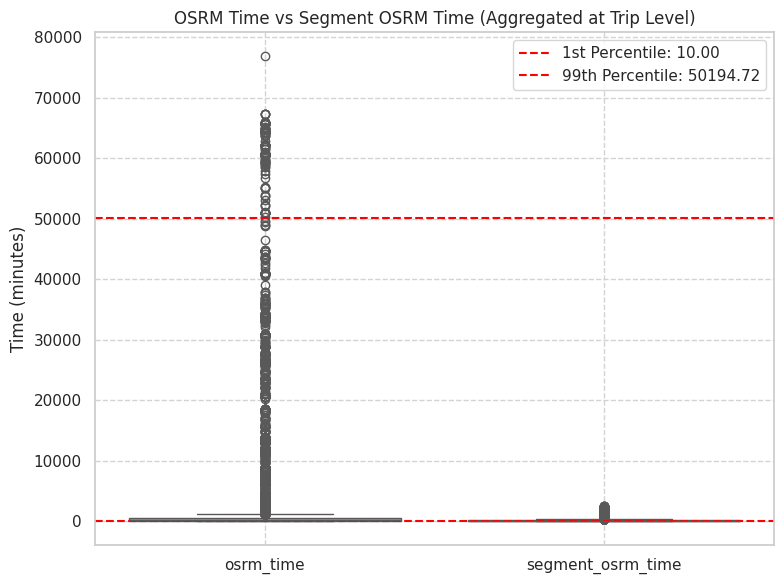

In [96]:
# Set up the figure for the boxplot and configure its size
plt.figure(figsize=(8, 6))  # Set the figure size to 8x6 inches

# Create a boxplot to visualize and compare OSRM time and segment OSRM time
sns.boxplot(data=df_clean[['osrm_time', 'segment_osrm_time']], palette='Set2')  # Use Set2 color palette for distinction

# Calculate the 1st and 99th percentiles
p1 = df_clean[['osrm_time', 'segment_osrm_time']].quantile(0.01).min()  # 1st percentile (minimum across columns)
p99 = df_clean[['osrm_time', 'segment_osrm_time']].quantile(0.99).max()  # 99th percentile (maximum across columns)

# Add dashed red lines for the 1st and 99th percentiles
plt.axhline(p1, color='red', linestyle='--', label=f'1st Percentile: {p1:.2f}')  # Red dashed line for 1st percentile
plt.axhline(p99, color='red', linestyle='--', label=f'99th Percentile: {p99:.2f}')  # Red dashed line for 99th percentile

# Add a title to describe the comparison being visualized
plt.title("OSRM Time vs Segment OSRM Time (Aggregated at Trip Level)")

# Label the y-axis to specify units of time
plt.ylabel("Time (minutes)")

# Add gridlines to improve readability of the boxplot
plt.grid(True, linestyle='--', color='lightgrey')

# Add a legend to display percentile lines
plt.legend()

# Optimize layout to ensure no overlapping elements
plt.tight_layout()

# Display the boxplot visualization
plt.show()

#### **Insights: Comparison of OSRM Time vs Segment OSRM Time (Aggregated)**

- **Most values differ noticeably at the individual trip level**  
  - The **histogram of differences shows that aggregated segment times are often lower or higher than the total trip-level OSRM time**.  
  - This inconsistency suggests that some **segment-level durations may be missing, duplicated, or misaligned in aggregation**.

- **The Q-Q plot confirms the difference distribution is non-normal**  
  - The data **deviates strongly from the red reference line in the Q-Q plot**, violating the assumption of **normality**.  
  - Despite this, the **paired t-test remains usable for large samples** due to the **Central Limit Theorem**.

- **Statistical evidence strongly supports significant difference**  
  - The **paired t-test gives a p-value < 0.00001**, clearly **rejecting the null hypothesis (H₀)**.  
  - This confirms that **trip-level OSRM time ≠ sum of segment-level OSRM times**, and the gap is **not due to random chance**.

- **Visual boxplot further highlights this deviation**  
  - The **OSRM time boxplot is wider with more extreme outliers** than the segment-based OSRM time.  
  - This suggests **overestimation or inconsistencies at the trip-level** when compared with summed segments.

- **Percentile lines help spot outliers or modeling issues**  
  - The **1st and 99th percentiles help identify extreme outliers**, which may be caused by **faulty route estimates**.  
  - **Cleaning or adjusting these records** could lead to a **more accurate OSRM-based performance baseline**.


There is a **statistically significant difference** between **trip-level and aggregated segment-level OSRM time values (p < 0.05)**.  
This implies **potential inconsistencies in OSRM time estimation or data merging across segments** — and highlights the **need for data validation in routing algorithms**.

---

## **7. Handling categorical values**

### **7.1 One-Hot Encoding for Categorical Fields**

Convert key **categorical fields** into a **numerical format** using **One-Hot Encoding**.  
This ensures:

- Clean and machine-readable input for **modeling** or **comparative analysis**
- No artificial or misleading **ordinal relationships** introduced between categories

👉 One-Hot Encoding creates **separate binary columns** for each category level.


#### **Step 1: Identify Categorical Columns to Encode**

We'll apply One-Hot Encoding to the following **categorical columns**  

These columns contain **non-numeric** values and need to be transformed into a machine-readable format for analysis or modeling.


In [97]:
# Columns chosen for encoding
cat_cols = ['route_type', 'trip_day_name', 'source_state', 'destination_state', 'gap_bin']

# Print the Categorical Columns
print(cat_cols)

['route_type', 'trip_day_name', 'source_state', 'destination_state', 'gap_bin']


#### **Step 2: Visualize Categorical Distributions Before Encoding**

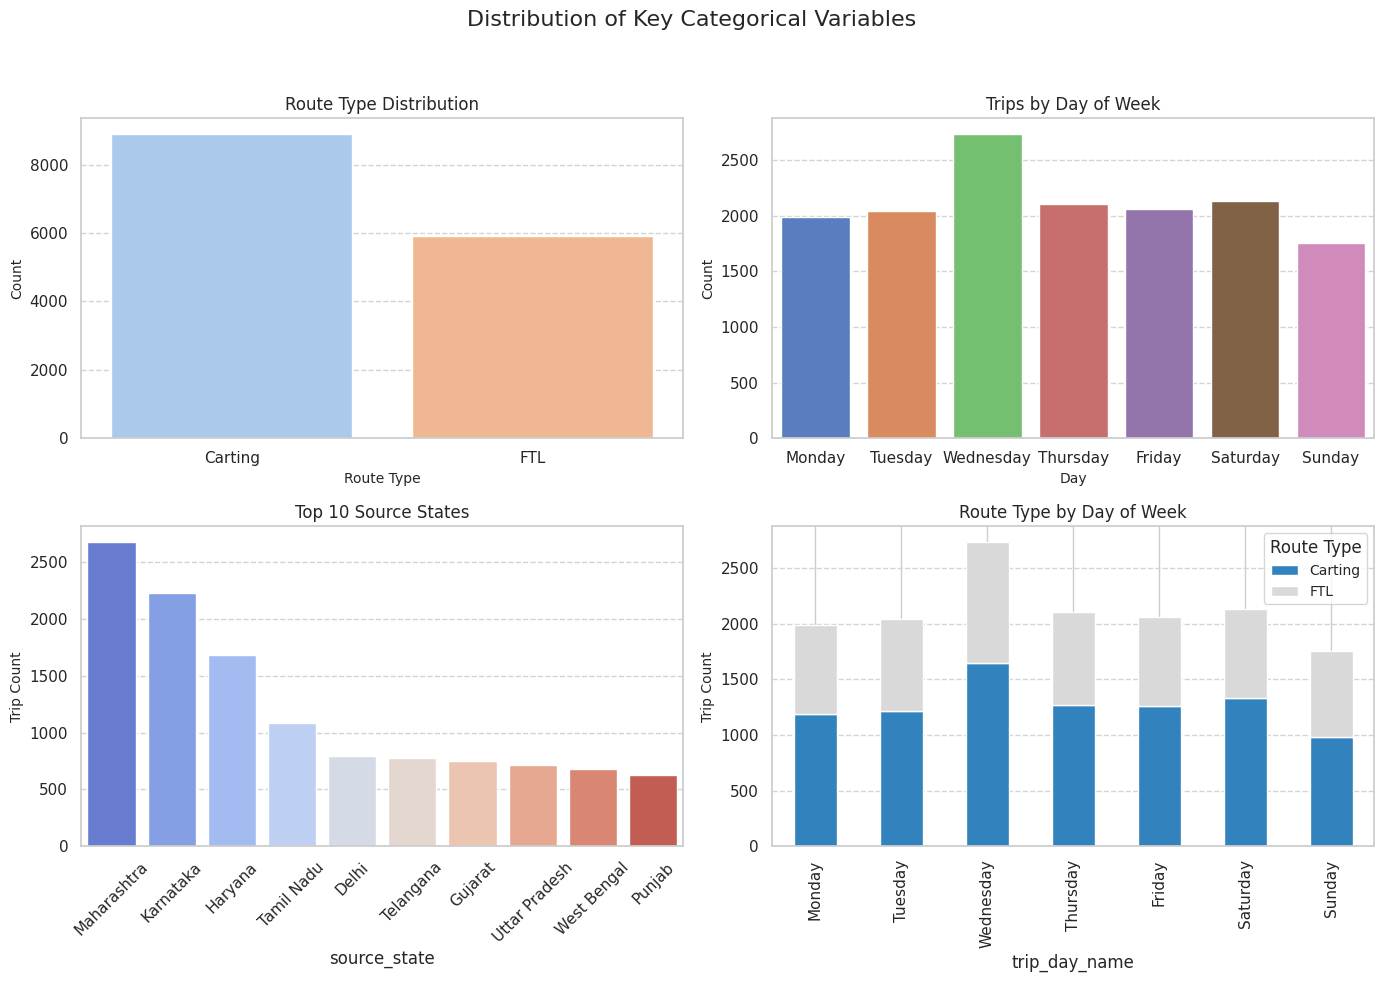

In [98]:
# Set up a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Create a grid for 4 plots
fig.suptitle('Distribution of Key Categorical Variables', fontsize=16)  # Title for the overall figure

# Plot 1 – Route Type
sns.countplot(x='route_type', data=df_final, ax=axes[0, 0], palette="pastel")  # Use pastel palette for color
axes[0, 0].set_title('Route Type Distribution', fontsize=12)
axes[0, 0].set_xlabel('Route Type', fontsize=10)
axes[0, 0].set_ylabel('Count', fontsize=10)
axes[0, 0].grid(axis='y', linestyle='--', color='lightgrey')  # Add gridlines with light grey

# Plot 2 – Trip Day Name
sns.countplot(x='trip_day_name', data=df_final,
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
              ax=axes[0, 1], palette="muted")  # Use muted palette for color
axes[0, 1].set_title('Trips by Day of Week', fontsize=12)
axes[0, 1].set_xlabel('Day', fontsize=10)
axes[0, 1].set_ylabel('Count', fontsize=10)
axes[0, 1].grid(axis='y', linestyle='--', color='lightgrey')  # Add gridlines with light grey

# Plot 3 – Source State (Top 10)
top_src_states = df_final['source_state'].value_counts().nlargest(10)  # Get the top 10 source states
sns.barplot(x=top_src_states.index, y=top_src_states.values, ax=axes[1, 0], palette="coolwarm")  # Coolwarm palette for color
axes[1, 0].set_title('Top 10 Source States', fontsize=12)
axes[1, 0].set_ylabel('Trip Count', fontsize=10)
axes[1, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
axes[1, 0].grid(axis='y', linestyle='--', color='lightgrey')  # Add gridlines with light grey

# Plot 4 – Route Type by Day (stacked)
cross_tab = pd.crosstab(df_final['trip_day_name'], df_final['route_type'])  # Create a cross-tabulation
cross_tab = cross_tab.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Reindex for order
cross_tab.plot(kind='bar', stacked=True, ax=axes[1, 1], colormap="tab20c")  # Use tab20c colormap for stacked bars
axes[1, 1].set_title('Route Type by Day of Week', fontsize=12)
axes[1, 1].set_ylabel('Trip Count', fontsize=10)
axes[1, 1].legend(title='Route Type', fontsize=10)  # Add legend with title
axes[1, 1].grid(axis='y', linestyle='--', color='lightgrey')  # Add gridlines with light grey

# Adjust layout to ensure no overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plots
plt.show()

#### **Step 3: Apply One-Hot Encoding**

In [99]:
# Make a copy to avoid modifying df_final directly
df_encoded = df_final.copy()

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=cat_cols, drop_first=True)

#### **Step 4: Check Encoded Columns**

In [100]:
# Display the new dummy variable columns created
df_encoded.filter(regex='route_type|trip_day_name|state|gap_bin').head()

is_same_state  route_type_FTL  trip_day_name_Monday  \
0              0            True                 False   
1              1           False                 False   
2              0            True                 False   
3              1           False                 False   
4              1            True                 False   

   trip_day_name_Saturday  trip_day_name_Sunday  trip_day_name_Thursday  \
0                   False                 False                   False   
1                   False                 False                   False   
2                   False                 False                   False   
3                   False                 False                   False   
4                   False                 False                   False   

   trip_day_name_Tuesday  trip_day_name_Wednesday  \
0                  False                     True   
1                  False                     True   
2                  False                     True   
3                  False                     True   
4                  False                     True   

   source_state_Arunachal Pradesh  source_state_Assam  source_state_Bihar  \
0                           False               False               False   
1                           False               False               False   
2                           False               False               False   
3                           False               False               False   
4                           False               False               False   

   source_state_Chandigarh  source_state_Chhattisgarh  \
0                    False                      False   
1                    False                      False   
2                    False                      False   
3                    False                      False   
4                    False                      False   

   source_state_Dadra and Nagar Haveli  source_state_Delhi  source_state_Goa  \
0                                False               False             False   
1                                False               False             False   
2                                False               False             False   
3                                False               False             False   
4                                False               False             False   

   source_state_Gujarat  source_state_Haryana  source_state_Himachal Pradesh  \
0                 False                 False                          False   
1                 False                 False                          False   
2                 False                 False                          False   
3                 False                 False                          False   
4                 False                 False                          False   

   source_state_Jammu & Kashmir  source_state_Jharkhand  \
0                         False                   False   
1                         False                   False   
2                         False                   False   
3                         False                   False   
4                         False                   False   

   source_state_Karnataka  source_state_Kerala  source_state_Madhya Pradesh  \
0                   False                False                         True   
1                    True                False                        False   
2                    True                False                        False   
3                   False                False                        False   
4                    True                False                        False   

   source_state_Maharashtra  source_state_Mizoram  source_state_Nagaland  \
0                     False                 False                  False   
1                     False                 False                  False   
2                     False                 False         

#### **Step 5: Final Check**

In [101]:
# Ensure categorical columns are converted to numeric
df_encoded.dtypes[df_encoded.columns.str.contains('route_type_|trip_day_name_|state_|gap_bin_')]

route_type_FTL                  bool
trip_day_name_Monday            bool
trip_day_name_Saturday          bool
trip_day_name_Sunday            bool
trip_day_name_Thursday          bool
                                ... 
gap_bin_(2979.179, 3098.346]    bool
gap_bin_(3098.346, 3217.513]    bool
gap_bin_(3217.513, 3336.68]     bool
gap_bin_(3336.68, 3455.848]     bool
gap_bin_(3455.848, 3575.015]    bool
Length: 97, dtype: object

#### **Insights from Handling Categorical Variables**

- **Route Type Distribution**  
  - The **majority of trips are Carting-based**, making up **over 60% of the data**, while **FTL trips form a smaller proportion**.  
  - This indicates that **shared or consolidated delivery routes are more operationally frequent** than full-load ones.

- **Trip Frequency by Day of Week**  
  - **Wednesday sees the highest volume of trips**, showing a **midweek operational peak** across both route types.  
  - In contrast, **Sunday shows the lowest trip frequency**, likely due to **reduced demand or dispatching limitations**.

- **Top Source States**  
  - **Maharashtra, Karnataka, and Haryana are the top contributors**, with **Maharashtra dispatching the most trips**.  
  - These regions may act as **major distribution hubs**, warranting **further operational focus and investment**.

- **Route Type by Weekday**  
  - **Carting trips consistently exceed FTL trips throughout the week**, peaking midweek, especially on **Wednesday**.  
  - **FTL also peaks midweek**, suggesting **synchronized demand cycles** for both full and partial loads.

- **One-Hot Encoding Output**  
  - Each categorical column (like **route_type, trip_day_name, state, gap_bin**) has been **transformed into binary columns** for **machine learning compatibility**.  
  - This ensures **clean input features** without introducing **ordinal bias**, supporting **robust model performance** later.


The **categorical variables were successfully encoded using One-Hot Encoding**, enabling **clean and model-ready features**.  
**Visual insights revealed key trip patterns by route type, weekdays, and geographic hubs**, enhancing **understanding of operational behavior**.

---

## **8. Column Normalization /Column Standardization**

### **Step 1: Identify Numerical Features to Scale & Detect Infinite and Extremely Large Values**

In [102]:
# Select numerical columns (float or int, excluding categorical flags)
num_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
num_cols = [col for col in num_cols if 'route_type_' not in col and 'trip_day_name_' not in col and 'gap_bin_' not in col and 'state_' not in col]

# Check for infinite values
print("Infinite values found:")
print(np.isinf(df_encoded[num_cols]).sum())

Infinite values found:
actual_distance_to_destination_x      0
is_weekend                            0
is_same_state                         0
is_same_city                          0
start_scan_to_end_scan                0
trip_duration_minutes                 0
creation_to_start_gap                 0
avg_speed_actual                      0
avg_speed_osrm                        0
segment_speed_actual                404
segment_speed_osrm                  774
time_deviation                        0
distance_deviation                    0
speed_deviation_percent               0
segment_delay                         0
osrm_distance                         0
segment_osrm_distance                 0
actual_distance_to_destination_y      0
segment_osrm_time                     0
actual_time                           0
segment_actual_time                   0
osrm_time                             0
efficiency_ratio_distance             0
duration_diff                         0
efficiency_ratio_

### **Step 2: Replace Infinite Values**

In [103]:
# Replace infinities with NaN
df_encoded[num_cols] = df_encoded[num_cols].replace([np.inf, -np.inf], np.nan)

# Fill NaNs with median (more robust than mean)
df_encoded[num_cols] = df_encoded[num_cols].fillna(df_encoded[num_cols].median())

### **Step 3: Apply Scalers**

In [104]:
# Copy the DataFrame to preserve the original
df_scaled_standard = df_encoded.copy()
df_scaled_minmax = df_encoded.copy()

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply scaling
df_scaled_standard[num_cols] = standard_scaler.fit_transform(df_scaled_standard[num_cols])
df_scaled_minmax[num_cols] = minmax_scaler.fit_transform(df_scaled_minmax[num_cols])

# Display the first few rows of the scaled numerical columns
df_scaled_standard[num_cols].head()

actual_distance_to_destination_x  is_weekend  is_same_state  is_same_city  \
0                          1.099474   -0.596136      -1.974792      -0.42601   
1                         -0.349881   -0.596136       0.506383      -0.42601   
2                          0.508942   -0.596136      -1.974792      -0.42601   
3                         -0.380024   -0.596136       0.506383      -0.42601   
4                         -0.282588   -0.596136       0.506383      -0.42601   

   start_scan_to_end_scan  trip_duration_minutes  creation_to_start_gap  \
0                1.016619               1.200798               1.257442   
1               -0.251994              -0.445185              -0.435576   
2                7.098772               5.143790               1.082778   
3               -0.272943              -0.487022              -0.600400   
4               -0.231816              -0.390302              -0.157891   

   avg_speed_actual  avg_speed_osrm  segment_speed_actual  segment_speed_osrm  \
0          0.708316        1.084015              0.996087            1.092715   
1          0.913206        0.581657             -0.143525            0.788334   
2          0.846871        1.026717              0.669914            1.043347   
3         -0.529408        0.913538             -1.035415            0.296330   
4         -0.066050        0.707449             -0.792908            0.614100   

   time_deviation  distance_deviation  speed_deviation_percent  segment_delay  \
0        0.794004           -0.599765                 0.148751       1.341651   
1       -0.241348            0.229075                 0.526361      -0.354340   
2        5.975067          -10.208966                 0.262814       4.364463   
3       -0.258949            0.241895                -0.852461      -0.474960   
4       -0.219851            0.230027                -0.356564       0.190278   

   osrm_distance  segment_osrm_distance  actual_distance_to_destination_y  \
0       0.724391               2.633784                          1.099474   
1      -0.233745              -0.333670                         -0.349881   
2       8.055128               5.573660                          0.508942   
3      -0.255846              -0.488040                         -0.380024   
4      -0.234037              -0.183405                         -0.282588   

   segment_osrm_time  actual_time  segment_actual_time  osrm_time  \
0           2.629468     0.762710             2.146791   0.715882   
1          -0.368643    -0.241670            -0.382742  -0.236408   
2           5.595785     7.107396             5.310954   8.003027   
3          -0.524430    -0.262503            -0.530163  -0.259785   
4          -0.209676    -0.231352            -0.024976  -0.236785   

   efficiency_ratio_distance  duration_diff  efficiency_ratio_time  
0                  -1.184511      -1.012110              -0.227605  
1                  -1.175660       0.248511              -0.285418  
2                  -2.016718      -7.119254              -0.383723  
3                   1.233945       0.269093               0.484613  
4                  -1.223106       0.228920               0.113639

In [105]:
# Display the first few rows of the scaled numerical columns using Min-Max scaling
df_scaled_minmax[num_cols].head()

actual_distance_to_destination_x  is_weekend  is_same_state  is_same_city  \
0                          0.195344         0.0            0.0           0.0   
1                          0.008153         0.0            1.0           0.0   
2                          0.119074         0.0            0.0           0.0   
3                          0.004260         0.0            1.0           0.0   
4                          0.016844         0.0            1.0           0.0   

   start_scan_to_end_scan  trip_duration_minutes  creation_to_start_gap  \
0                0.109969               0.123941               0.146524   
1                0.002218               0.012612               0.012999   
2                0.626566               0.390632               0.132748   
3                0.000439               0.009782               0.000000   
4                0.003932               0.016324               0.034900   

   avg_speed_actual  avg_speed_osrm  segment_speed_actual  segment_speed_osrm  \
0          0.318785        0.761388              0.193060            0.602156   
1          0.337106        0.684382              0.151410            0.565009   
2          0.331174        0.752605              0.181139            0.596131   
3          0.208114        0.735256              0.118814            0.504965   
4          0.249545        0.703664              0.127677            0.543746   

   time_deviation  distance_deviation  speed_deviation_percent  segment_delay  \
0        0.069221            0.920743                 0.301953       0.176929   
1        0.003383            0.998652                 0.340709       0.067469   
2        0.398684            0.017496                 0.313660       0.372022   
3        0.002264            0.999857                 0.199194       0.059684   
4        0.004750            0.998741                 0.250090       0.102619   

   osrm_distance  segment_osrm_distance  actual_distance_to_destination_y  \
0       0.103203               0.373134                          0.195344   
1       0.002542               0.021373                          0.008153   
2       0.873362               0.721625                          0.119074   
3       0.000220               0.003074                          0.004260   
4       0.002512               0.039185                          0.016844   

   segment_osrm_time  actual_time  segment_actual_time  osrm_time  \
0           0.391712     0.093341             0.247388   0.101122   
1           0.023065     0.002323             0.021218   0.002651   
2           0.756450     0.668306             0.530301   0.854640   
3           0.003909     0.000435             0.008037   0.000234   
4           0.042611     0.003258             0.053207   0.002612   

   efficiency_ratio_distance  duration_diff  efficiency_ratio_time  
0                   0.258276       0.891337               0.020314  
1                   0.260473       0.998002               0.018673  
2                   0.051703       0.374589               0.015883  
3                   0.858594       0.999744               0.040528  
4                   0.248696       0.996345               0.029999

### **Step 4: Visualize the Effect of Scaling**

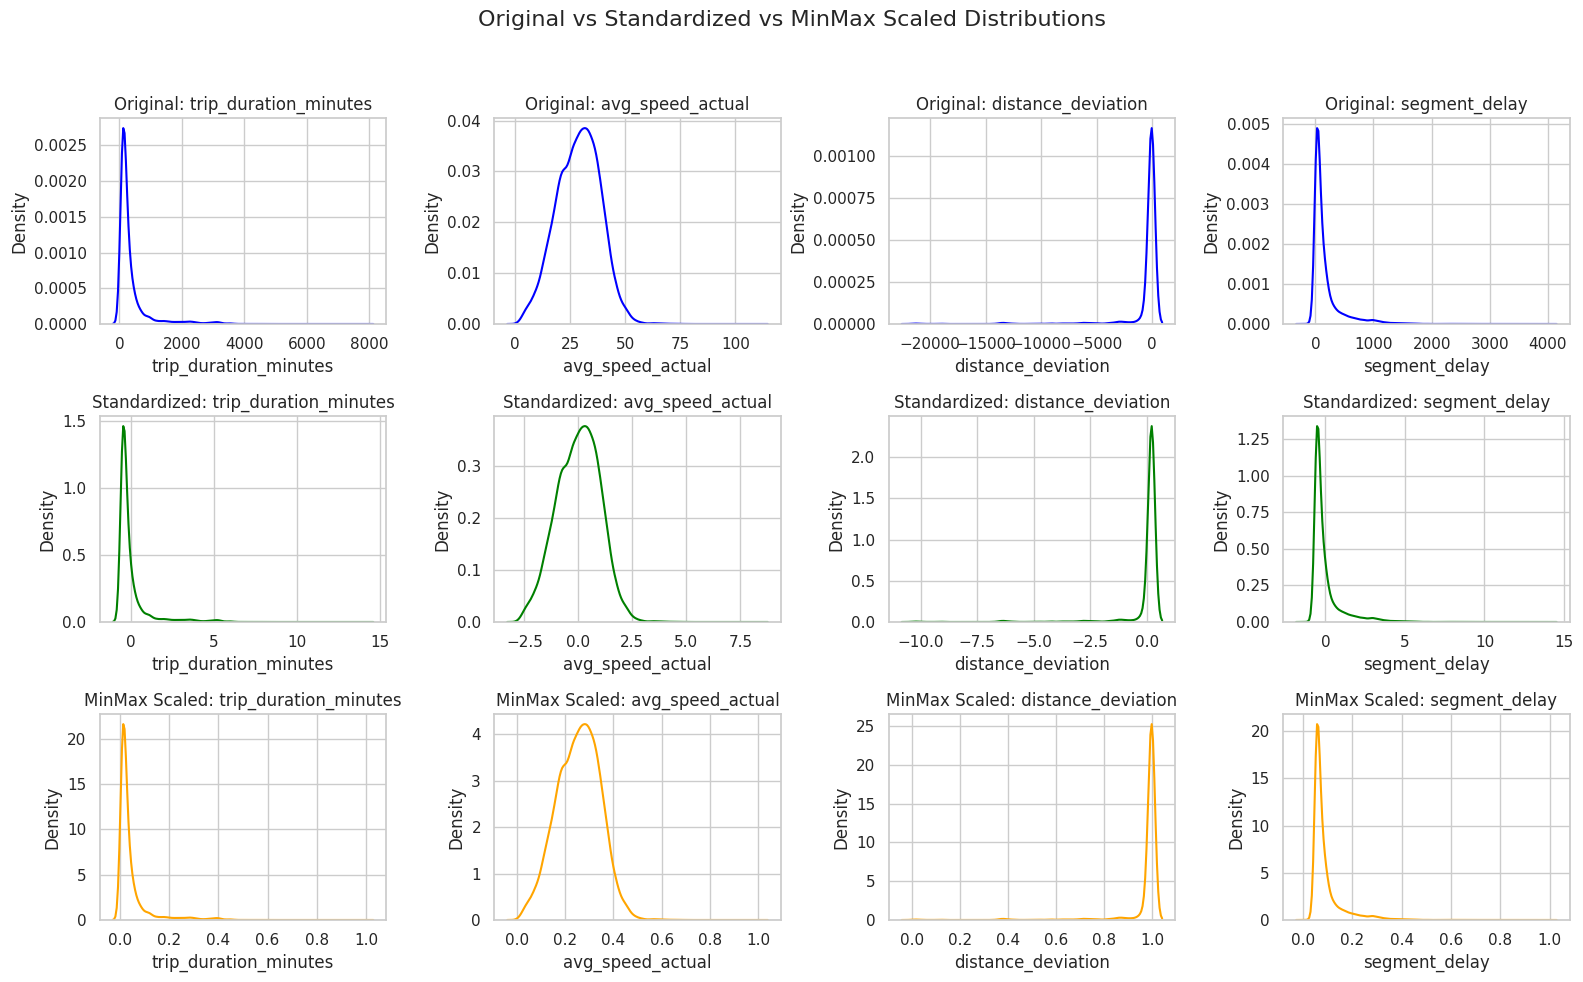

In [106]:
# Pick a few sample numerical columns to visualize
sample_cols = ['trip_duration_minutes', 'avg_speed_actual', 'distance_deviation', 'segment_delay']

# Set up subplots
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
fig.suptitle('Original vs Standardized vs MinMax Scaled Distributions', fontsize=16)

for i, col in enumerate(sample_cols):
    # Original
    sns.kdeplot(df_encoded[col], ax=axes[0, i], color='blue')
    axes[0, i].set_title(f'Original: {col}')

    # Standardized
    sns.kdeplot(df_scaled_standard[col], ax=axes[1, i], color='green')
    axes[1, i].set_title(f'Standardized: {col}')

    # MinMax Scaled
    sns.kdeplot(df_scaled_minmax[col], ax=axes[2, i], color='orange')
    axes[2, i].set_title(f'MinMax Scaled: {col}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### **Insights Distribution Patterns from Scaling**

- **Trip Duration Normalization**  
  - The **original distribution of trip_duration_minutes is highly right-skewed** with many long-duration trips.  
  - After scaling, both **standardization and MinMax normalization compress the range**, making it **suitable for distance-based models**.

- **Speed Features Become More Balanced**  
  - **avg_speed_actual showed a relatively normal distribution already**, which gets **centered at 0 after standardization**.  
  - **MinMax scaling confines it within [0, 1] range**, preserving shape but making it ready for **neural networks or gradient-based methods**.

- **Distance Deviation Shows Extreme Negative Skew**  
  - Original **distance_deviation has a long tail on the left**, indicating many trips **fell short of OSRM expectations**.  
  - Both scalers **compress the skew but do not remove it** — suggesting **domain outlier treatment may be needed**.

- **Segment Delay is Sparse but Improved by Scaling**  
  - The **original values of segment_delay are concentrated near zero** with **rare high values**.  
  - After scaling, both approaches **enhance model interpretability** while keeping **delays visible in transformed space**.

- **Standardization Centers Distributions, MinMax Retains Proportion**  
  - **StandardScaler transforms features to have zero mean and unit variance**, useful for **algorithms like SVMs, PCA, and linear models**.  
  - **MinMaxScaler preserves relative distance between data points** — better for **neural nets and clustering** where **scale matters**.

**Overall 2-Line Conclusion**  
**Standardization helps center data** for algorithms sensitive to scale, while **MinMax scaling preserves relative relationships**.  
Both methods **successfully prepare the data for modeling** by **normalizing skew and bounding extreme values**.

---

## **9. Business Insights**

**1. High Delay Source Cities Need Operational Focus**  
- **Observation:** Gurgaon, Bhiwandi, and Bangalore are top contributors to total segment delay.  
- **Inference:** These cities likely serve as major dispatch hubs with either high trip volume or inefficient routing. They need targeted congestion management or warehouse process streamlining.

**2. Busiest Corridors Have High Time Gaps Pre-Dispatch**  
- **Observation:** Corridors like Assam → Maharashtra and Andhra Pradesh → West Bengal show the highest average creation-to-start delays (~1976 minutes).  
- **Inference:** Cross-zonal planning delays, possibly due to fleet allocation or regional coordination gaps, contribute to inefficient trip scheduling.

**3. Real-World Distance Efficiency is Well Below 100%**  
- **Observation:** Median efficiency ratio (Actual Distance / OSRM Distance) is ~0.63.  
- **Inference:** This shows routes are being optimized on-ground, taking shortcuts or alternate paths not captured by OSRM — good for cost but needs validation for routing accuracy.

**4. Actual Trip Durations Are Twice the OSRM Estimates**  
- **Observation:** Median time efficiency ratio (Actual / OSRM) is ~2.0.  
- **Inference:** Trips take double the expected time, showing OSRM underestimates real-time delays. You should update SLAs or route planning assumptions.

**5. FTL Routes Contribute Over 95% to Time Deviations**  
- **Observation:** Pie chart shows FTL accounts for 95.8% of all average time deviation.  
- **Inference:** Large-volume full truckload routes require better scheduling, route adherence, and possible re-routing strategies to minimize delays.

**6. Start-to-End Scan Duration Has Strong Predictive Power**  
- **Observation:** Correlation between scan duration and trip duration is 0.91.  
- **Inference:** Scan timestamps are excellent predictors of trip duration and can be used for real-time trip tracking models or delay alerts.

**7. Nearly All Trips Are Slower Than OSRM Predicted Speed**  
- **Observation:** 99.8% of trips show negative speed deviation.  
- **Inference:** Indicates OSRM speed profiles are overly optimistic, and SLAs must be redefined based on historical performance.

**8. Top Destination States by Efficient Routing**  
- **Observation:** Daman & Diu and Chandigarh have efficiency ratios above 0.8.  
- **Inference:** These routes are well-optimized and could serve as benchmarks for improving lower-performing lanes.

**9. Aggregated Times Show Hidden Gaps in Segment Data**  
- **Observation:** Paired t-tests show significant differences between actual_time vs. segment_actual_time.  
- **Inference:** This points to unrecorded delays between segments — such as stops, waiting time, or handoffs — and highlights the need to track inter-segment time.

**10. OSRM Distance Aggregation Shows Systematic Overcounts**  
- **Observation:** Trip-level osrm_distance is significantly higher than total segment distance (mean diff ~2561 km).  
- **Inference:** The aggregation logic might be counting overlapping paths or reroutes, which should be optimized for accurate mileage-based costing.


## **10. Recommendations**

**1. Reduce delays at high-delay source hubs to boost delivery efficiency**  
  - **Focus** first on **Gurgaon, Bhiwandi, and Bangalore**, which collectively account for major segment delays.  
  - Deploy **faster vehicle assignment**, **quicker dock loading**, and **tighter SOP enforcement** in these cities.

**2. Expedite dispatch in state pairs with high creation-to-start gaps**  
  - Routes like **Assam → Maharashtra** and **Andhra Pradesh → West Bengal** face planning delays of over **32 hours**.  
  - Introduce **automated dispatch triggers** or **pre-approved routing** to reduce wait time.

**3. Leverage actual driver routes to refine routing and mapping models**  
  - Most trips cover **less distance than planned**, highlighting **OSRM overestimation**.  
  - Use **real delivery traces** to improve route suggestions and reduce excess buffer planning.

**4. Align promised delivery timelines with actual trip durations**  
  - Over **99% of trips run slower than expected**, showing need for **SLA rebalancing**.  
  - Adjust **ETA dashboards** and **customer notifications** using real-world speed patterns.

**5. Focus delay-reduction efforts on FTL routes for maximum impact**  
  - **FTL contributes nearly 96%** of total average time deviation across all trips.  
  - Prioritize **FTL route audits**, **optimization**, and **faster turnaround efforts**.

**6. Use scan duration as a live signal for potential trip delays**  
  - Strong **correlation (0.91)** exists between scan time and trip duration, proving it’s a reliable early metric.  
  - Trigger **auto-alerts** for trips with **unusual scan gaps** to prevent end-of-trip delays.

**7. Regularly recalibrate OSRM estimates using field performance**  
  - OSRM **time and distance predictions** often **deviate from actual execution**.  
  - Review **aggregated differences monthly** to adjust planning models and improve routing logic.

**8. Introduce simple rules to auto-flag inefficient or slow-moving trips**  
  - For example, **flag trips** that take over **2× OSRM time** as outliers for inspection.  
  - Create **real-time dashboards** that track such cases across corridors.

**9. Investigate large mismatches between trip and segment-level timings**  
  - **Total trip duration** often exceeds the sum of segments due to **hidden idle periods**.  
  - Audit routes with major gaps to uncover **stop delays** or **scanning lags**.

**10. Identify and replicate practices from high-efficiency destinations**  
  - States like **Daman & Diu** and **Chandigarh** show **efficiency ratios above 0.80**.  
  - Learn what works in these regions and **apply similar strategies** across lower-performing areas.


---

### *Created by* ***Rishabh Dev Sahu*** ✨